## VI. Importing Library

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from scipy.cluster import hierarchy
from sklearn.cluster import AgglomerativeClustering
from matplotlib import pyplot
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.datasets import make_classification
from scipy import stats
from matplotlib import pyplot as plt


# Opening File 

I. Open the loan.csv file and cherrypick certain variables

In [2]:
df = pd.read_csv("df_integrated.csv", low_memory = False)
df = df.drop(columns = ['Unnamed: 0'])

In [3]:
df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'Diff', 'pqissue_q', 'prevQuarterDiff', 'Month', 'Year', 'UR',
       'YearMonth', 'YearQuarter', 'URDiff', 'URprevMonthDiff'],
      dtype='object', length=163)

In [4]:
df.shape

(2260668, 163)

# Data Description

In [5]:
# Examine the first 3 rows of the data
df.head(3)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,Diff,pqissue_q,prevQuarterDiff,Month,Year,UR,YearMonth,YearQuarter,URDiff,URprevMonthDiff
0,NaN,NaN,2500,2500,2500.0,36 months,13.56,84.92,C,C1,...,-0.006573,2018Q3,0.004246,12,2018,4.0,2018-12,2018Q4,0.000000,0.025641
1,NaN,NaN,30000,30000,30000.0,60 months,18.94,777.23,D,D2,...,0.002888,2018Q3,0.004128,12,2018,4.7,2018-12,2018Q4,-0.020833,0.000000
2,NaN,NaN,5000,5000,5000.0,36 months,17.97,180.69,D,D1,...,-0.002725,2018Q3,0.004887,12,2018,4.1,2018-12,2018Q4,0.025000,0.000000


In [6]:
# Examine the data types of each row in the data frame
df.dtypes

id                 float64
member_id          float64
loan_amnt            int64
funded_amnt          int64
funded_amnt_inv    float64
                    ...   
UR                 float64
YearMonth           object
YearQuarter         object
URDiff             float64
URprevMonthDiff    float64
Length: 163, dtype: object

In [7]:
# Checking the dimensionality of the data
df.shape

(2260668, 163)

In [8]:
# Describe the data
df.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,emp_length,annual_inc,url,...,log_annual_inc,log_revol_bal,ageOfCredit,Diff,prevQuarterDiff,Month,Year,UR,URDiff,URprevMonthDiff
count,0.0,0.0,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.113761e+06,2.260664e+06,0.0,...,2.260664e+06,2.260668e+06,2.260639e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06
mean,NaN,NaN,1.504693e+04,1.504166e+04,1.502344e+04,1.309291e+01,4.458076e+02,5.931359e+00,7.799243e+04,NaN,...,4.816103e+00,3.993993e+00,1.639495e+01,5.804401e-03,5.963072e-03,6.752532e+00,2.015858e+03,5.118703e+00,-8.777189e-03,-9.101832e-03
std,NaN,NaN,9.190245e+03,9.188413e+03,9.192332e+03,4.832114e+00,2.671737e+02,3.720212e+00,1.126962e+05,NaN,...,2.756264e-01,5.510375e-01,7.679878e+00,7.457629e-03,7.574717e-03,3.409529e+00,1.792634e+00,1.441931e+00,1.367873e-02,1.345716e-02
min,NaN,NaN,5.000000e+02,5.000000e+02,0.000000e+00,5.310000e+00,4.930000e+00,0.000000e+00,0.000000e+00,NaN,...,0.000000e+00,0.000000e+00,5.037749e-01,-6.971984e-02,-6.971984e-02,1.000000e+00,2.007000e+03,2.200000e+00,-5.769231e-02,-5.769231e-02
25%,NaN,NaN,8.000000e+03,8.000000e+03,8.000000e+03,9.490000e+00,2.516500e+02,2.000000e+00,4.600000e+04,NaN,...,4.662767e+00,3.774590e+00,1.125280e+01,1.478082e-03,1.602764e-03,4.000000e+00,2.015000e+03,4.200000e+00,-2.000000e-02,-2.000000e-02
50%,NaN,NaN,1.290000e+04,1.287500e+04,1.280000e+04,1.262000e+01,3.779900e+02,6.000000e+00,6.500000e+04,NaN,...,4.812920e+00,4.054038e+00,1.483398e+01,5.814197e-03,5.952554e-03,7.000000e+00,2.016000e+03,4.800000e+00,0.000000e+00,-8.403361e-03
75%,NaN,NaN,2.000000e+04,2.000000e+04,2.000000e+04,1.599000e+01,5.933200e+02,1.000000e+01,9.300000e+04,NaN,...,4.968488e+00,4.306361e+00,2.025230e+01,1.038282e-02,1.050397e-02,1.000000e+01,2.017000e+03,5.700000e+00,0.000000e+00,0.000000e+00
max,NaN,NaN,4.000000e+04,4.000000e+04,4.000000e+04,3.099000e+01,1.719830e+03,1.000000e+01,1.100000e+08,NaN,...,8.041393e+00,6.463122e+00,8.325428e+01,9.254971e-02,9.254971e-02,1.200000e+01,2.018000e+03,1.460000e+01,5.666667e-01,1.515152e-01


In [9]:
# Find the amount of isnull
na = df.isnull().sum()
print(na)

id                 2260668
member_id          2260668
loan_amnt                0
funded_amnt              0
funded_amnt_inv          0
                    ...   
UR                       0
YearMonth                0
YearQuarter              0
URDiff                   0
URprevMonthDiff          0
Length: 163, dtype: int64


# Exploratory Data Analysis and Data Pre-processing

## I. Logic and Literature Review

Serrano-Cinca, Gutiérrez-Nieto, and, & López-Palacios researches that features that are relevant in predicting good loans are interest rates, annual income, credit history length, amount of delinquency in 2 years, amount of inquiries in last 6 months, public records, revolving utilization, open accounts, loan amount to annual income, annual installment to income, and overall debt to income $^{3}$. Furthermore, the same study also indicates that loans made for 'wedding purpose' tend to be the least risky and loans made for 'small business' tend to be more risky. 

Studies conducted by Chang, Kim, and Kondo mentioned that biases can be minimized by incorporating more macroeconomic factors into the models.

While most of our studies are interested in the model selection, we will be analyzing closely factors and variables that are relevant to the model.

References 
1. Hajek, P., & Michalak, K. (2013). Feature selection in corporate credit rating prediction. Knowledge-Based Systems, 51, 72-84. doi:10.1016/j.knosys.2013.07.008. Retrieved July 2, 2020. 


2. Malekipirbazari, M., & Aksakalli, V. (2015). Risk assessment in social lending via random forests. Expert Systems with Applications, 42(10), 4621-4631. doi:10.1016/j.eswa.2015.02.001. Retrieved July 2, 2020. 


3. Serrano-Cinca, C., Gutiérrez-Nieto, B., & López-Palacios, L. (2015). Determinants of Default in P2P Lending. PLoS ONE, 10(10), 1–22. https://doi-org.proxy.seattleu.edu/10.1371/journal.pone.0139427


4. Costello, F. J., & Kun Chang Lee. (2019). Exploring the Performance of Synthetic Minority Over-sampling Technique (SMOTE) to Predict Good Borrowers in P2P Lending. Journal of Digital Convergence, 17(9), 71–78. https://doi-org.proxy.seattleu.edu/10.14400/JDC.2019.17.9.071


5. P. Li and G. Han, LendingClub Loan Default and Profitability Prediction, [online] Available: http://cs229.stanford.edu/proj2018/report/69.pdf. 


6. Lifeng Zhou, Hong Wang, Loan Default Prediction on Large Imbalanced Data Using Random Frest, TELKOMNKA Indonesian Journal of Electrical Engineering Vol. 10, No.6, October 2012, pp.1519-1525. https://www.researchgate.net/publication/267864165_Loan_Default_Prediction_on_Large_Imbalanced_Data_Using_Random_Forests


7. Chang, Shunpo, et al. “Predicting Default Risk of Lending Club Loans.” Google Scholar , 2016, 140.116.51.3/chinese/faculty/shulc/courses/dmbd/projects/lending%20club.pdf.


8. Tsai, Kevin, et al. “Peer Lending Risk Predictor.” Researchgate, 2014, www.researchgate.net/profile/Sudhanshu_Singh8/publication/269699712_Peer_Lending_Risk_Predictor/links/549321420cf286fe3125b7d3/Peer-Lending-Risk-Predictor.pdf.



## II. Univariate Data Exploration: Seaborn

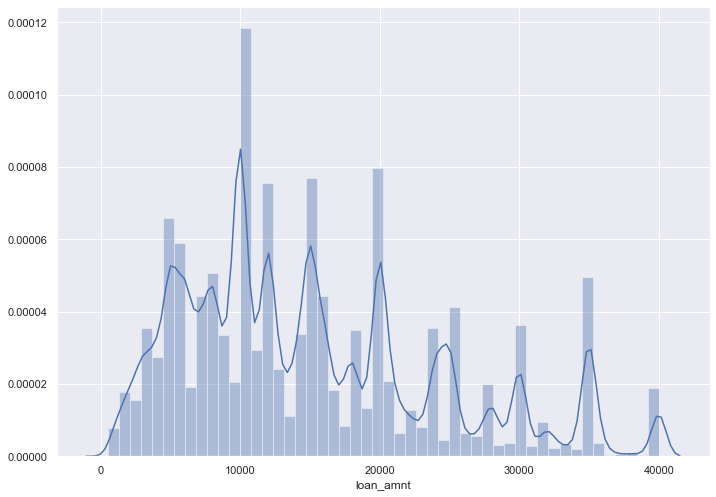

In [10]:
# Check the distribution of loan amount
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(df['loan_amnt'])

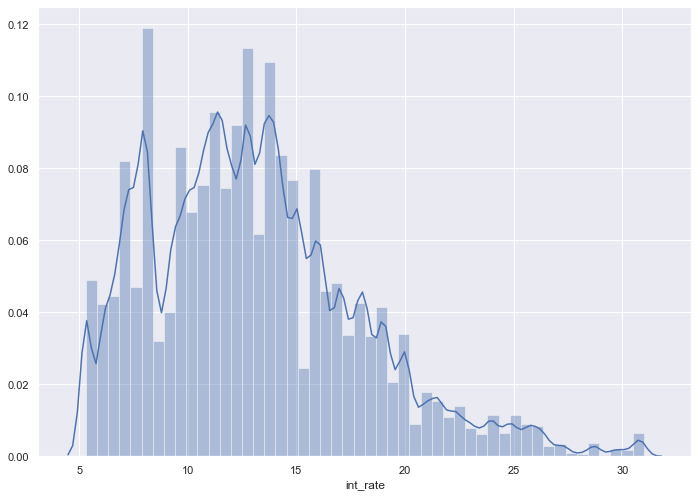

In [11]:
# Check the distribution of interest rate
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(df['int_rate'])

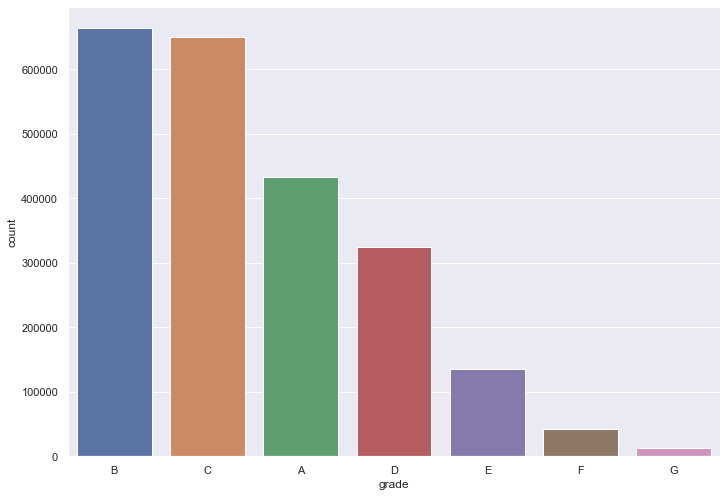

In [12]:
# Check the distribution of grade
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.countplot(x = df['grade'],
             order = df['grade'].value_counts().index)

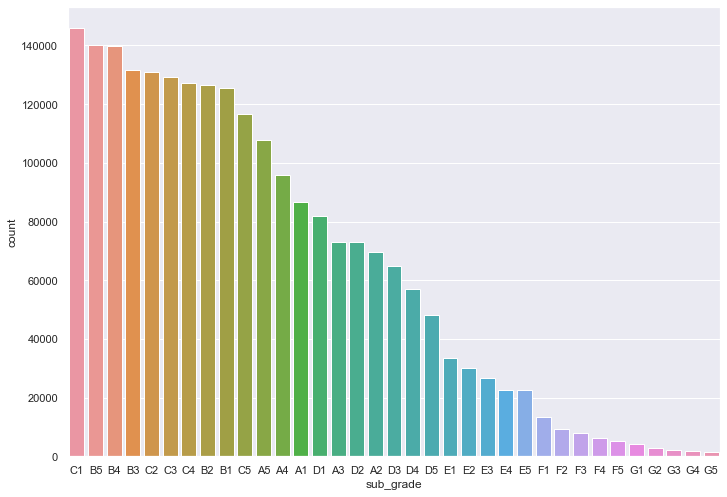

In [13]:
# Check the distribution of sub-grade
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.countplot(x = df['sub_grade'],
             order = df['sub_grade'].value_counts().index)

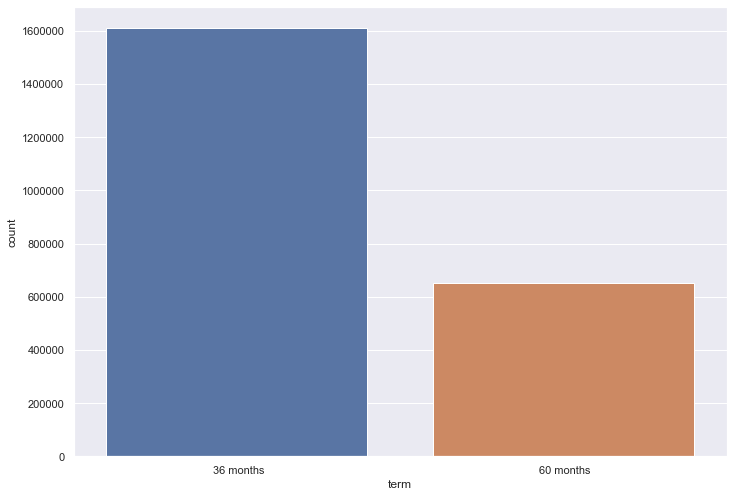

In [14]:
# Check the distribution of term
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.countplot(x = df['term'],
             order = df['term'].value_counts().index)

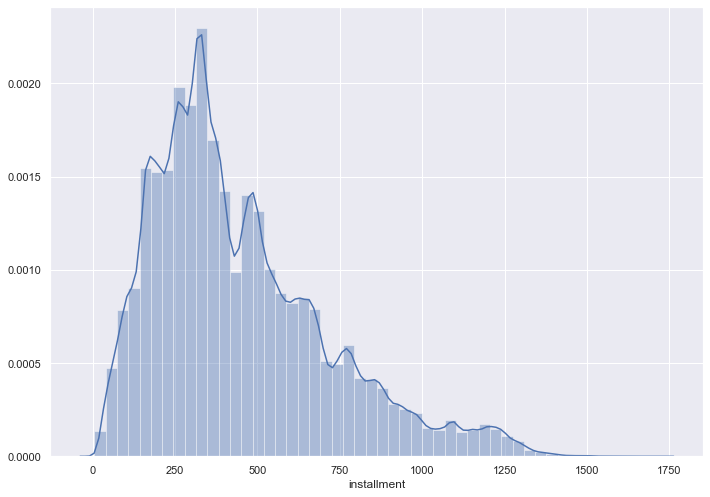

In [15]:
# Check the distribution of monthly payment
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(df['installment'])

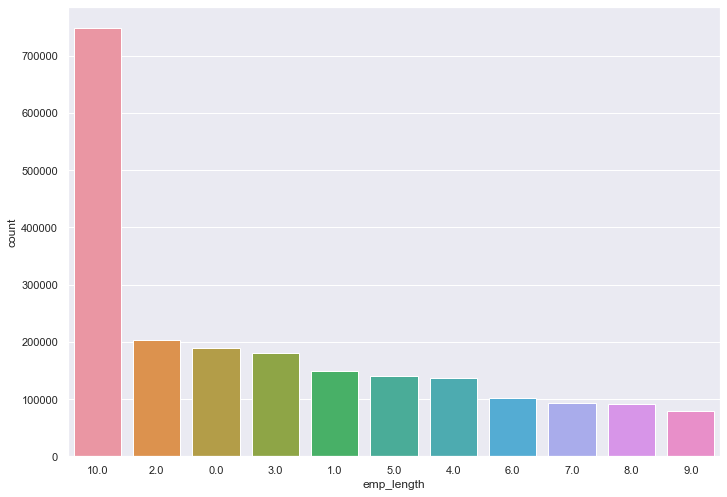

In [16]:
# Check the distribution of emp_length
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.countplot(x = df['emp_length'],
             order = df['emp_length'].value_counts().index)

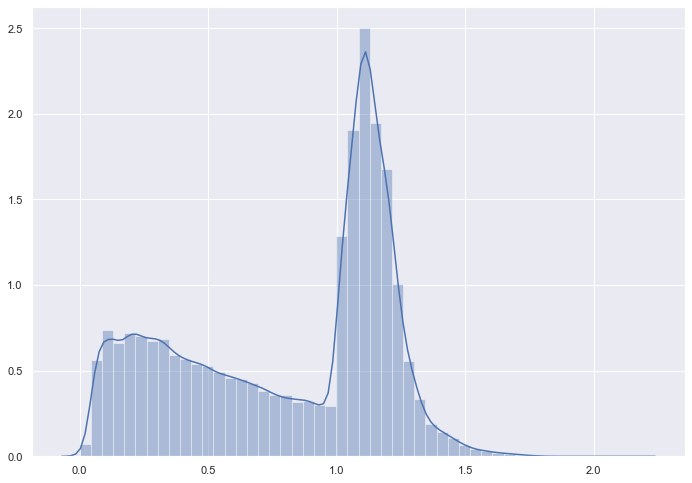

In [17]:
# Check the distribution of funded_amnt to loan_amnt
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(df['total_pymnt']/df['funded_amnt'])

C:\Users\klee1\anaconda3\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
C:\Users\klee1\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\klee1\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: ht

,int_rate,loan_amnt,term,Numerator,Denominator,TotalLoanCost,Payment
0,13.56,2500,36,1017.000,0.332702,3056.788375,167.020000
1,18.94,30000,60,28410.000,0.609218,46633.586381,1507.110000
2,17.97,5000,36,2695.500,0.414391,6504.722612,353.890000
3,18.94,4000,36,2272.800,0.430936,5274.099547,286.710000
4,16.14,30000,60,24210.000,0.551399,43906.511281,1423.210000
...,...,...,...,...,...,...,...
2260663,14.08,12000,60,8448.000,0.503366,16783.017573,5360.960000
2260664,25.82,12000,60,15492.000,0.721213,21480.479427,14499.802172
2260665,11.99,10000,36,3597.000,0.300867,11955.432175,5306.940000
2260666,21.45,12000,60,12870.000,0.654591,19661.119552,5207.290000


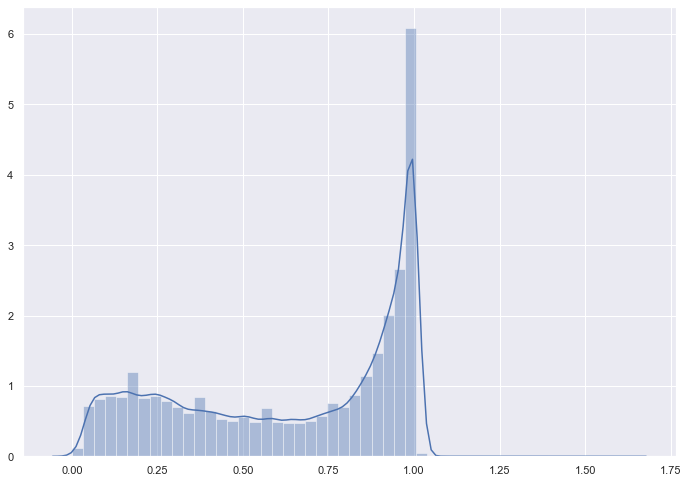

In [18]:
TotalLoanCost = df[['int_rate', 'loan_amnt', 'term']]
TotalLoanCost.loc[TotalLoanCost['term'] == ' 36 months', 'term'] = 36
TotalLoanCost.loc[TotalLoanCost['term'] == ' 60 months', 'term'] = 60

TotalLoanCost['term'] = TotalLoanCost['term'].astype(int)

TotalLoanCost['Numerator'] = (TotalLoanCost['int_rate']/12/100)*TotalLoanCost['loan_amnt']*TotalLoanCost['term']
TotalLoanCost['Denominator'] = (1-((1+((TotalLoanCost['int_rate']/12)/100))**(-TotalLoanCost['term'])))
TotalLoanCost['TotalLoanCost'] = TotalLoanCost['Numerator']/TotalLoanCost['Denominator']

TotalLoanCost['Payment'] = df['total_pymnt']

# Check the distribution of total_pymnt to TotalLoanCost
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(TotalLoanCost['Payment']/TotalLoanCost['TotalLoanCost'], norm_hist = False, kde = True)

TotalLoanCost

[Text(0, 0, 'Fully Paid'),
 Text(0, 0, 'Current'),
 Text(0, 0, 'Charged Off'),
 Text(0, 0, 'Late (31-120 days)'),
 Text(0, 0, 'In Grace Period'),
 Text(0, 0, 'Late (16-30 days)'),
 Text(0, 0, 'Does not meet the credit policy. Status:Fully Paid'),
 Text(0, 0, 'Does not meet the credit policy. Status:Charged Off'),
 Text(0, 0, 'Default')]

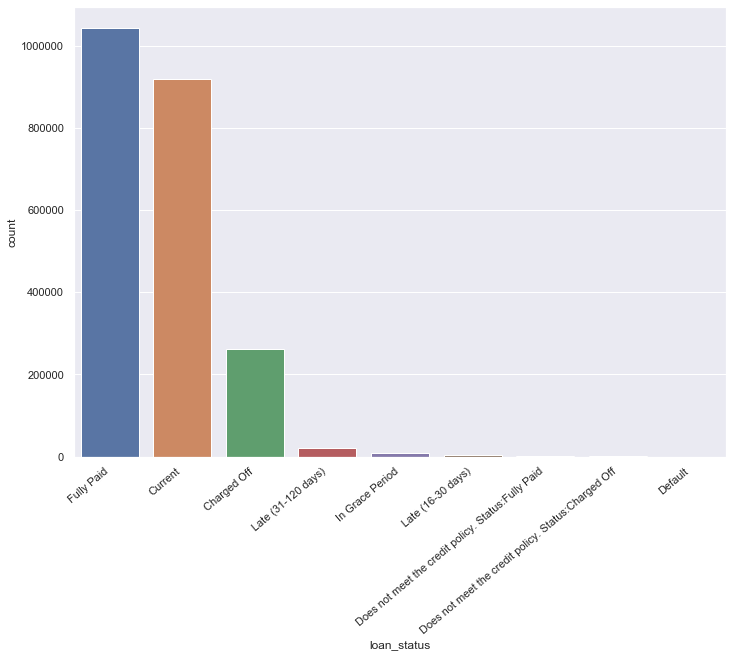

In [19]:
# Check the distribution of loan_status
sns.set(rc={'figure.figsize':(11.7,8.27)})
loan_stat_sns = sns.countplot(x = df['loan_status'],
             order = df['loan_status'].value_counts().index)

loan_stat_sns.set_xticklabels(loan_stat_sns.get_xticklabels(), rotation = 40, ha = 'right')

# Fully paid = fully paid amount
# Current = loan is still ongoing
# Charged off = a debt that is deemed unlikely to be collected by the creditor because the borrower has become substantially delinquent after a period of time - it's not write-off, it's just warning
# Late = late based on how many days
# In Grace Period = late but is forgiven
# Does not meet the credit policy but is still extended
# Default - loan's not getting back

[Text(0, 0, 'debt_consolidation'),
 Text(0, 0, 'credit_card'),
 Text(0, 0, 'house'),
 Text(0, 0, 'car'),
 Text(0, 0, 'other'),
 Text(0, 0, 'vacation'),
 Text(0, 0, 'home_improvement'),
 Text(0, 0, 'small_business'),
 Text(0, 0, 'major_purchase'),
 Text(0, 0, 'medical'),
 Text(0, 0, 'renewable_energy'),
 Text(0, 0, 'moving'),
 Text(0, 0, 'wedding'),
 Text(0, 0, 'educational')]

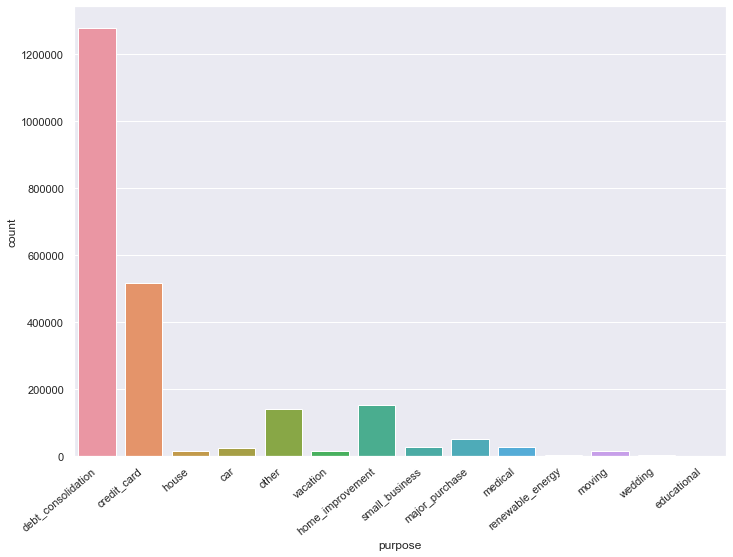

In [20]:
# Check the distribution of purpose
sns.set(rc={'figure.figsize':(11.7,8.27)})
desc_sns = sns.countplot(x = df['purpose'])

desc_sns.set_xticklabels(desc_sns.get_xticklabels(), rotation = 40, ha = 'right')

[Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, '')]

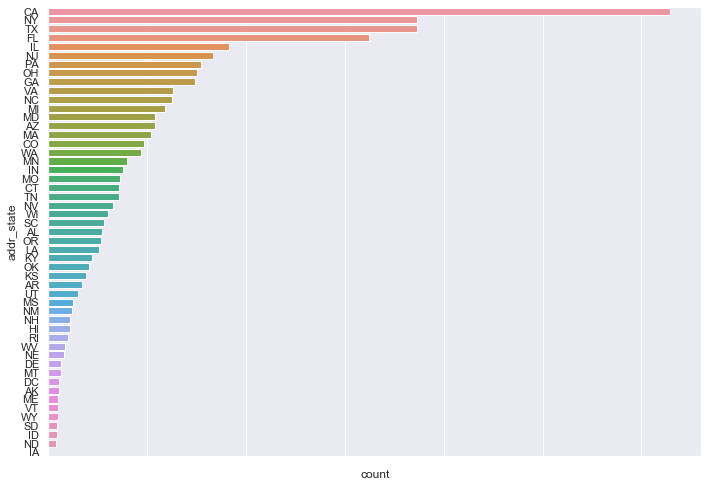

In [21]:
# Check the distribution of the addr_state
sns.set(rc={'figure.figsize':(11.7,8.27)})
addr_sns = sns.countplot(y = df['addr_state'],
                        order = df['addr_state'].value_counts().index)

addr_sns.set_xticklabels(addr_sns.get_xticklabels(), rotation = 90, ha = 'right')

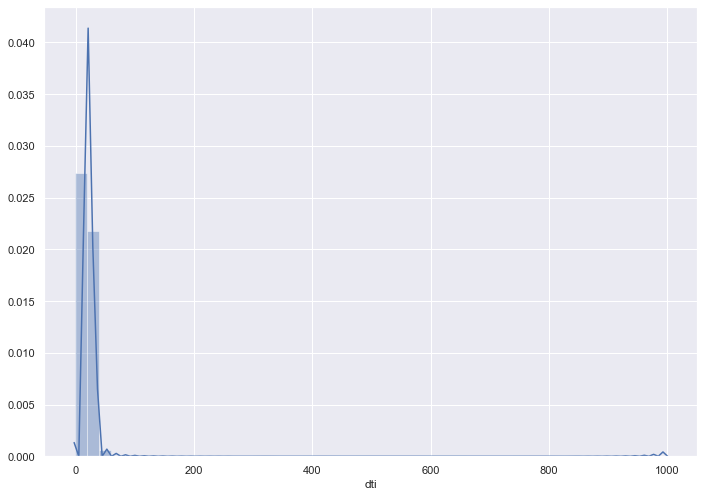

In [22]:
# Check the distribution of the debt-to-income ratio
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(df['dti'], norm_hist = False, kde = True)

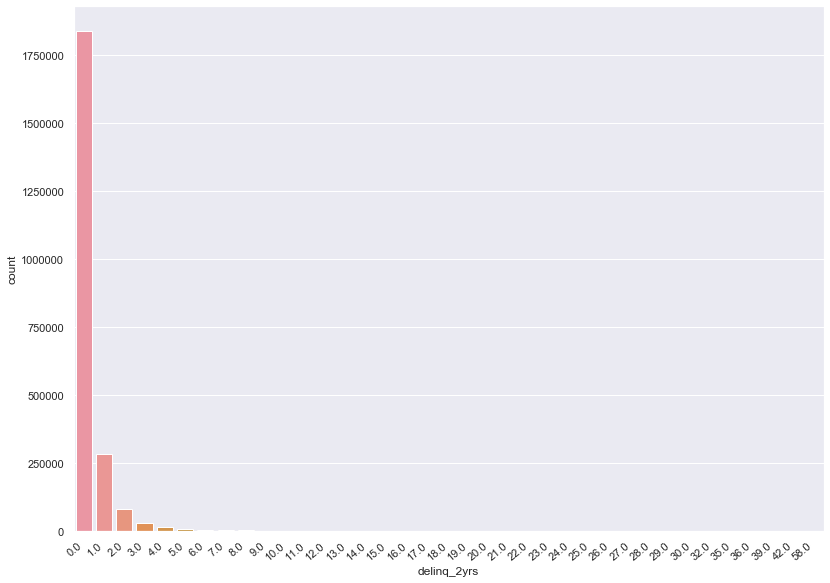

In [23]:
# Check the distribution of delinquency in 2 years
sns.set(rc={'figure.figsize':(11.7,8.27)})
delinq_sns = sns.countplot(df['delinq_2yrs'])

delinq_sns.set_xticklabels(delinq_sns.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

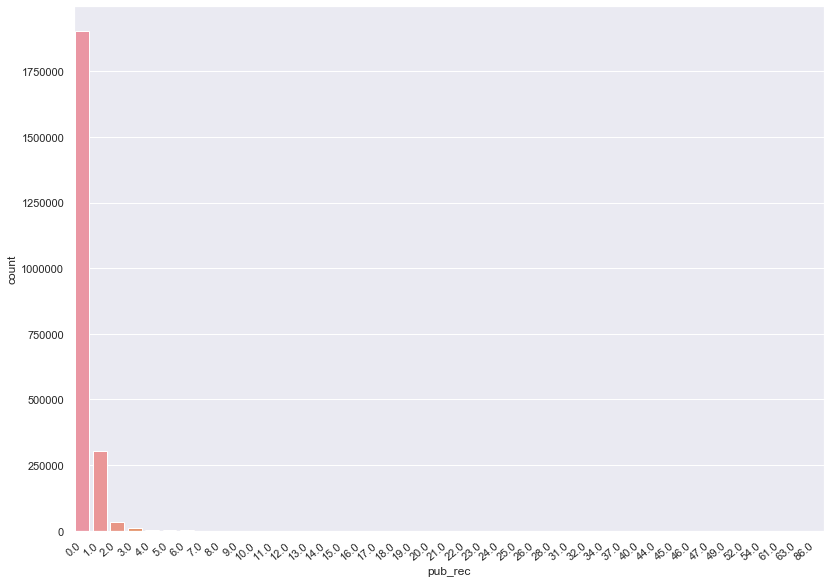

In [25]:
# Distributions of pub_rec
pubrec_sns = sns.countplot(df.pub_rec)

pubrec_sns.set_xticklabels(pubrec_sns.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

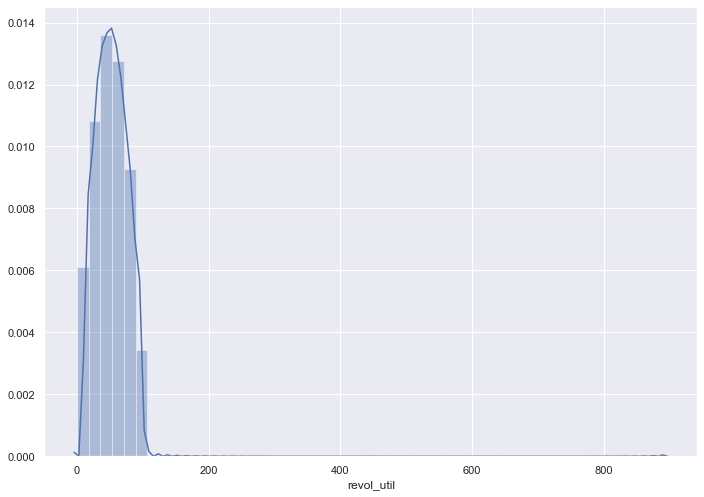

In [26]:
# Distributions of utilitization of revolving credit
sns.distplot(df['revol_util'], norm_hist = False, kde = True)

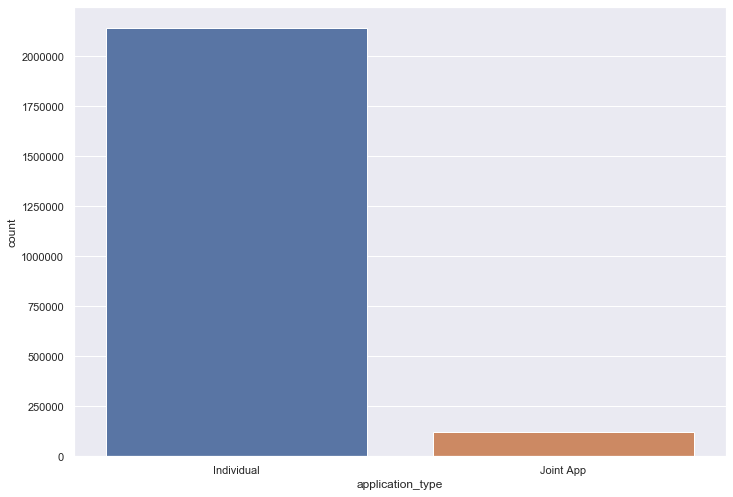

In [27]:
# Distributions of application_type
sns.countplot(df['application_type'])

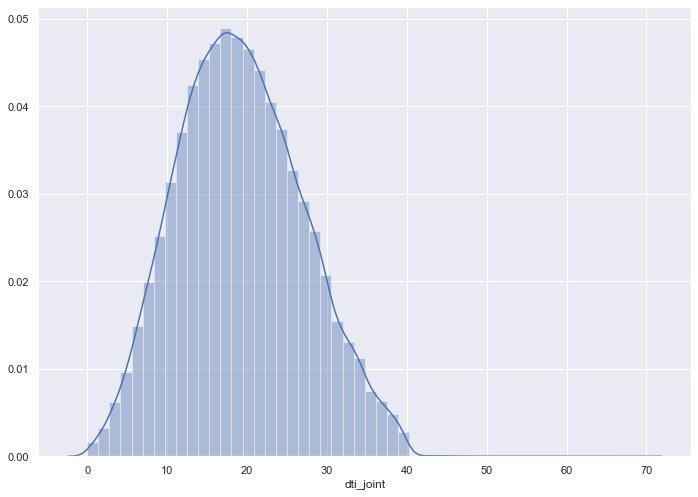

In [28]:
# Distributions of dti_joint
sns.distplot(df['dti_joint'], norm_hist = False, kde = True)

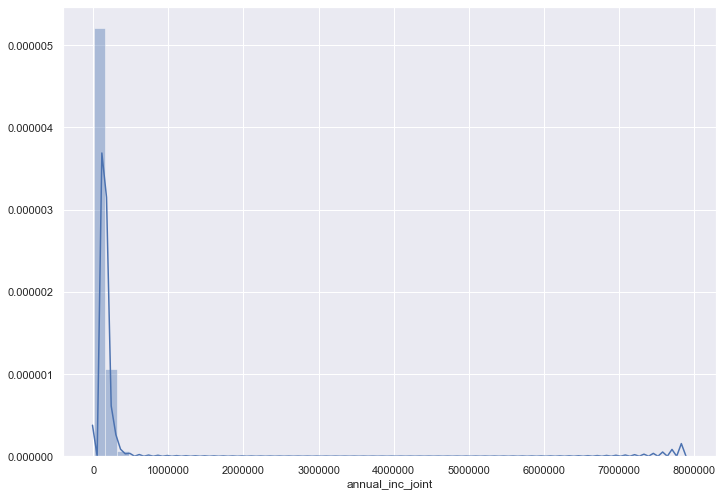

In [29]:
# Distributions of annual_inc_joint
sns.distplot(df['annual_inc_joint'], norm_hist = False, kde = True)

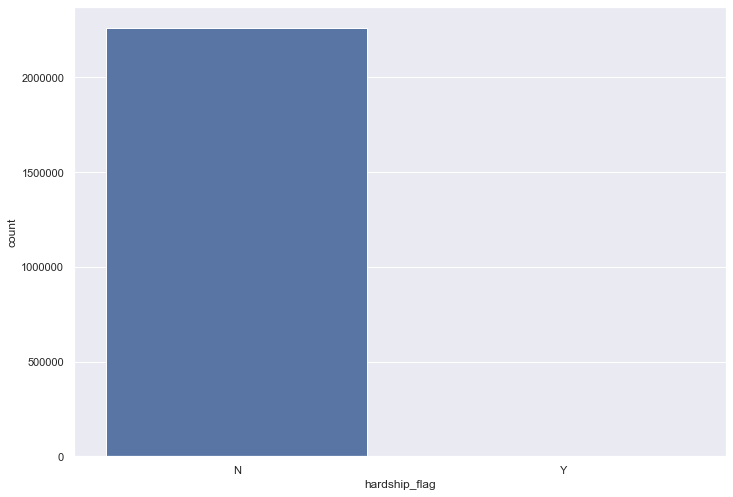

In [30]:
# Distribution of hardship_flag
sns.countplot(df['hardship_flag'])

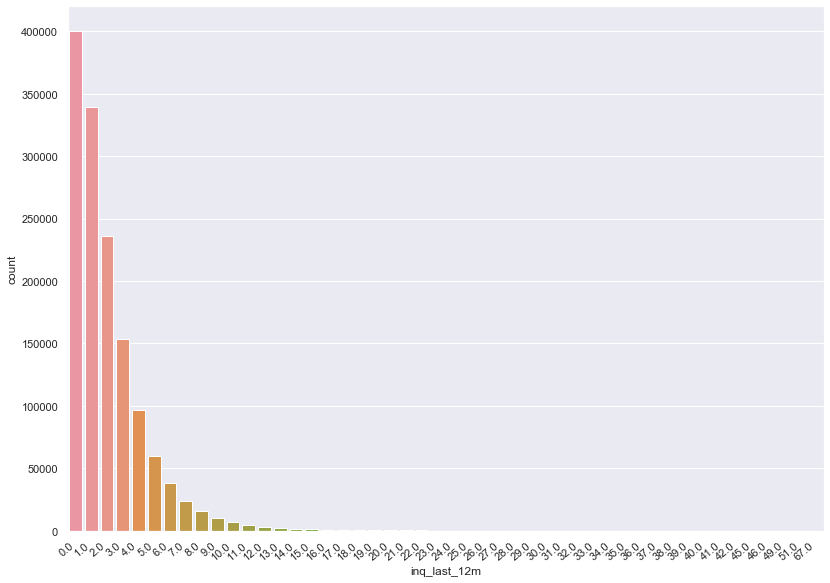

In [31]:
# Distribution of inq_last_12m
inql12m_sns = sns.countplot(df.inq_last_12m)

inql12m_sns.set_xticklabels(inql12m_sns.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

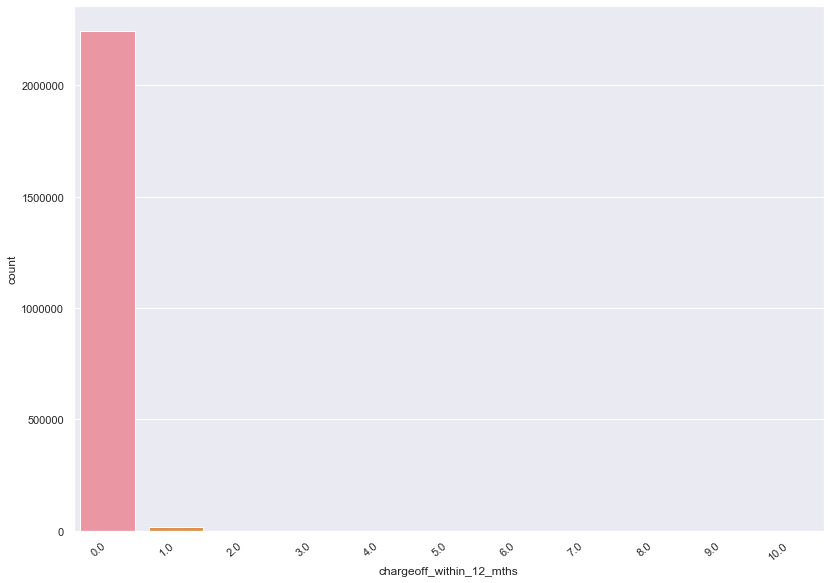

In [32]:
# Distribution of chargeoff_within_12_mths
choff12m_sns = sns.countplot(df.chargeoff_within_12_mths)

choff12m_sns.set_xticklabels(choff12m_sns.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

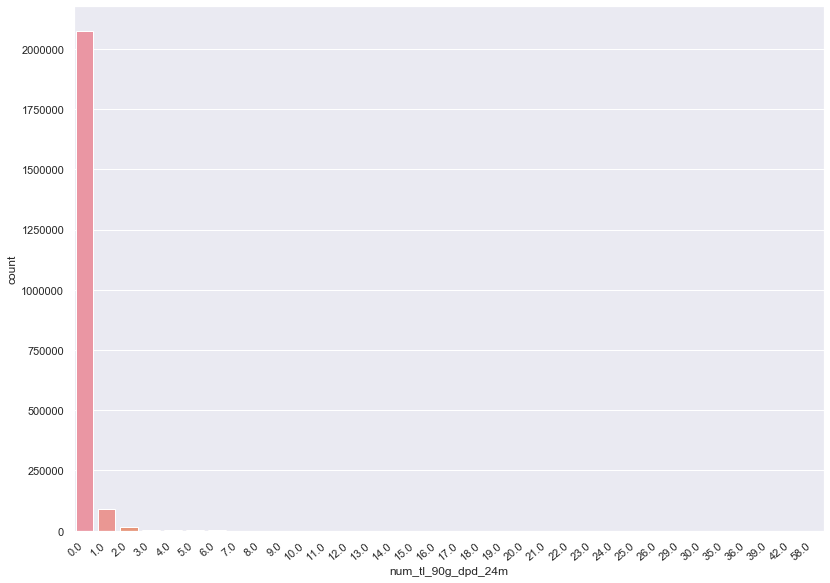

In [33]:
# Distribution of accounts 90 or more days past due
dpd90_sns = sns.countplot(df.num_tl_90g_dpd_24m)

dpd90_sns.set_xticklabels(dpd90_sns.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

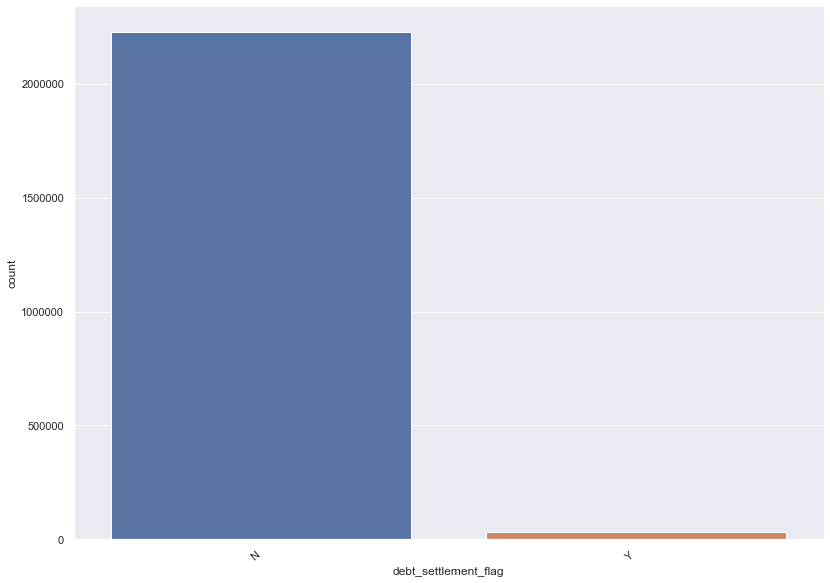

In [34]:
# Distribution of inq_last_12m
debtsettle_sns = sns.countplot(df.debt_settlement_flag)

debtsettle_sns.set_xticklabels(debtsettle_sns.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

## III. Multivariate Data Exploration: Correlation Matrix

In [35]:
# Separate into 5 groups in which we need to make correlation matrix

corr1 = df.iloc[:,0:30]
corr2 = df.iloc[:,31:60]
corr3 = df.iloc[:,61:90]
corr4 = df.iloc[:,91:120]
corr5 = df.iloc[:,121:]

### 1.) Correlation Group 1

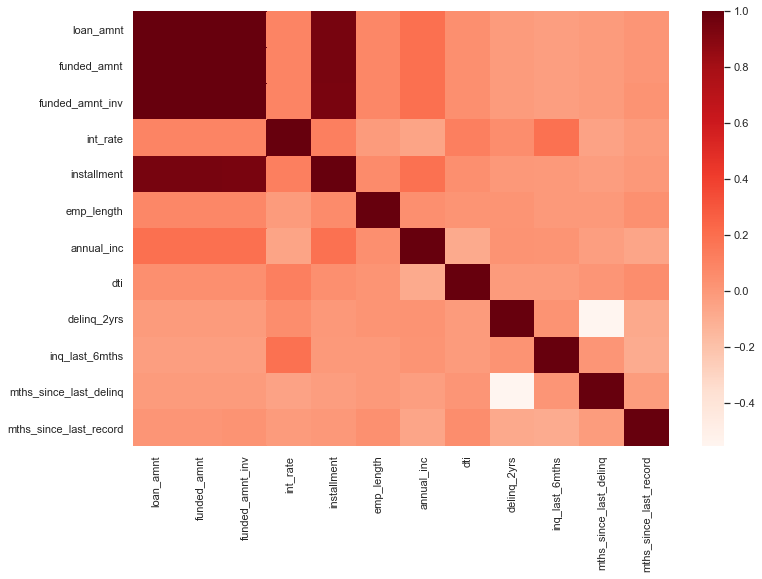

In [36]:
# Correlation Group 1 with Group 1
Corr1_1 = pd.concat([corr1, corr1], axis=1, keys=['corr1a', 'corr1b']).corr().loc['corr1b', 'corr1a'].drop(columns = ['id', 'member_id','url']).drop(['id', 'member_id', 'url'])
Corr1_1[abs(Corr1_1) >= .9]
plt.figure(figsize = (12,8))
sns.heatmap(Corr1_1, cmap = "Reds")

In [37]:
# Notable correlation from Corr1_1:
Index1_1 = Corr1_1[abs(Corr1_1) >= 0.5].stack().reset_index()
Index1_1 = Index1_1[Index1_1['level_0'].astype(str) != Index1_1['level_1'].astype(str)]

Index1_1['ordered-cols'] = Index1_1.apply(lambda x: '-'.join(sorted([x['level_0'], x['level_1']])),axis = 1)
Index1_1 = Index1_1.drop_duplicates(['ordered-cols'])
Index1_1.drop(['ordered-cols'], axis = 1, inplace = True)
Index1_1.columns = ['VarA', 'VarB', 'Rho']

Index1_1.sort_values(by = ['Rho'], ascending = False).head(10)

,VarA,VarB,Rho
1,loan_amnt,funded_amnt,0.999755
6,funded_amnt,funded_amnt_inv,0.999341
2,loan_amnt,funded_amnt_inv,0.999038
7,funded_amnt,installment,0.945969
3,loan_amnt,installment,0.945627
11,funded_amnt_inv,installment,0.945119
21,delinq_2yrs,mths_since_last_delinq,-0.552022


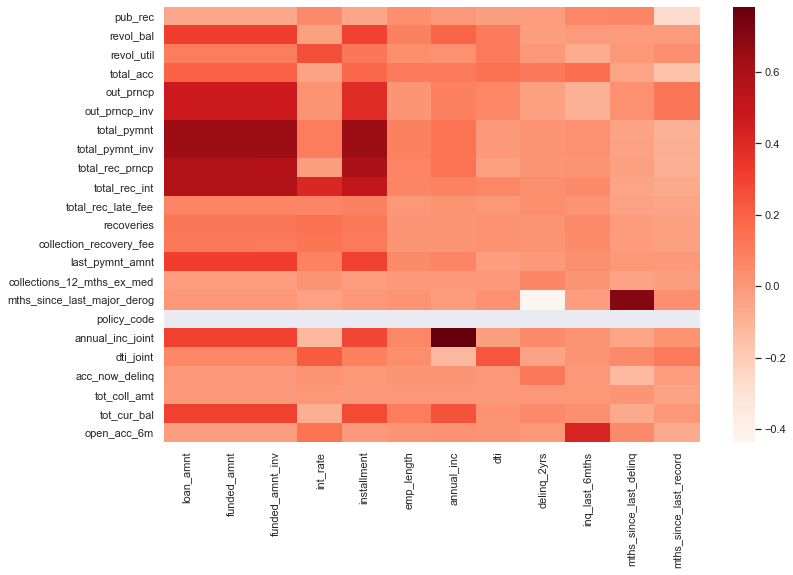

In [38]:
# Correlation Group 1 with Group 2
Corr1_2 = pd.concat([corr1, corr2], axis=1, keys=['corr1', 'corr2']).corr().loc['corr2', 'corr1'].drop(columns = ['id', 'member_id','url'])
Corr1_2[abs(Corr1_2) >= .9]
plt.figure(figsize = (12,8))
sns.heatmap(Corr1_2, cmap = "Reds")

In [39]:
# Notable correlation from Corr1_2:
Index1_2 = Corr1_2[abs(Corr1_2) >= 0.5].stack().reset_index()
Index1_2 = Index1_2[Index1_2['level_0'].astype(str) != Index1_2['level_1'].astype(str)]

Index1_2

,level_0,level_1,0
0,total_pymnt,loan_amnt,0.651127
1,total_pymnt,funded_amnt,0.651012
2,total_pymnt,funded_amnt_inv,0.650037
3,total_pymnt,installment,0.650012
4,total_pymnt_inv,loan_amnt,0.651193
5,total_pymnt_inv,funded_amnt,0.651133
6,total_pymnt_inv,funded_amnt_inv,0.651318
7,total_pymnt_inv,installment,0.649965
8,total_rec_prncp,loan_amnt,0.578036
9,total_rec_prncp,funded_amnt,0.577948


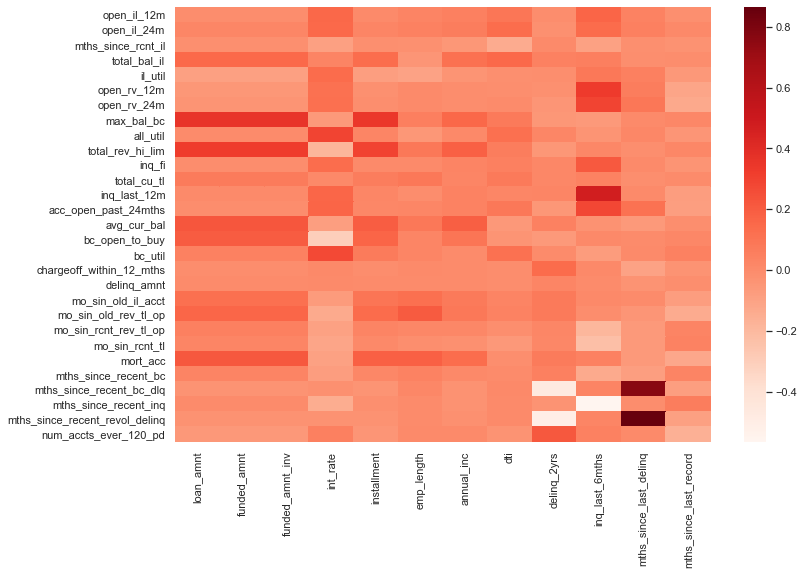

In [40]:
# Correlation Group 1 with Group 3
Corr1_3 = pd.concat([corr1, corr3], axis=1, keys=['corr1', 'corr3']).corr().loc['corr3', 'corr1'].drop(columns = ['id', 'member_id','url'])
Corr1_3[abs(Corr1_3) >= .9]
plt.figure(figsize = (12,8))
sns.heatmap(Corr1_3, cmap = "Reds")

In [41]:
# Notable correlation from Corr1_3:
Index1_3 = Corr1_3[abs(Corr1_3) >= 0.5].stack().reset_index()
Index1_3 = Index1_3[Index1_3['level_0'].astype(str) != Index1_3['level_1'].astype(str)]

Index1_3

,level_0,level_1,0
0,mths_since_recent_bc_dlq,mths_since_last_delinq,0.767639
1,mths_since_recent_inq,inq_last_6mths,-0.564312
2,mths_since_recent_revol_delinq,delinq_2yrs,-0.500561
3,mths_since_recent_revol_delinq,mths_since_last_delinq,0.864365


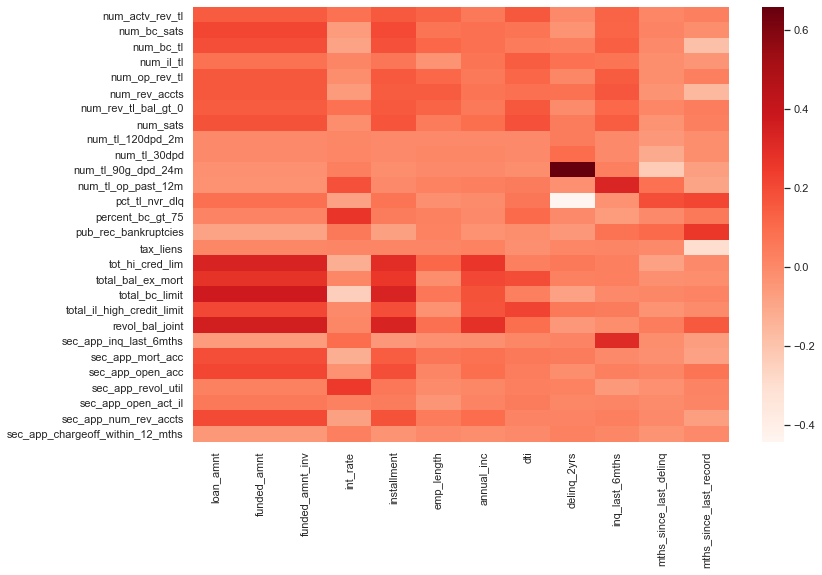

In [42]:
# Correlation Group 1 with Group 4
Corr1_4 = pd.concat([corr1, corr4], axis=1, keys=['corr1', 'corr4']).corr().loc['corr4', 'corr1'].drop(columns = ['id', 'member_id','url'])
Corr1_4[abs(Corr1_4) >= .9]
plt.figure(figsize = (12,8))
sns.heatmap(Corr1_4, cmap = "Reds")

In [43]:
# Notable correlation from Corr1_4:
Index1_4 = Corr1_4[abs(Corr1_4) >= 0.5].stack().reset_index()
Index1_4 = Index1_4[Index1_4['level_0'].astype(str) != Index1_4['level_1'].astype(str)]

Index1_4

,level_0,level_1,0
0,num_tl_90g_dpd_24m,delinq_2yrs,0.656949


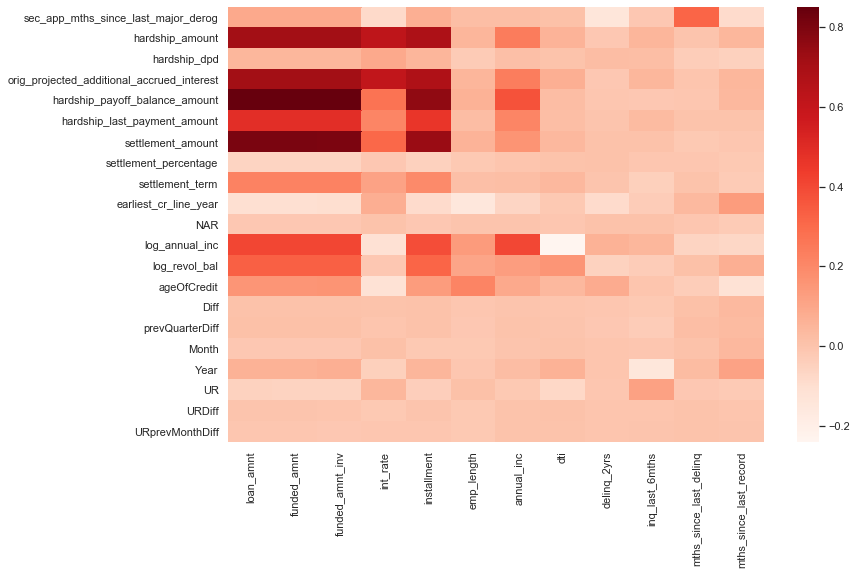

In [44]:
# Correlation Group 1 with Group 5
Corr1_5 = pd.concat([corr1, corr5], axis=1, keys=['corr1', 'corr5']).corr().loc['corr5', 'corr1'].drop(columns = ['id', 'member_id','url']).drop(['deferral_term', 'hardship_length'])
Corr1_5[abs(Corr1_5) >= .9]
plt.figure(figsize = (12,8))
sns.heatmap(Corr1_5, cmap = "Reds")

In [45]:
# Notable correlation from Corr1_5:
Index1_5 = Corr1_5[abs(Corr1_5) >= 0.5].stack().reset_index()
Index1_5 = Index1_5[Index1_5['level_0'].astype(str) != Index1_5['level_1'].astype(str)]

Index1_5

,level_0,level_1,0
0,hardship_amount,loan_amnt,0.715702
1,hardship_amount,funded_amnt,0.715702
2,hardship_amount,funded_amnt_inv,0.715651
3,hardship_amount,int_rate,0.622597
4,hardship_amount,installment,0.680939
5,orig_projected_additional_accrued_interest,loan_amnt,0.715062
6,orig_projected_additional_accrued_interest,funded_amnt,0.715062
7,orig_projected_additional_accrued_interest,funded_amnt_inv,0.715010
8,orig_projected_additional_accrued_interest,int_rate,0.612360
9,orig_projected_additional_accrued_interest,installment,0.677686


### 2.) Correlation Group 2

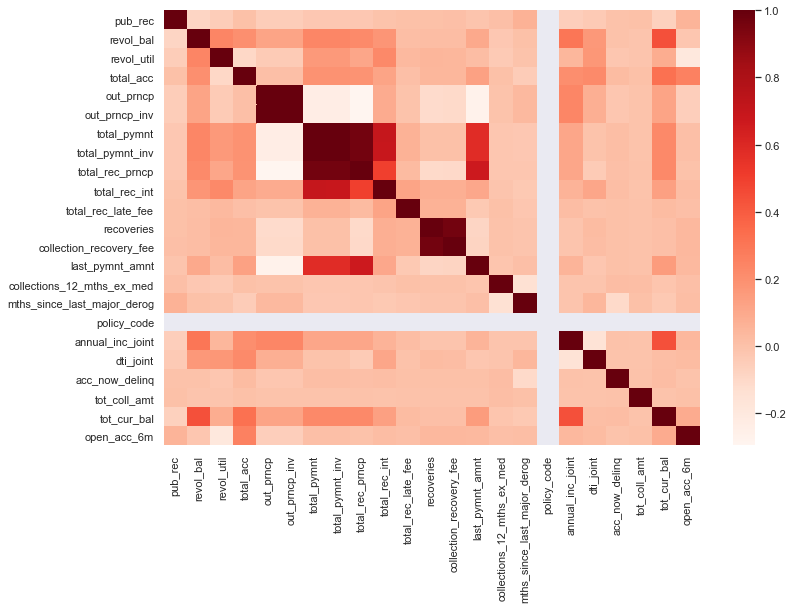

In [46]:
# Correlation group 2 with group 2
Corr2_2 = pd.concat([corr2, corr2], axis=1, keys=['corr2a', 'corr2b']).corr().loc['corr2b', 'corr2a']
Corr2_2[abs(Corr2_2) >= .9]
plt.figure(figsize = (12,8))
sns.heatmap(Corr2_2, cmap = "Reds")

In [47]:
# Notable correlation from Corr2_2:
Index2_2 = Corr2_2[abs(Corr2_2) >= 0.5].stack().reset_index()
Index2_2 = Index2_2[Index2_2['level_0'].astype(str) != Index2_2['level_1'].astype(str)]

Index2_2['ordered-cols'] = Index2_2.apply(lambda x: '-'.join(sorted([x['level_0'], x['level_1']])),axis = 1)
Index2_2 = Index2_2.drop_duplicates(['ordered-cols'])
Index2_2.drop(['ordered-cols'], axis = 1, inplace = True)
Index2_2.columns = ['VarA', 'VarB', 'Rho']

Index2_2.sort_values(by = ['Rho'], ascending = False).head(10)

,VarA,VarB,Rho
5,out_prncp,out_prncp_inv,0.999999
9,total_pymnt,total_pymnt_inv,0.999394
29,recoveries,collection_recovery_fee,0.968978
10,total_pymnt,total_rec_prncp,0.967017
15,total_pymnt_inv,total_rec_prncp,0.966391
11,total_pymnt,total_rec_int,0.696466
16,total_pymnt_inv,total_rec_int,0.696212
22,total_rec_prncp,last_pymnt_amnt,0.668926
17,total_pymnt_inv,last_pymnt_amnt,0.583789
12,total_pymnt,last_pymnt_amnt,0.583748


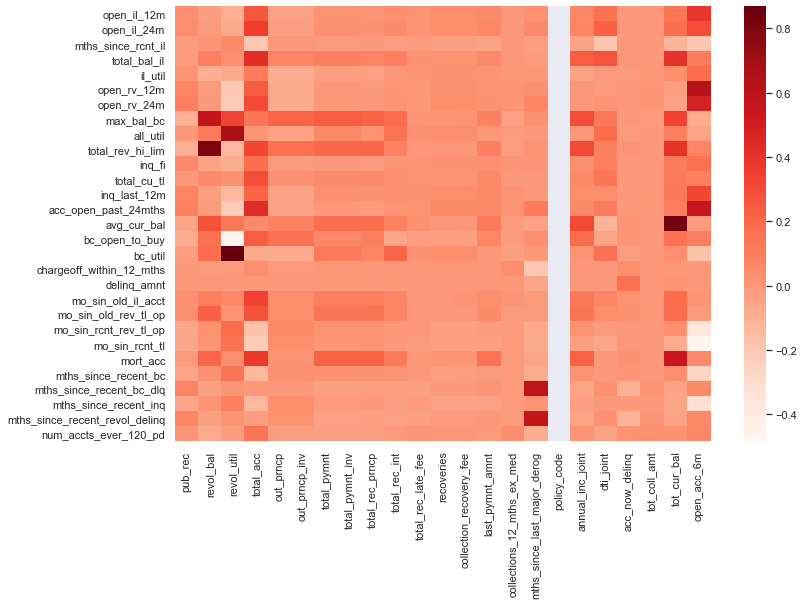

In [48]:
# Correlation group 2 with group 3
Corr2_3 = pd.concat([corr2, corr3], axis=1, keys=['corr2', 'corr3']).corr().loc['corr3', 'corr2']
Corr2_3[abs(Corr2_3) >= .9]
plt.figure(figsize = (12,8))
sns.heatmap(Corr2_3, cmap = "Reds")

In [49]:
# Notable correlation from Corr2_3:
Index2_3 = Corr2_3[abs(Corr2_3) >= 0.5].stack().reset_index()
Index2_3 = Index2_3[Index2_3['level_0'].astype(str) != Index2_3['level_1'].astype(str)]

Index2_3

,level_0,level_1,0
0,open_rv_12m,open_acc_6m,0.623835
1,max_bal_bc,revol_bal,0.563486
2,all_util,revol_util,0.668213
3,total_rev_hi_lim,revol_bal,0.804219
4,acc_open_past_24mths,open_acc_6m,0.559298
5,avg_cur_bal,tot_cur_bal,0.828210
6,bc_util,revol_util,0.868537
7,mort_acc,tot_cur_bal,0.541615
8,mths_since_recent_bc_dlq,mths_since_last_major_derog,0.586089
9,mths_since_recent_revol_delinq,mths_since_last_major_derog,0.569217


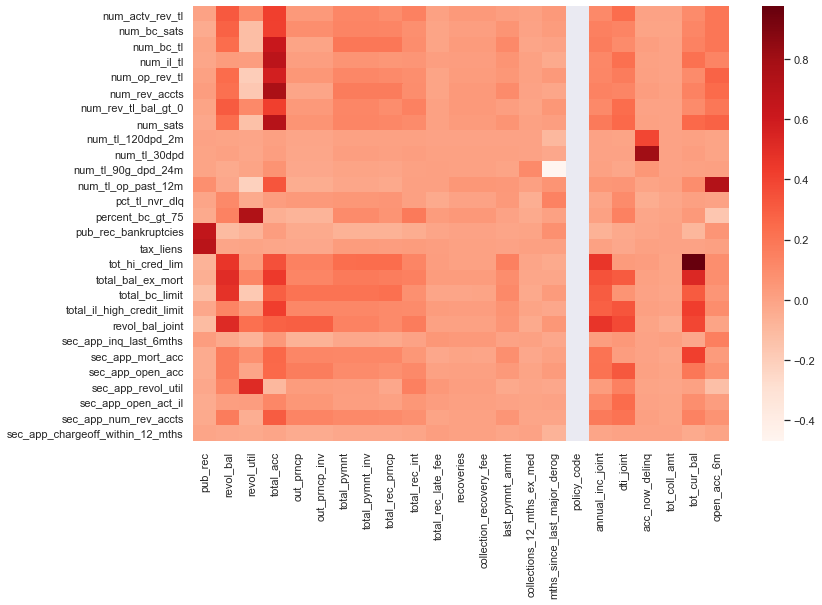

In [50]:
# Correlation group 2 with group 4
Corr2_4 = pd.concat([corr2, corr4], axis=1, keys=['corr2', 'corr4']).corr().loc['corr4', 'corr2']
Corr2_4[abs(Corr2_4) >= .9]
plt.figure(figsize = (12,8))
sns.heatmap(Corr2_4, cmap = "Reds")

In [51]:
# Notable correlation from Corr2_4:
Index2_4 = Corr2_4[abs(Corr2_4) >= 0.5].stack().reset_index()
Index2_4 = Index2_4[Index2_4['level_0'].astype(str) != Index2_4['level_1'].astype(str)]

Index2_4['ordered-cols'] = Index2_4.apply(lambda x: '-'.join(sorted([x['level_0'], x['level_1']])),axis = 1)
Index2_4 = Index2_4.drop_duplicates(['ordered-cols'])
Index2_4.drop(['ordered-cols'], axis = 1, inplace = True)
Index2_4.columns = ['VarA', 'VarB', 'Rho']

Index2_4.sort_values(by = ['Rho'], ascending = False).head(10)

,VarA,VarB,Rho
10,tot_hi_cred_lim,tot_cur_bal,0.975582
5,num_tl_30dpd,acc_now_delinq,0.801804
3,num_rev_accts,total_acc,0.764613
7,percent_bc_gt_75,revol_util,0.739611
6,num_tl_op_past_12m,open_acc_6m,0.726964
4,num_sats,total_acc,0.715618
9,tax_liens,pub_rec,0.697897
1,num_il_tl,total_acc,0.689847
8,pub_rec_bankruptcies,pub_rec,0.659237
0,num_bc_tl,total_acc,0.628687


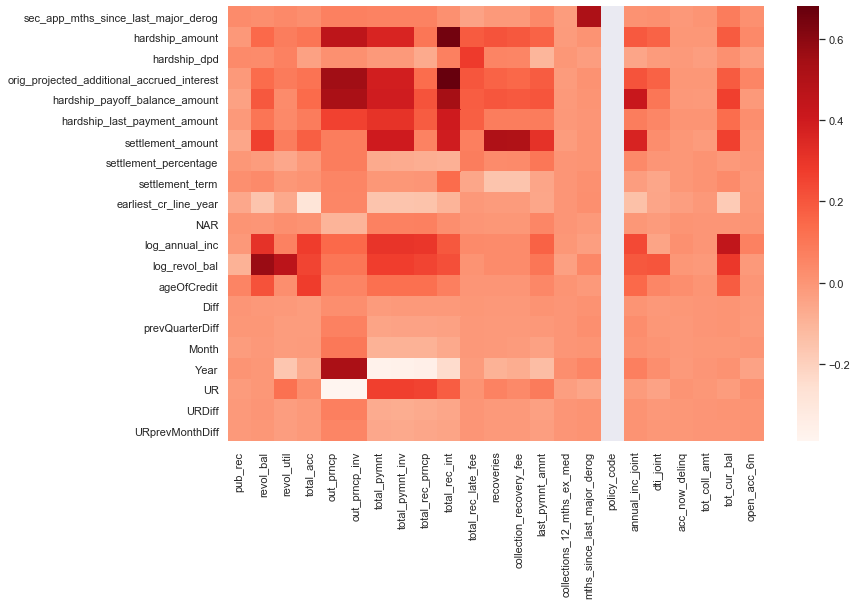

In [52]:
# Correlation group 2 with group 5
Corr2_5 = pd.concat([corr2, corr5], axis=1, keys=['corr2', 'corr5']).corr().loc['corr5', 'corr2'].drop(['deferral_term', 'hardship_length'])
Corr2_5[abs(Corr2_5) >= .9]
plt.figure(figsize = (12,8))
sns.heatmap(Corr2_5, cmap = "Reds")

In [53]:
# Notable correlation from Corr2_5:
Index2_5 = Corr2_5[abs(Corr2_5) >= 0.5].stack().reset_index()
Index2_5 = Index2_5[Index2_5['level_0'].astype(str) != Index2_5['level_1'].astype(str)]

Index2_5

,level_0,level_1,0
0,sec_app_mths_since_last_major_derog,mths_since_last_major_derog,0.515985
1,hardship_amount,total_rec_int,0.654011
2,orig_projected_additional_accrued_interest,out_prncp,0.553474
3,orig_projected_additional_accrued_interest,out_prncp_inv,0.553480
4,orig_projected_additional_accrued_interest,total_rec_int,0.679709
5,hardship_payoff_balance_amount,out_prncp,0.529061
6,hardship_payoff_balance_amount,out_prncp_inv,0.529086
7,hardship_payoff_balance_amount,total_rec_int,0.539793
8,settlement_amount,recoveries,0.510089
9,settlement_amount,collection_recovery_fee,0.507884


### 3.) Correlation Group 3

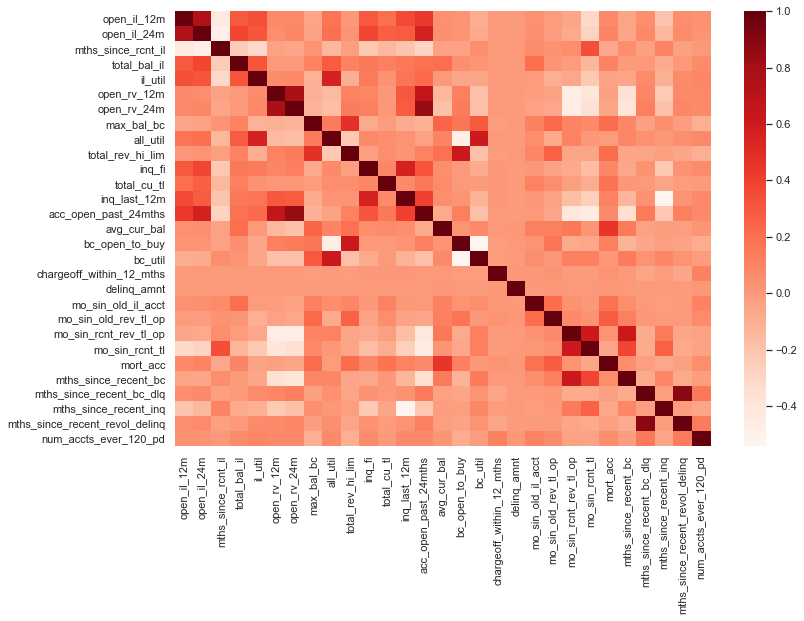

In [54]:
# Correlation group 3 with group 3
Corr3_3 = pd.concat([corr3, corr3], axis=1, keys=['corr3a', 'corr3b']).corr().loc['corr3b', 'corr3a']
Corr3_3[Corr3_3 >= .9]
plt.figure(figsize = (12,8))
sns.heatmap(Corr3_3, cmap = "Reds")

In [55]:
# Notable correlation from Corr3_3:
Index3_3 = Corr3_3[abs(Corr3_3) >= 0.5].stack().reset_index()
Index3_3 = Index3_3[Index3_3['level_0'].astype(str) != Index3_3['level_1'].astype(str)]

Index3_3

,level_0,level_1,0
1,open_il_12m,open_il_24m,0.747459
2,open_il_24m,open_il_12m,0.747459
4,open_il_24m,acc_open_past_24mths,0.571887
8,il_util,all_util,0.561721
10,open_rv_12m,open_rv_24m,0.777855
11,open_rv_12m,acc_open_past_24mths,0.659266
12,open_rv_24m,open_rv_12m,0.777855
14,open_rv_24m,acc_open_past_24mths,0.849373
16,all_util,il_util,0.561721
18,all_util,bc_util,0.606344


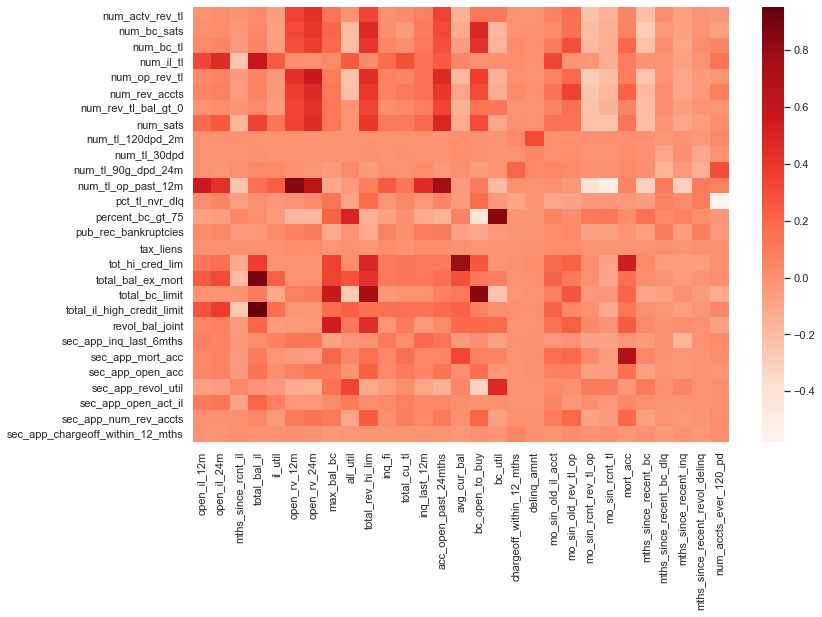

In [56]:
# Correlation group 3 with group 4
Corr3_4 = pd.concat([corr3, corr4], axis=1, keys=['corr3', 'corr4']).corr().loc['corr4', 'corr3']
Corr3_4[Corr3_4 >= .9]
plt.figure(figsize = (12,8))
sns.heatmap(Corr3_4, cmap = "Reds")

In [57]:
# Notable correlation from Corr3_4:
Index3_4 = Corr3_4[abs(Corr3_4) >= 0.5].stack().reset_index()
Index3_4 = Index3_4[Index3_4['level_0'].astype(str) != Index3_4['level_1'].astype(str)]

Index3_4['ordered-cols'] = Index3_4.apply(lambda x: '-'.join(sorted([x['level_0'], x['level_1']])),axis = 1)
Index3_4 = Index3_4.drop_duplicates(['ordered-cols'])
Index3_4.drop(['ordered-cols'], axis = 1, inplace = True)
Index3_4.columns = ['VarA', 'VarB', 'Rho']

Index3_4.sort_values(by = ['Rho'], ascending = False).head(10)

,VarA,VarB,Rho
15,total_il_high_credit_limit,total_bal_il,0.952186
11,total_bal_ex_mort,total_bal_il,0.900038
8,percent_bc_gt_75,bc_util,0.846756
14,total_bc_limit,bc_open_to_buy,0.843734
3,num_tl_op_past_12m,open_rv_12m,0.843456
9,tot_hi_cred_lim,avg_cur_bal,0.787829
5,num_tl_op_past_12m,acc_open_past_24mths,0.764799
13,total_bc_limit,total_rev_hi_lim,0.756010
17,sec_app_mort_acc,mort_acc,0.704433
4,num_tl_op_past_12m,open_rv_24m,0.664716


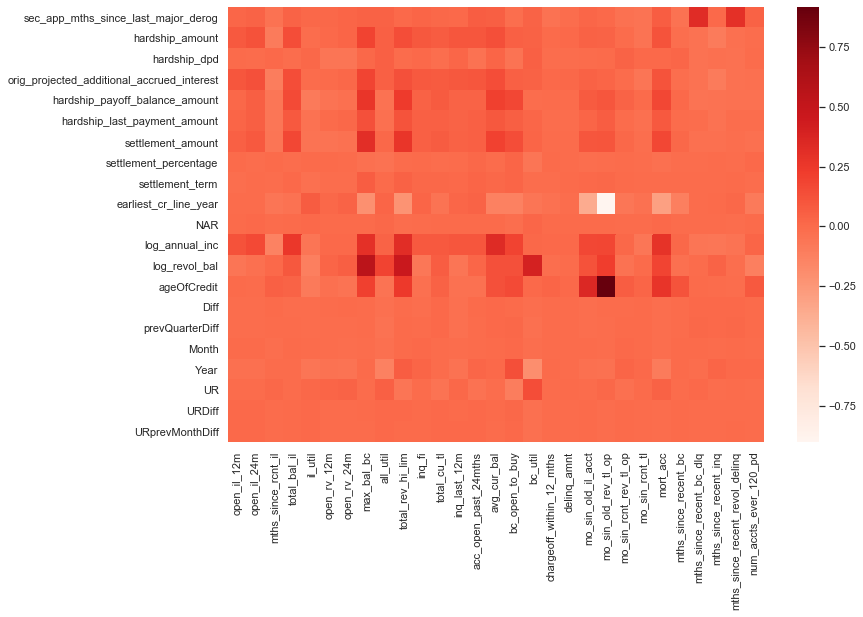

In [58]:
# Correlation group 3 with group 5
Corr3_5 = pd.concat([corr3, corr5], axis=1, keys=['corr3', 'corr5']).corr().loc['corr5', 'corr3'].drop(['deferral_term', 'hardship_length'])
Corr3_5[Corr3_5 >= .9]
plt.figure(figsize = (12,8))
sns.heatmap(Corr3_5, cmap = "Reds")

In [59]:
# Notable correlation from Corr3_5:
Index3_5 = Corr3_5[abs(Corr3_5) >= 0.5].stack().reset_index()
Index3_5 = Index3_5[Index3_5['level_0'].astype(str) != Index3_5['level_1'].astype(str)]

Index3_5

,level_0,level_1,0
0,earliest_cr_line_year,mo_sin_old_rev_tl_op,-0.900728
1,log_revol_bal,max_bal_bc,0.556031
2,ageOfCredit,mo_sin_old_rev_tl_op,0.915675


### 4.) Correlation Group 4

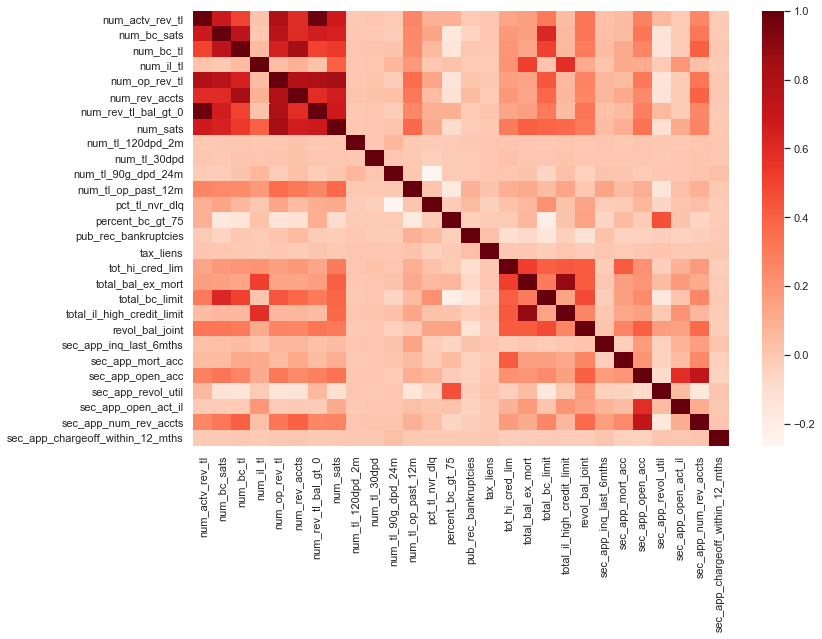

In [60]:
# Correlation group 4 with group 4
Corr4_4 = pd.concat([corr4, corr4], axis=1, keys=['corr4a', 'corr4b']).corr().loc['corr4b', 'corr4a']
Corr4_4[Corr4_4 >= .9]
plt.figure(figsize = (12,8))
sns.heatmap(Corr4_4, cmap = "Reds")

In [61]:
# Notable correlation from Corr4_4:
Index4_4 = Corr4_4[abs(Corr4_4) >= 0.5].stack().reset_index()
Index4_4 = Index4_4[Index4_4['level_0'].astype(str) != Index4_4['level_1'].astype(str)]

Index4_4['ordered-cols'] = Index4_4.apply(lambda x: '-'.join(sorted([x['level_0'], x['level_1']])),axis = 1)
Index4_4 = Index4_4.drop_duplicates(['ordered-cols'])
Index4_4.drop(['ordered-cols'], axis = 1, inplace = True)
Index4_4.columns = ['VarA', 'VarB', 'Rho']

Index4_4.sort_values(by = ['Rho'], ascending = False).head(10)

,VarA,VarB,Rho
5,num_actv_rev_tl,num_rev_tl_bal_gt_0,0.983638
67,total_bal_ex_mort,total_il_high_credit_limit,0.877179
19,num_bc_tl,num_rev_accts,0.839885
32,num_op_rev_tl,num_sats,0.836870
31,num_op_rev_tl,num_rev_tl_bal_gt_0,0.802770
3,num_actv_rev_tl,num_op_rev_tl,0.798786
30,num_op_rev_tl,num_rev_accts,0.794051
10,num_bc_sats,num_op_rev_tl,0.762508
9,num_bc_sats,num_bc_tl,0.747681
79,sec_app_open_acc,sec_app_num_rev_accts,0.731956


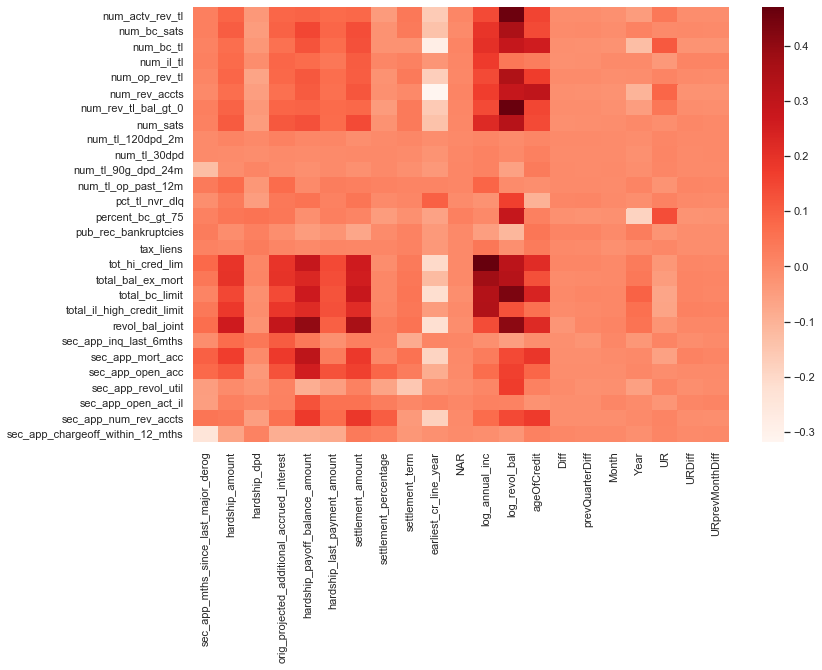

In [62]:
# Correlation group 4 with group 5
Corr4_5 = pd.concat([corr5, corr4], axis=1, keys=['corr5', 'corr4']).corr().loc['corr4', 'corr5'].drop(columns = ['deferral_term', 'hardship_length'])
# or similarly
# pd.concat([corr4, corr5], axis=1, keys=['corr4', 'corr5']).corr().loc['corr4', 'corr5'].drop(columns = ['deferral_term', 'hardship_length'])
Corr4_5[Corr4_5 >= .9]
plt.figure(figsize = (12,8))
sns.heatmap(Corr4_5, cmap = "Reds")

In [63]:
# Notable correlation from Corr4_5:
Index4_5 = Corr4_5[abs(Corr4_5) >= 0.5].stack().reset_index()
Index4_5 = Index4_5[Index4_5['level_0'].astype(str) != Index4_5['level_1'].astype(str)]

Index4_5

,level_0,level_1,0


### 5.) Correlation Group 5

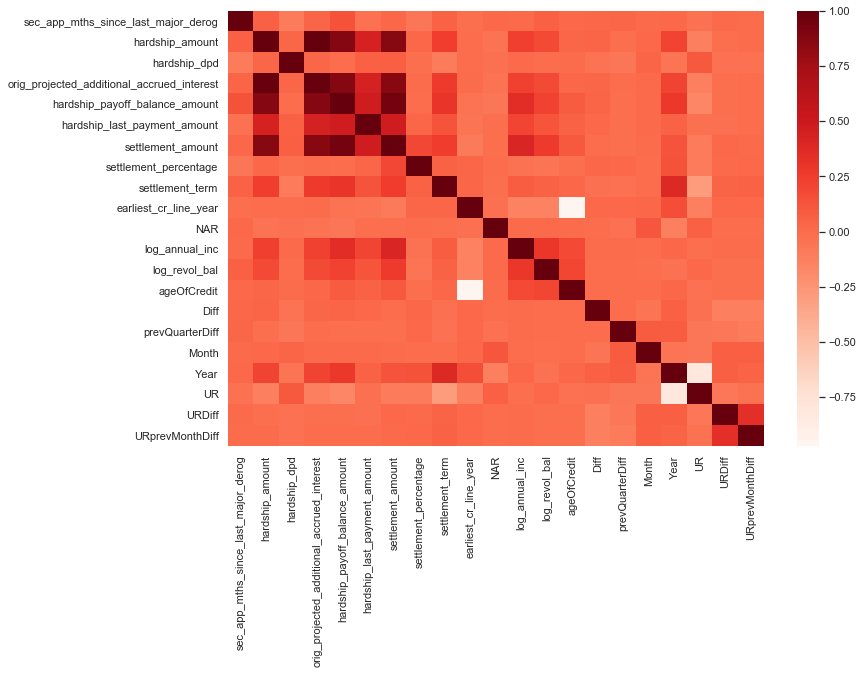

In [64]:
# Correlation group 5 with group 5
Corr5_5 = pd.concat([corr5, corr5], axis=1, keys=['corr5a', 'corr5b']).corr().loc['corr5b', 'corr5a'].drop(columns = ['deferral_term', 'hardship_length']).drop(['deferral_term', 'hardship_length'])
Corr5_5[Corr5_5 >= .9]
plt.figure(figsize = (12,8))
sns.heatmap(Corr5_5, cmap = "Reds")

In [65]:
# Notable correlation from Corr5_5:
Index5_5 = Corr5_5[abs(Corr5_5) >= 0.5].stack().reset_index()
Index5_5 = Index5_5[Index5_5['level_0'].astype(str) != Index5_5['level_1'].astype(str)]

Index5_5['ordered-cols'] = Index5_5.apply(lambda x: '-'.join(sorted([x['level_0'], x['level_1']])),axis = 1)
Index5_5 = Index5_5.drop_duplicates(['ordered-cols'])
Index5_5.drop(['ordered-cols'], axis = 1, inplace = True)
Index5_5.columns = ['VarA', 'VarB', 'Rho']

Index5_5.sort_values(by = ['Rho'], ascending = False).head(10)

,VarA,VarB,Rho
2,hardship_amount,orig_projected_additional_accrued_interest,1.000000
13,hardship_payoff_balance_amount,settlement_amount,0.948612
3,hardship_amount,hardship_payoff_balance_amount,0.881758
8,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,0.880690
4,hardship_amount,settlement_amount,0.874708
9,orig_projected_additional_accrued_interest,settlement_amount,0.865936
32,Year,UR,-0.803703
22,earliest_cr_line_year,ageOfCredit,-0.972622


## IV. Data Pre-processing: Dealing with Null Values

---



### Data Processing

In [66]:
df.shape

(2260668, 163)

In [67]:
df['loan_status'].describe()

count        2260668
unique             9
top       Fully Paid
freq         1041952
Name: loan_status, dtype: object

In [68]:
df['loan_status'].value_counts(dropna = False)

Fully Paid                                             1041952
Current                                                 919695
Charged Off                                             261655
Late (31-120 days)                                       21897
In Grace Period                                           8952
Late (16-30 days)                                         3737
Does not meet the credit policy. Status:Fully Paid        1988
Does not meet the credit policy. Status:Charged Off        761
Default                                                     31
Name: loan_status, dtype: int64

We want to get our model to be trained to identify fully paid and charged off loans

In [69]:
df1 = df.loc[df['loan_status'].isin(['Fully Paid', 'Charged Off'])].copy()
df2 = df.loc[df['loan_status'].isin(['Fully Paid', 'Charged Off'])].copy()
print(df1.shape)
print(df2.shape)

(1303607, 163)
(1303607, 163)


In [70]:
df2['loan_status'].value_counts(dropna=False)

Fully Paid     1041952
Charged Off     261655
Name: loan_status, dtype: int64

In [71]:
# Almost 80% of the loans have been full paid and 20% have charged off, it will be unbalanced in our models if we decide to do classfication.
df2['loan_status'].value_counts(normalize=True, dropna=False)

Fully Paid     0.799284
Charged Off    0.200716
Name: loan_status, dtype: float64

In [72]:
# Checking missing values and creating a histogram for it
missing_values = df2.isnull().sum().sort_values(ascending = False)/len(df2)
missing_values

id                                            1.000000
member_id                                     1.000000
url                                           1.000000
next_pymnt_d                                  1.000000
orig_projected_additional_accrued_interest    0.997367
                                                ...   
out_prncp_inv                                 0.000000
out_prncp                                     0.000000
initial_list_status                           0.000000
total_acc                                     0.000000
URprevMonthDiff                               0.000000
Length: 163, dtype: float64

Text(0, 0.5, 'Feature count')

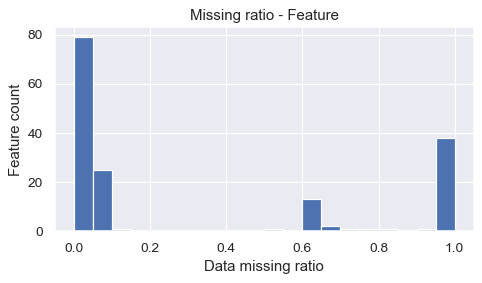

In [73]:
plt.figure(figsize=(6,3), dpi=90)
missing_values.plot.hist(bins=20)
plt.title('Missing ratio - Feature')
plt.xlabel('Data missing ratio')
plt.ylabel('Feature count')

We cherry-picked several variables and these variables will not be known when we accept the application. Our machine learning algorithm is trying to predict when Lending Club extends their loans whether it's going to be a fully paid one or a charged-off one given all the information at that point of investing. Some of the variables in list dv, we wouldn't know until we extend the loans; some of them are too inconsistent. These variables in ov are overlapping variables, meaning that other variables are explaining the same thing. Thus, we will be dropping these attributes off. For more complete reasons, please check our paper appendix.

As an example: hardship_flag shows whether a certain borrower is under hardship and would request a loan extension or reduced payments. We wouldn't know that a certain borrower would request this until we extend the loan, thus we are not going to use these hardship, settlement, total_pymnt variables

In [74]:
df.columns.values.tolist()

['id',
 'member_id',
 'loan_amnt',
 'funded_amnt',
 'funded_amnt_inv',
 'term',
 'int_rate',
 'installment',
 'grade',
 'sub_grade',
 'emp_title',
 'emp_length',
 'home_ownership',
 'annual_inc',
 'verification_status',
 'issue_d',
 'loan_status',
 'pymnt_plan',
 'url',
 'desc',
 'purpose',
 'title',
 'zip_code',
 'addr_state',
 'dti',
 'delinq_2yrs',
 'earliest_cr_line',
 'inq_last_6mths',
 'mths_since_last_delinq',
 'mths_since_last_record',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'initial_list_status',
 'out_prncp',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'total_rec_late_fee',
 'recoveries',
 'collection_recovery_fee',
 'last_pymnt_d',
 'last_pymnt_amnt',
 'next_pymnt_d',
 'last_credit_pull_d',
 'collections_12_mths_ex_med',
 'mths_since_last_major_derog',
 'policy_code',
 'application_type',
 'annual_inc_joint',
 'dti_joint',
 'verification_status_joint',
 'acc_now_delinq',
 'tot_coll_amt',
 'tot_cur_

We have created two variables below: keep_list1 and keep_list2. keep_list1 is taken from everything that we can get from an investor's perspectives as they are buying notes from LendingClub. We can show you the screen.


keep_list2, however, is different from keep_list1 in such a manner that all the variables included there are from hard inquiry credit check. Since the variables are not accessible readily to an investor, we have decided not to use that.

Remember, our research question concerns the investors making a decision to buy a note or not. Thus, all information readily accessible to them at that point of purchase should be taken into account. 

In [75]:
keep_list1 = ['loan_amnt', 'issue_d', 'loan_status', 'funded_amnt', 'funded_amnt_inv', 'verification_status', 'installment', 'grade', 'sub_grade', 'home_ownership', 'emp_length', 'emp_title', 'addr_state', 'zip_code', 'annual_inc', 'dti', 'ageOfCredit', 'earliest_cr_line', 'earliest_cr_line_year', 'open_acc', 'total_acc', 'revol_bal', 'revol_util', 'inq_last_6mths', 'acc_now_delinq', 'delinq_amnt', 'delinq_2yrs', 'mths_since_last_delinq', 'pub_rec', 'mths_since_last_record', 'collections_12_mths_ex_med', 'mths_since_last_major_derog', 'int_rate', 'tot_coll_amt', 'purpose', 'term', 'initial_list_status', 'application_type', 'annual_inc_joint', 'dti_joint', 'verification_status_joint', 'length_as', 'NAR', 'pqissue_d', 'issue_q', 'log_annual_inc', 'log_revol_bal', 'Diff', 'pqissue_q', 'prevQuarterDiff', 'Month', 'Year', 'UR', 'YearMonth', 'YearQuarter', 'URDiff', 'URprevMonthDiff']
keep_list2 = ['loan_amnt', 'open_acc_6m', 'open_act_il', 'open_il_12m', 'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util', 'chargeoff_within_12_mths', 'issue_d', 'loan_status', 'funded_amnt', 'funded_amnt_inv', 'verification_status', 'installment', 'grade', 'sub_grade', 'home_ownership', 'emp_length', 'emp_title', 'addr_state', 'zip_code', 'annual_inc', 'log_annual_inc', 'dti', 'ageOfCredit', 'earliest_cr_line', 'earliest_cr_line_year', 'open_acc', 'total_acc', 'revol_bal', 'revol_util', 'inq_last_6m', 'acc_now_delinq', 'delinq_amnt', 'delinq_2yrs', 'mths_since_last_delinq', 'pub_rec', 'mths_since_last_record', 'collections_12_mths_ex_med', 'mths_since_last_major_derog', 'int_rate', 'inq_last_6mths', 'tot_coll_amt', 'purpose', 'term', 'initial_list_status', 'application_type', 'annual_inc_joint', 'dti_joint', 'verification_status_joint', 'length_as', 'NAR', 'pqissue_d', 'issue_q', 'log_annual_inc', 'log_revol_bal', 'Diff', 'pqissue_q', 'prevQuarterDiff', 'Month', 'Year', 'UR', 'YearMonth', 'YearQuarter', 'URDiff', 'URprevMonthDiff', 'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq', 'mths_since_recent_inq', 'mths_since_recent_revol_delinq', 'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m', 'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq', 'ercent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens', 'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit', 'total_il_high_credit_limit', 'revol_bal_joint', 'sec_app_earliest_cr_line', 'sec_app_inq_last_6mths', 'sec_app_mort_acc', 'sec_app_open_acc', 'sec_app_revol_util', 'sec_app_open_act_il', 'sec_app_num_rev_accts', 'sec_app_chargeoff_within_12_mths', 'sec_app_collections_12_mths_ex_med', 'sec_app_mths_since_last_major_derog', 'disbursement_method']

After examining the Correlation Analysis, we have decided to keep these variables only. The difference between two sets below shows what have been deducted from keep_list1. 

Month, Year, YearMonth, YearQuarter, issue_q, pqissue_q, and pqissue_d are derivatives of issue_d. Since we are keeping the issue_d, we are dropping these variables.

earliest_cr_line and earliest_cr_line_year are being dropped because we have gotten all the information possibly in a better format which is ageOfCredit.

emp_title is too inconsistent in its values and doesn't determine their repaying powers.

installment, funded_amnt, and funded_amnt_inv are too correlated with loan_amnt.

inq_last_6m is correlated with inq_last_6mths and we are keeping the latter.

sub_grade contains the same information with grade, thus we drop it

zip_code contains the same information as addr_state thus we drop it

mths_since_last delinq and mths_since last_major_derog are highly correlated with delinq_2years, thus we drop them

In [76]:
keep_list3 = ['loan_amnt', 'issue_d', 'loan_status', 'verification_status', 'grade',  'home_ownership', 'emp_length', 
              'addr_state', 'annual_inc', 'log_annual_inc', 'dti', 'ageOfCredit', 'open_acc', 'total_acc', 'revol_bal', 
              'revol_util', 'acc_now_delinq', 'delinq_amnt', 'delinq_2yrs',  
              'pub_rec', 'mths_since_last_record', 'collections_12_mths_ex_med',
              'int_rate', 'inq_last_6mths', 'tot_coll_amt', 'purpose', 'term', 'initial_list_status', 'application_type', 
              'annual_inc_joint', 'dti_joint', 'verification_status_joint','NAR',
              'log_revol_bal', 'Diff', 'prevQuarterDiff', 'UR', 'URDiff', 'URprevMonthDiff']

# Check what is not in keep_list3 - reasons for dropping are attached above
set(keep_list1) - set(keep_list3)

{'Month',
 'Year',
 'YearMonth',
 'YearQuarter',
 'earliest_cr_line',
 'earliest_cr_line_year',
 'emp_title',
 'funded_amnt',
 'funded_amnt_inv',
 'installment',
 'issue_q',
 'length_as',
 'mths_since_last_delinq',
 'mths_since_last_major_derog',
 'pqissue_d',
 'pqissue_q',
 'sub_grade',
 'zip_code'}

In [77]:
# The followings are the dropped variables from the original df
# We will be using keep_list3 throughout
drop_list1 = list(set(df.columns.values.tolist()) - set(keep_list3))
drop_list1

['open_rv_12m',
 'YearQuarter',
 'mths_since_recent_inq',
 'sec_app_earliest_cr_line',
 'member_id',
 'debt_settlement_flag',
 'mort_acc',
 'mo_sin_rcnt_rev_tl_op',
 'sec_app_mths_since_last_major_derog',
 'mo_sin_rcnt_tl',
 'open_act_il',
 'total_cu_tl',
 'num_actv_bc_tl',
 'inq_last_12m',
 'inq_fi',
 'issue_q',
 'recoveries',
 'url',
 'funded_amnt',
 'last_credit_pull_d',
 'sec_app_open_acc',
 'settlement_status',
 'settlement_percentage',
 'mo_sin_old_il_acct',
 'total_il_high_credit_limit',
 'pub_rec_bankruptcies',
 'sec_app_open_act_il',
 'title',
 'last_pymnt_d',
 'last_pymnt_amnt',
 'mths_since_recent_bc',
 'emp_title',
 'policy_code',
 'total_bal_ex_mort',
 'open_il_12m',
 'chargeoff_within_12_mths',
 'open_acc_6m',
 'sec_app_revol_util',
 'hardship_loan_status',
 'mths_since_recent_bc_dlq',
 'debt_settlement_flag_date',
 'Month',
 'mths_since_rcnt_il',
 'hardship_status',
 'open_il_24m',
 'num_tl_op_past_12m',
 'hardship_last_payment_amount',
 'settlement_date',
 'num_bc_sats'

In [78]:
df1.columns.values.tolist()

['id',
 'member_id',
 'loan_amnt',
 'funded_amnt',
 'funded_amnt_inv',
 'term',
 'int_rate',
 'installment',
 'grade',
 'sub_grade',
 'emp_title',
 'emp_length',
 'home_ownership',
 'annual_inc',
 'verification_status',
 'issue_d',
 'loan_status',
 'pymnt_plan',
 'url',
 'desc',
 'purpose',
 'title',
 'zip_code',
 'addr_state',
 'dti',
 'delinq_2yrs',
 'earliest_cr_line',
 'inq_last_6mths',
 'mths_since_last_delinq',
 'mths_since_last_record',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'initial_list_status',
 'out_prncp',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'total_rec_late_fee',
 'recoveries',
 'collection_recovery_fee',
 'last_pymnt_d',
 'last_pymnt_amnt',
 'next_pymnt_d',
 'last_credit_pull_d',
 'collections_12_mths_ex_med',
 'mths_since_last_major_derog',
 'policy_code',
 'application_type',
 'annual_inc_joint',
 'dti_joint',
 'verification_status_joint',
 'acc_now_delinq',
 'tot_coll_amt',
 'tot_cur_

In [79]:
# Dropping columns not attached in keep_list3
df1 = df1[keep_list1]
df2 = df2[keep_list3]

In [80]:
# Checking missing values and creating a histogram for it
missing_values = df1.isnull().sum().sort_values(ascending = False)/len(df1)
missing_values

verification_status_joint      9.822868e-01
dti_joint                      9.821764e-01
annual_inc_joint               9.821748e-01
mths_since_last_record         8.298828e-01
mths_since_last_major_derog    7.373695e-01
mths_since_last_delinq         5.046183e-01
emp_title                      6.334655e-02
emp_length                     5.788094e-02
tot_coll_amt                   5.180012e-02
NAR                            1.729816e-03
revol_util                     6.213529e-04
dti                            2.393359e-04
collections_12_mths_ex_med     4.295773e-05
zip_code                       7.671024e-07
inq_last_6mths                 7.671024e-07
home_ownership                 0.000000e+00
earliest_cr_line_year          0.000000e+00
revol_bal                      0.000000e+00
total_acc                      0.000000e+00
issue_d                        0.000000e+00
open_acc                       0.000000e+00
loan_status                    0.000000e+00
funded_amnt                    0

Text(0, 0.5, 'Feature count')

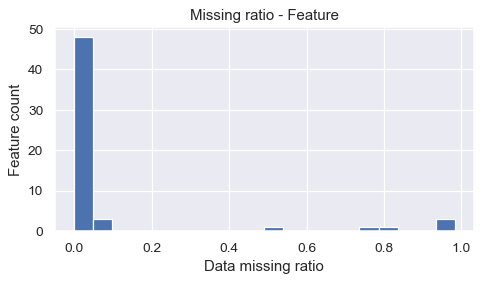

In [81]:
plt.figure(figsize=(6,3), dpi=90)
missing_values.plot.hist(bins=20)
plt.title('Missing ratio - Feature')
plt.xlabel('Data missing ratio')
plt.ylabel('Feature count')

In [82]:
# Checking missing values and creating a histogram for it
missing_values = df2.isnull().sum().sort_values(ascending = False)/len(df2)
missing_values

verification_status_joint     9.822868e-01
dti_joint                     9.821764e-01
annual_inc_joint              9.821748e-01
mths_since_last_record        8.298828e-01
emp_length                    5.788094e-02
tot_coll_amt                  5.180012e-02
NAR                           1.729816e-03
revol_util                    6.213529e-04
dti                           2.393359e-04
collections_12_mths_ex_med    4.295773e-05
inq_last_6mths                7.671024e-07
total_acc                     0.000000e+00
open_acc                      0.000000e+00
ageOfCredit                   0.000000e+00
log_annual_inc                0.000000e+00
URprevMonthDiff               0.000000e+00
annual_inc                    0.000000e+00
revol_bal                     0.000000e+00
home_ownership                0.000000e+00
grade                         0.000000e+00
verification_status           0.000000e+00
loan_status                   0.000000e+00
issue_d                       0.000000e+00
addr_state 

Text(0, 0.5, 'Feature count')

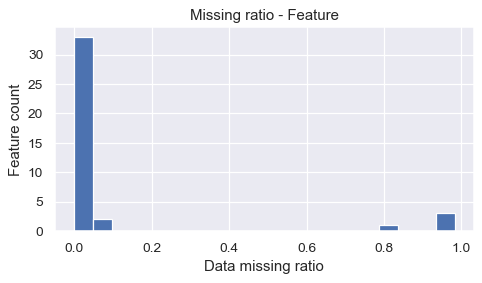

In [83]:
plt.figure(figsize=(6,3), dpi=90)
missing_values.plot.hist(bins=20)
plt.title('Missing ratio - Feature')
plt.xlabel('Data missing ratio')
plt.ylabel('Feature count')

In [84]:
missing_values = df1.isnull().sum().sort_values(ascending = False)/len(df1)
drop_list_mv = sorted(list(missing_values[missing_values > 0.2].index))
print(drop_list_mv)
df1.drop(columns = drop_list_mv, axis = 1, inplace = True)

['annual_inc_joint', 'dti_joint', 'mths_since_last_delinq', 'mths_since_last_major_derog', 'mths_since_last_record', 'verification_status_joint']


In [85]:
missing_values = df2.isnull().sum().sort_values(ascending = False)/len(df2)
drop_list_mv = sorted(list(missing_values[missing_values > 0.2].index))
print(drop_list_mv)
df2.drop(columns = drop_list_mv, axis = 1, inplace = True)

['annual_inc_joint', 'dti_joint', 'mths_since_last_record', 'verification_status_joint']


In [86]:
print(df1.shape)
print(df2.shape)

(1303607, 51)
(1303607, 35)


There are only 8 columns which still have missing values, we will determine to either drop nan or replace with something else along the line.

Creating a function to illustrate all features with loan status 

In [87]:
def plot_var(col, feature_name, continuous):
    f, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12,3), dpi=90)
    
    # Plot without loan status
    if continuous:
        sns.distplot(df2.loc[df[col].notnull(), col], kde=False, ax=ax1)
    else:
        sns.countplot(df2[col], order=sorted(df2[col].unique()), color='#5975A4', saturation=1, ax=ax1)
    ax1.set_xlabel(feature_name)
    ax1.set_ylabel('Count')
    ax1.set_title(feature_name)

    # Plot with loan status
    if continuous:
        sns.boxplot(x=col, y='loan_status', data=df2, ax=ax2)
        ax2.set_ylabel('')
        ax2.set_title(feature_name + ' by Loan Status')
    else:
        charge_off_rates = df2.groupby(col)['loan_status'].value_counts(normalize=True).loc[:,'Charged Off']
        sns.barplot(x=charge_off_rates.index, y=charge_off_rates.values, color='#5975A4', saturation=1, ax=ax2)
        ax2.set_ylabel('Fraction of Loans Charged-off')
        ax2.set_title('Charge-off Rate by ' + feature_name)
    ax2.set_xlabel(feature_name)
    
    plt.tight_layout()

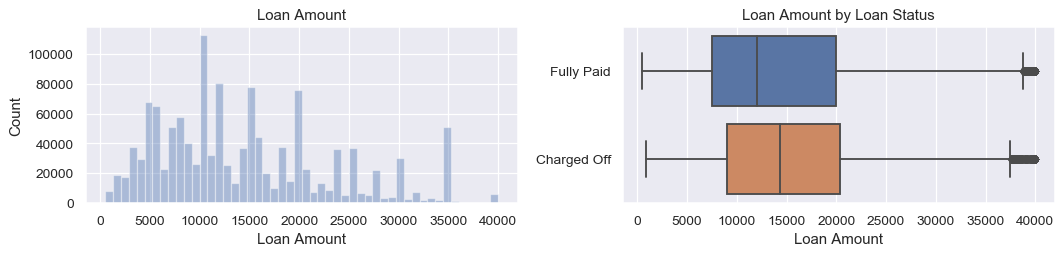

In [88]:
# Loan Amount
plot_var('loan_amnt', 'Loan Amount', continuous=True)


In [89]:
# Loan Status
df2.groupby('loan_status')['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,261655.0,15548.979381,8797.539356,900.0,9000.0,14350.0,20400.0,40000.0
Fully Paid,1041952.0,14132.493699,8651.520017,500.0,7500.0,12000.0,20000.0,40000.0


In [90]:
print(df2['term'].value_counts(dropna=False, normalize = True))
print(df2.groupby('term')['loan_status'].value_counts(normalize=True).loc[:,'Charged Off'])


 36 months    0.758476
 60 months    0.241524
Name: term, dtype: float64
term
 36 months    0.160959
 60 months    0.325568
Name: loan_status, dtype: float64


Loans with five-year periods are more than twice as likely to charge-off as loans with three-year periods. (33% vs 16%)

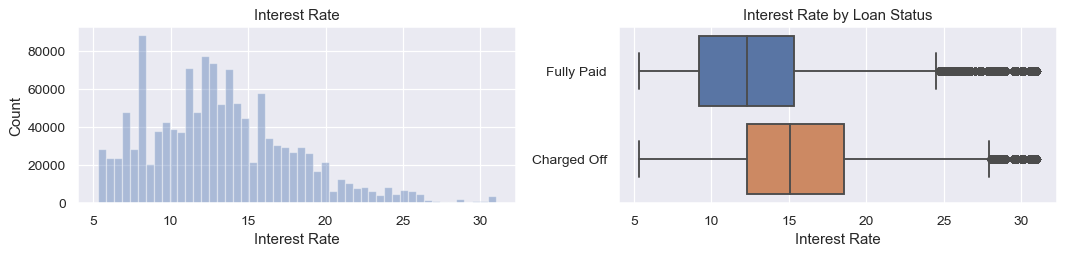

In [91]:
plot_var('int_rate', 'Interest Rate', continuous=True)


In [92]:
df2.groupby('loan_status')['int_rate'].describe()


,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,261655.0,15.712087,4.897685,5.31,12.29,15.05,18.55,30.99
Fully Paid,1041952.0,12.640755,4.520709,5.31,9.17,12.29,15.31,30.99


In [93]:
# It was here before we tweak the columns
# plot_var('installment', 'Installment', continuous=True)
# As expected, loans with higher installement are likely to be charged-off

In [94]:
# It was here previously
# df2.groupby('loan_status')['installment'].describe()

In [95]:
# Grade
print(sorted(df2['grade'].unique()))

['A', 'B', 'C', 'D', 'E', 'F', 'G']


In [96]:
# Decided to use grade instead
# print(sorted(df2['sub_grade'].unique()))

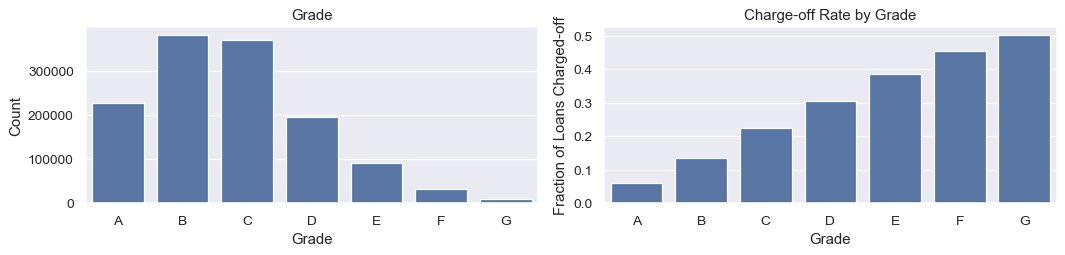

In [97]:
plot_var('grade', 'Grade', continuous=False)

As subgrade moves toward to the right (worse grades) loans are charge-off. 

In [98]:
# Emp_title - it was here before
# df2.drop(labels='emp_title', axis=1, inplace=True)

There are 371,435 unique titles, we will drop this column.


In [99]:
# Emp_length
df2['emp_length'].value_counts(dropna=False).sort_index()


0.0     104550
1.0      85677
2.0     117820
3.0     104200
4.0      78029
5.0      81623
6.0      60933
7.0      58145
8.0      59125
9.0      49504
10.0    428547
NaN      75454
Name: emp_length, dtype: int64

In [100]:
# Transforming 10+ years to 10 years and less than 1 year to 0 years so it could show in order from smallest to largest on the bar graph.

df2['emp_length'].replace(to_replace='10+ years', value='10 years', inplace=True)
df2['emp_length'].replace('< 1 year', '0 years', inplace=True)

def emp_length_to_int(s):
    if pd.isnull(s):
        return s
    else:
        return np.int8(s.split()[0])

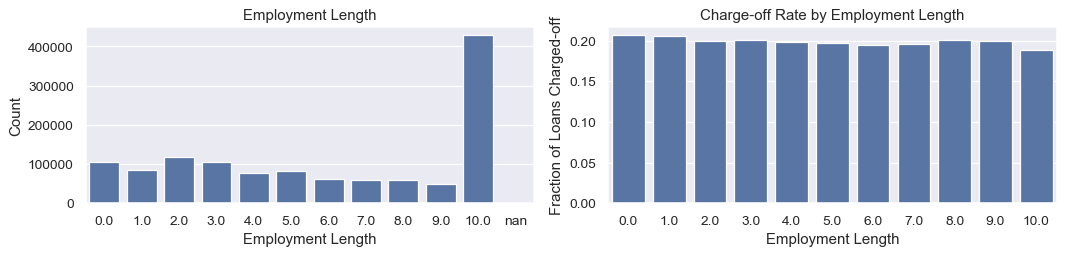

In [101]:
plot_var('emp_length', 'Employment Length', continuous=False)


In [102]:
# Home ownership
df2['home_ownership'].value_counts(dropna=False)

MORTGAGE    645496
RENT        517808
OWN         139844
ANY            267
OTHER          144
NONE            48
Name: home_ownership, dtype: int64

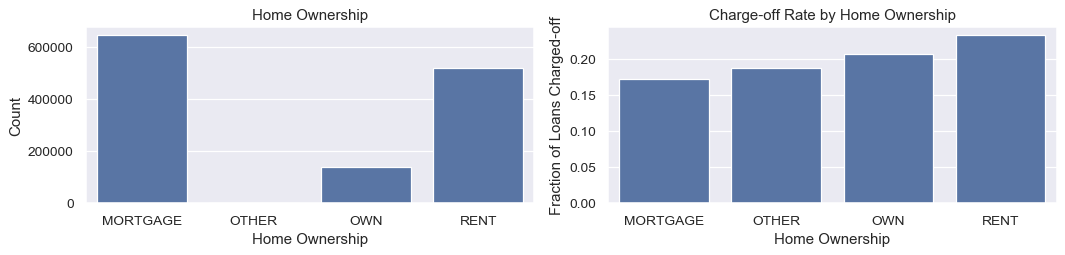

In [103]:
df2['home_ownership'].replace(['NONE', 'ANY'], 'OTHER', inplace=True)
plot_var('home_ownership', 'Home Ownership', continuous=False)

People who are renting, have the highest probability 
of their loans to be charged-off.

In [104]:
df2.columns.values.tolist()

['loan_amnt',
 'issue_d',
 'loan_status',
 'verification_status',
 'grade',
 'home_ownership',
 'emp_length',
 'addr_state',
 'annual_inc',
 'log_annual_inc',
 'dti',
 'ageOfCredit',
 'open_acc',
 'total_acc',
 'revol_bal',
 'revol_util',
 'acc_now_delinq',
 'delinq_amnt',
 'delinq_2yrs',
 'pub_rec',
 'collections_12_mths_ex_med',
 'int_rate',
 'inq_last_6mths',
 'tot_coll_amt',
 'purpose',
 'term',
 'initial_list_status',
 'application_type',
 'NAR',
 'log_revol_bal',
 'Diff',
 'prevQuarterDiff',
 'UR',
 'URDiff',
 'URprevMonthDiff']

count    1.303607e+06
mean     7.615899e+04
std      7.004890e+04
min      0.000000e+00
25%      4.584000e+04
50%      6.500000e+04
75%      9.000000e+04
max      1.099920e+07
Name: annual_inc, dtype: float64
count    1.303607e+06
mean     4.812791e+00
std      2.453588e-01
min      0.000000e+00
25%      4.661254e+00
50%      4.812920e+00
75%      4.954247e+00
max      7.041361e+00
Name: log_annual_inc, dtype: float64
                 count      mean       std  min       25%       50%       75%  \
loan_status                                                                     
Charged Off   261655.0  4.781632  0.240262  0.0  4.633479  4.778158  4.929424   
Fully Paid   1041952.0  4.820615  0.246003  0.0  4.672107  4.812920  4.968488   

                  max  
loan_status            
Charged Off  6.977724  
Fully Paid   7.041361  


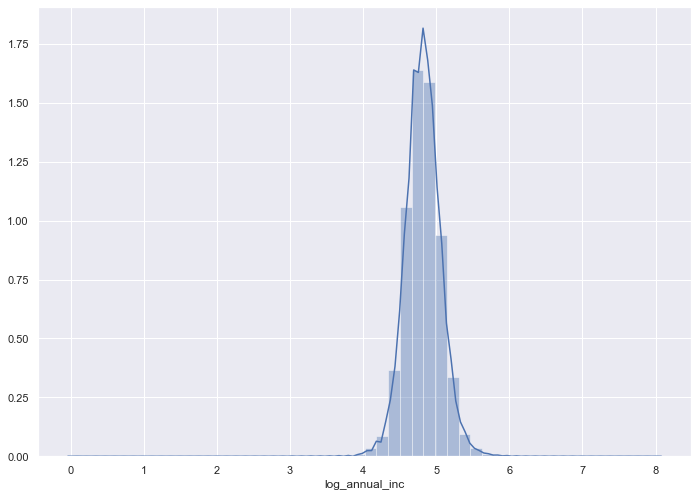

In [105]:
# Annual Income
print(df2['annual_inc'].describe())

# Income ranges from \$0 to \$10,999,200. The gap is too big, it is better to use log transform here.

print(df2['log_annual_inc'].describe())

sns.distplot(df['log_annual_inc'], norm_hist = False, kde = True)

print(df2.groupby('loan_status')['log_annual_inc'].describe())


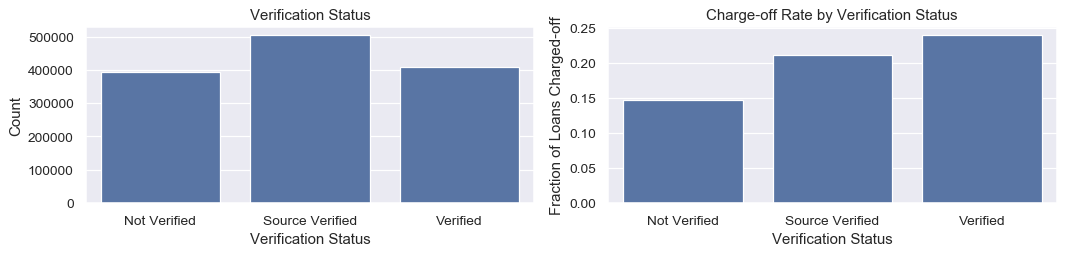

In [106]:
# Verification status
plot_var('verification_status', 'Verification Status', continuous=False)

In [107]:
# Purpose
df2.groupby('purpose')['loan_status'].value_counts(normalize=True).loc[:,'Charged Off'].sort_values()

purpose
wedding               0.121622
car                   0.146388
credit_card           0.170267
educational           0.171779
home_improvement      0.178531
major_purchase        0.187235
vacation              0.192396
other                 0.211706
debt_consolidation    0.212567
house                 0.217167
medical               0.219064
moving                0.234409
renewable_energy      0.237102
small_business        0.297468
Name: loan_status, dtype: float64

In [108]:
# Title - used to be there
#print(df2['title'].describe())
#print(df2['title'].value_counts().head(10))

#df2.drop('title', axis=1, inplace=True)


In [109]:
# Zip Code and Address State
#print(df2['zip_code'].sample(5))
#print("\n")
#print(df2['zip_code'].nunique())
#print("\n")
print(df2['addr_state'].sample(5))
print("\n")
print(df2.groupby('addr_state')['loan_status'].value_counts(normalize=True).loc[:,'Charged Off'].sort_values())

907309     OH
210583     TX
1243667    TX
1646101    WI
559771     SC
Name: addr_state, dtype: object


addr_state
DC    0.131157
ME    0.139063
VT    0.141071
IA    0.142857
OR    0.144003
NH    0.145923
CO    0.155936
WV    0.158483
WA    0.158880
SC    0.164761
KS    0.167646
WY    0.169665
MT    0.169776
UT    0.171794
CT    0.174894
RI    0.180077
IL    0.182302
WI    0.183171
GA    0.184221
MA    0.191122
ID    0.193320
AZ    0.196778
CA    0.197103
TX    0.199123
AK    0.199225
MN    0.199389
VA    0.200233
DE    0.202128
HI    0.202954
MI    0.203645
OH    0.208078
ND    0.208471
PA    0.208808
NC    0.209422
KY    0.210886
NJ    0.212716
MD    0.213421
SD    0.213513
MO    0.214171
NM    0.215423
FL    0.215615
TN    0.215956
IN    0.216053
NV    0.220537
NY    0.221452
LA    0.234072
OK    0.237126
AL    0.237336
AR    0.241656
NE    0.254237
MS    0.262033
Name: loan_status, dtype: float64


MS (Mississippi) has the highest charged-off loans. We will try to connect this with our unemployment dataset. 

Text(0.5, 1.0, 'Debt-to-income Ratio')

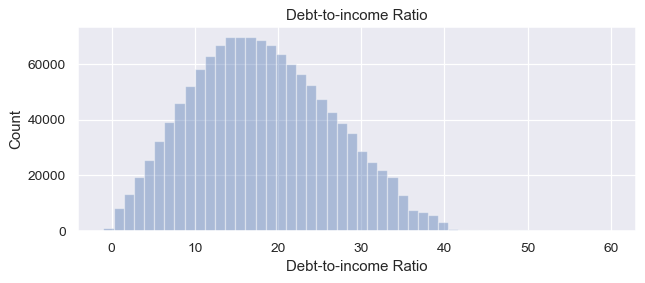

In [110]:
# Debt-to-Income
plt.figure(figsize=(8,3), dpi=90)
sns.distplot(df2.loc[df2['dti'].notnull() & (df2['dti']<60), 'dti'], kde=False)
plt.xlabel('Debt-to-income Ratio')
plt.ylabel('Count')
plt.title('Debt-to-income Ratio')

Set dti < 60 to show the graph, if not it couldn't be shown due to its outliers.

There are 1,540 records with a dti > 60

In [111]:
(df2['dti']>=60).sum()

1540

In [112]:
df2.groupby('loan_status')['dti'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,261593.0,20.161590,11.292371,0.0,13.58,19.77,26.31,999.0
Fully Paid,1041702.0,17.780909,10.795249,-1.0,11.42,17.09,23.41,999.0


Higher debt to income leads to charged-off loans.

In [113]:
# Dropped - Earliest Credit Line
#print(df2['earliest_cr_line_year'].sample(5))
#print("\n")
#plot_var('earliest_cr_line_year', 'Year of Earliest Credit Line', continuous=True)

Text(0.5, 1.0, 'Number of Open Credit Lines')

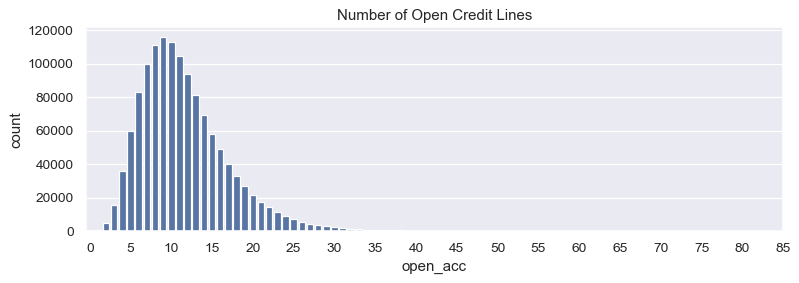

In [114]:
# Open Account
plt.figure(figsize=(10,3), dpi=90)
sns.countplot(df2['open_acc'], order=sorted(df2['open_acc'].unique()), color='#5975A4', saturation=1)
_, _ = plt.xticks(np.arange(0, 90, 5), np.arange(0, 90, 5))
plt.title('Number of Open Credit Lines')

In [115]:
# Loan Status
df2.groupby('loan_status')['open_acc'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,261655.0,11.906472,5.630599,0.0,8.0,11.0,15.0,76.0
Fully Paid,1041952.0,11.513452,5.420120,0.0,8.0,11.0,14.0,90.0


In [116]:
# Public Records
df2['pub_rec'].value_counts().sort_index()

0.0     1082511
1.0      185104
2.0       23744
3.0        7166
4.0        2533
5.0        1224
6.0         616
7.0         274
8.0         155
9.0          80
10.0         56
11.0         37
12.0         27
13.0         18
14.0          5
15.0          9
16.0          5
17.0          3
18.0          6
19.0          5
20.0          3
21.0          6
22.0          2
23.0          1
24.0          2
25.0          1
28.0          3
34.0          1
37.0          1
40.0          1
46.0          1
47.0          1
49.0          2
54.0          1
61.0          1
63.0          1
86.0          1
Name: pub_rec, dtype: int64

In [117]:
# Loan Status and Public Records
df2.groupby('loan_status')['pub_rec'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,261655.0,0.247203,0.658632,0.0,0.0,0.0,0.0,86.0
Fully Paid,1041952.0,0.207566,0.587759,0.0,0.0,0.0,0.0,63.0


In [118]:
# Revolving Balance
df2['revol_bal'].describe()

count    1.303607e+06
mean     1.623599e+04
std      2.228629e+04
min      0.000000e+00
25%      5.952000e+03
50%      1.114000e+04
75%      1.974800e+04
max      2.904836e+06
Name: revol_bal, dtype: float64

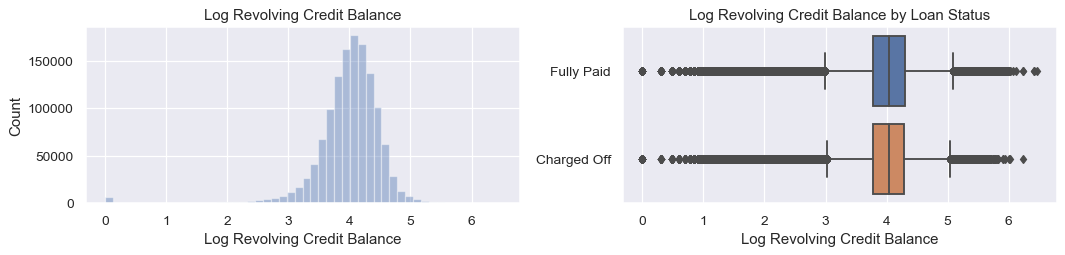

In [119]:
plot_var('log_revol_bal', 'Log Revolving Credit Balance', continuous=True)

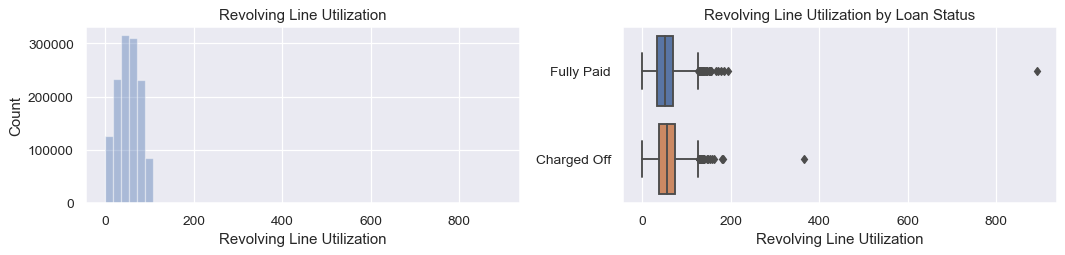

In [120]:
# Revolving Utility
plot_var('revol_util', 'Revolving Line Utilization', continuous=True)

Text(0.5, 1.0, 'Total Number of Credit Lines')

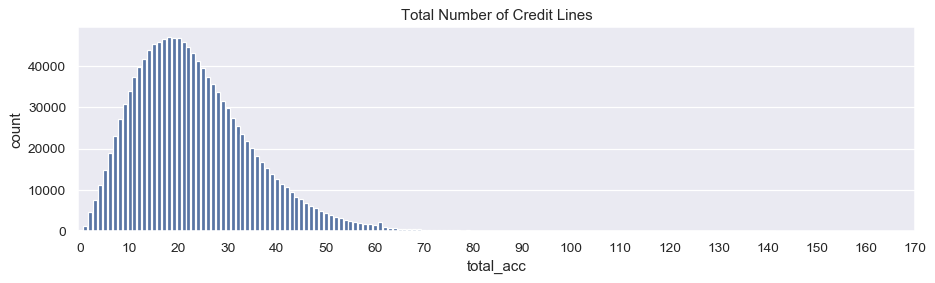

In [121]:
# Total Account
plt.figure(figsize=(12,3), dpi=90)
sns.countplot(df2['total_acc'], order=sorted(df2['total_acc'].unique()), color='#5975A4', saturation=1)
_, _ = plt.xticks(np.arange(0, 176, 10), np.arange(0, 176, 10))
plt.title('Total Number of Credit Lines')

In [122]:
df2.groupby('loan_status')['total_acc'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,261655.0,24.747675,12.114216,2.0,16.0,23.0,32.0,176.0
Fully Paid,1041952.0,25.087058,11.964972,2.0,16.0,23.0,32.0,162.0


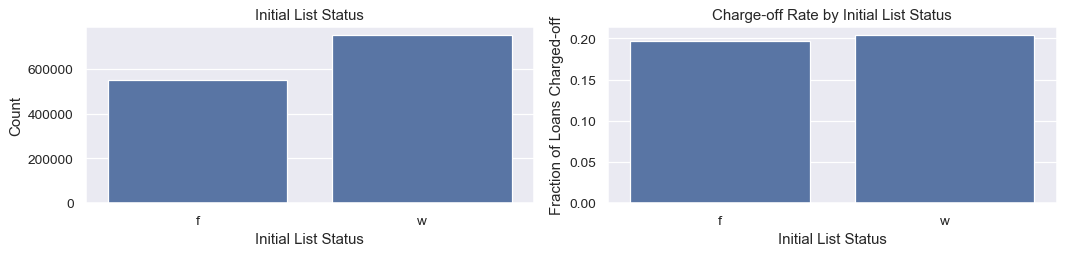

In [123]:
# Initial_list_status
plot_var('initial_list_status', 'Initial List Status', continuous=False)

In [124]:
# application_type
print(df['application_type'].value_counts(), "\n", df2.groupby('application_type')['loan_status'].value_counts(normalize=True).loc[:,'Charged Off'])

Individual    2139958
Joint App      120710
Name: application_type, dtype: int64 
 application_type
Individual    0.199884
Joint App     0.246546
Name: loan_status, dtype: float64


Joint loans are likely to be charged-off. Why? Shouldn't joint application have more than one income and be more secured? 

In [125]:
# Mortgage Account - not shown to the investors
# df2['mort_acc'].describe()

In [126]:
# df2.groupby('loan_status')['mort_acc'].describe()


mortgage accounts are between 0 and 51. Should we consider 51 as an outlier? or someone actually has 51 mortgage accounts? 

Most applicants don't have mortgage accounts

Full paid loans usually belong to people who have multiple mortgage accounts. 

In [127]:
# Public record bankruptcies - not available to investors
# df2['pub_rec_bankruptcies'].value_counts().sort_index()

In [128]:
# plot_var('pub_rec_bankruptcies', 'Public Record Bankruptcies', continuous=False)

### Missing Value Treatment

Still have 7 columns with missing values. Will be discussing on how to fill nan or drop them. 

In [129]:
df1.shape

(1303607, 51)

In [130]:
df2.shape

(1303607, 35)

In [131]:
df1.isnull().sum()

loan_amnt                         0
issue_d                           0
loan_status                       0
funded_amnt                       0
funded_amnt_inv                   0
verification_status               0
installment                       0
grade                             0
sub_grade                         0
home_ownership                    0
emp_length                    75454
emp_title                     82579
addr_state                        0
zip_code                          1
annual_inc                        0
dti                             312
ageOfCredit                       0
earliest_cr_line                  0
earliest_cr_line_year             0
open_acc                          0
total_acc                         0
revol_bal                         0
revol_util                      810
inq_last_6mths                    1
acc_now_delinq                    0
delinq_amnt                       0
delinq_2yrs                       0
pub_rec                     

In [132]:
df2.isnull().sum()

loan_amnt                         0
issue_d                           0
loan_status                       0
verification_status               0
grade                             0
home_ownership                    0
emp_length                    75454
addr_state                        0
annual_inc                        0
log_annual_inc                    0
dti                             312
ageOfCredit                       0
open_acc                          0
total_acc                         0
revol_bal                         0
revol_util                      810
acc_now_delinq                    0
delinq_amnt                       0
delinq_2yrs                       0
pub_rec                           0
collections_12_mths_ex_med       56
int_rate                          0
inq_last_6mths                    1
tot_coll_amt                  67527
purpose                           0
term                              0
initial_list_status               0
application_type            

We wanted to use replace na, but we don't think that it's right to distort what's actually happening. We are dropping nan instead

In [133]:
# Remove zip_code.
#df2 = df2.drop('zip_code', 1)

In [134]:
# Replace na in emp_length and rec_bankruptcies and dti and NAR with mean.
#df2['emp_length'].fillna(df2['emp_length'].mean(), inplace=True)
#df2['pub_rec_bankruptcies'].fillna(df2['pub_rec_bankruptcies'].mean(), inplace=True)
#df2['dti'].fillna((df2['dti'].mean()),inplace = True)
#df2['NAR'].fillna((df2['NAR'].mean()),inplace = True)

In [135]:
# Replace na in mort_acc and revol_util with median.
#df2['mort_acc'].fillna(df2['mort_acc'].median(), inplace=True)
#df2['revol_util'].fillna(df2['revol_util'].median(), inplace=True)

In [136]:
#df2.isnull().sum()

In [137]:
df1['UR'] = pd.to_numeric(df1['UR'])
df2['UR'] = pd.to_numeric(df2['UR'])
df1 = df1.dropna()
df2 = df2.dropna()

In [138]:
df1.head(5)

,loan_amnt,issue_d,loan_status,funded_amnt,funded_amnt_inv,verification_status,installment,grade,sub_grade,home_ownership,...,Diff,pqissue_q,prevQuarterDiff,Month,Year,UR,YearMonth,YearQuarter,URDiff,URprevMonthDiff
100,30000,2018-12-01,Fully Paid,30000,30000.0,Source Verified,1151.16,D,D5,MORTGAGE,...,0.007315,2018Q3,0.004539,12,2018,4.3,2018-12,2018Q4,0.023810,0.000000
152,40000,2018-12-01,Fully Paid,40000,40000.0,Verified,975.71,C,C4,MORTGAGE,...,-0.001290,2018Q3,0.009692,12,2018,4.3,2018-12,2018Q4,-0.022727,0.000000
170,20000,2018-12-01,Fully Paid,20000,20000.0,Not Verified,622.68,A,A3,MORTGAGE,...,0.003031,2018Q3,0.014669,12,2018,4.5,2018-12,2018Q4,0.000000,0.022727
186,4500,2018-12-01,Fully Paid,4500,4500.0,Not Verified,147.99,B,B3,RENT,...,0.009664,2018Q3,0.009767,12,2018,3.7,2018-12,2018Q4,0.000000,0.000000
215,8425,2018-12-01,Fully Paid,8425,8425.0,Verified,345.18,E,E5,MORTGAGE,...,0.002913,2018Q3,0.004956,12,2018,3.1,2018-12,2018Q4,-0.031250,0.000000


In [139]:
df2.head(5)

,loan_amnt,issue_d,loan_status,verification_status,grade,home_ownership,emp_length,addr_state,annual_inc,log_annual_inc,...,term,initial_list_status,application_type,NAR,log_revol_bal,Diff,prevQuarterDiff,UR,URDiff,URprevMonthDiff
100,30000,2018-12-01,Fully Paid,Source Verified,D,MORTGAGE,5.0,CA,100000.0,5.000004,...,36 months,w,Joint App,0.000264,4.193236,0.007315,0.004539,4.3,0.023810,0.000000
152,40000,2018-12-01,Fully Paid,Verified,C,MORTGAGE,0.0,OH,45000.0,4.653222,...,60 months,w,Joint App,0.006994,4.543720,-0.001290,0.009692,4.3,-0.022727,0.000000
170,20000,2018-12-01,Fully Paid,Not Verified,A,MORTGAGE,10.0,WA,100000.0,5.000004,...,36 months,w,Joint App,0.003542,4.405124,0.003031,0.014669,4.5,0.000000,0.022727
186,4500,2018-12-01,Fully Paid,Not Verified,B,RENT,10.0,TX,38500.0,4.585472,...,36 months,w,Individual,0.003590,3.650599,0.009664,0.009767,3.7,0.000000,0.000000
215,8425,2018-12-01,Fully Paid,Verified,E,MORTGAGE,3.0,MA,450000.0,5.653213,...,36 months,w,Joint App,0.011932,4.566001,0.002913,0.004956,3.1,-0.031250,0.000000


In [140]:
df1.shape

(1154570, 51)

In [141]:
df2.shape

(1160023, 35)

Export the non null values file as csv to save up time for future processes

In [142]:
df1.columns.values.tolist()

['loan_amnt',
 'issue_d',
 'loan_status',
 'funded_amnt',
 'funded_amnt_inv',
 'verification_status',
 'installment',
 'grade',
 'sub_grade',
 'home_ownership',
 'emp_length',
 'emp_title',
 'addr_state',
 'zip_code',
 'annual_inc',
 'dti',
 'ageOfCredit',
 'earliest_cr_line',
 'earliest_cr_line_year',
 'open_acc',
 'total_acc',
 'revol_bal',
 'revol_util',
 'inq_last_6mths',
 'acc_now_delinq',
 'delinq_amnt',
 'delinq_2yrs',
 'pub_rec',
 'collections_12_mths_ex_med',
 'int_rate',
 'tot_coll_amt',
 'purpose',
 'term',
 'initial_list_status',
 'application_type',
 'length_as',
 'NAR',
 'pqissue_d',
 'issue_q',
 'log_annual_inc',
 'log_revol_bal',
 'Diff',
 'pqissue_q',
 'prevQuarterDiff',
 'Month',
 'Year',
 'UR',
 'YearMonth',
 'YearQuarter',
 'URDiff',
 'URprevMonthDiff']

In [143]:
df1['UR'] = pd.to_numeric(df1['UR'])
df1_with_dummies = df1.copy()

In [144]:
df1_with_dummies['charged_off'] = (df1_with_dummies['loan_status'] == 'Charged Off').apply(np.uint8)

In [145]:
df1_with_dummies = df1_with_dummies.drop(columns = ['zip_code', 'length_as', 'emp_title'])
df1_with_dummies

,loan_amnt,issue_d,loan_status,funded_amnt,funded_amnt_inv,verification_status,installment,grade,sub_grade,home_ownership,...,pqissue_q,prevQuarterDiff,Month,Year,UR,YearMonth,YearQuarter,URDiff,URprevMonthDiff,charged_off
100,30000,2018-12-01,Fully Paid,30000,30000.0,Source Verified,1151.16,D,D5,MORTGAGE,...,2018Q3,0.004539,12,2018,4.3,2018-12,2018Q4,0.023810,0.000000,0
152,40000,2018-12-01,Fully Paid,40000,40000.0,Verified,975.71,C,C4,MORTGAGE,...,2018Q3,0.009692,12,2018,4.3,2018-12,2018Q4,-0.022727,0.000000,0
170,20000,2018-12-01,Fully Paid,20000,20000.0,Not Verified,622.68,A,A3,MORTGAGE,...,2018Q3,0.014669,12,2018,4.5,2018-12,2018Q4,0.000000,0.022727,0
186,4500,2018-12-01,Fully Paid,4500,4500.0,Not Verified,147.99,B,B3,RENT,...,2018Q3,0.009767,12,2018,3.7,2018-12,2018Q4,0.000000,0.000000,0
215,8425,2018-12-01,Fully Paid,8425,8425.0,Verified,345.18,E,E5,MORTGAGE,...,2018Q3,0.004956,12,2018,3.1,2018-12,2018Q4,-0.031250,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2260654,30000,2017-10-01,Charged Off,30000,30000.0,Not Verified,747.03,D,D1,RENT,...,2017Q3,0.005690,10,2017,4.7,2017-10,2017Q4,0.000000,-0.020833,1
2260655,18000,2017-10-01,Charged Off,18000,18000.0,Verified,589.57,F,F4,MORTGAGE,...,2017Q3,0.010383,10,2017,4.1,2017-10,2017Q4,0.000000,0.000000,1
2260656,17950,2017-10-01,Fully Paid,17950,17950.0,Source Verified,582.62,F,F3,MORTGAGE,...,2017Q3,0.008233,10,2017,4.8,2017-10,2017Q4,-0.020408,0.000000,0
2260658,15000,2017-10-01,Fully Paid,15000,15000.0,Verified,364.94,C,C5,RENT,...,2017Q3,0.005690,10,2017,4.7,2017-10,2017Q4,0.000000,-0.020833,0


In [146]:
df1_with_dummies['grade'] = pd.factorize(df1_with_dummies['grade'])[0] + 1
df1_with_dummies['sub_grade'] = pd.factorize(df1_with_dummies['sub_grade'])[0] + 1
df1_with_dummies['loan_status'] = pd.factorize(df1_with_dummies['loan_status'])[0] + 1

In [147]:
df1_with_dummies = pd.get_dummies(df1_with_dummies,columns=['verification_status', 'home_ownership', 'addr_state', 
                                                            'purpose', 'term', 'initial_list_status',
                                                            'application_type', 'Month'], 
               drop_first = True,
               dummy_na = True)

In [148]:
df1_with_dummies.to_csv('df1_with_dummies.csv')

In [149]:
df1_with_dummies

,loan_amnt,issue_d,loan_status,funded_amnt,funded_amnt_inv,installment,grade,sub_grade,emp_length,annual_inc,...,Month_4.0,Month_5.0,Month_6.0,Month_7.0,Month_8.0,Month_9.0,Month_10.0,Month_11.0,Month_12.0,Month_nan
100,30000,2018-12-01,1,30000,30000.0,1151.16,1,1,5.0,100000.0,...,0,0,0,0,0,0,0,0,1,0
152,40000,2018-12-01,1,40000,40000.0,975.71,2,2,0.0,45000.0,...,0,0,0,0,0,0,0,0,1,0
170,20000,2018-12-01,1,20000,20000.0,622.68,3,3,10.0,100000.0,...,0,0,0,0,0,0,0,0,1,0
186,4500,2018-12-01,1,4500,4500.0,147.99,4,4,10.0,38500.0,...,0,0,0,0,0,0,0,0,1,0
215,8425,2018-12-01,1,8425,8425.0,345.18,5,5,3.0,450000.0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2260654,30000,2017-10-01,2,30000,30000.0,747.03,1,6,2.0,80000.0,...,0,0,0,0,0,0,1,0,0,0
2260655,18000,2017-10-01,2,18000,18000.0,589.57,7,30,10.0,77000.0,...,0,0,0,0,0,0,1,0,0,0
2260656,17950,2017-10-01,1,17950,17950.0,582.62,7,31,10.0,53758.0,...,0,0,0,0,0,0,1,0,0,0
2260658,15000,2017-10-01,1,15000,15000.0,364.94,2,19,0.0,85000.0,...,0,0,0,0,0,0,1,0,0,0


In [150]:
# download our completed non-null-values file
#from google.colab import files
df2.to_csv('df2.csv') 
#files.download('non_na_loan.csv')

### Converting into the right-kind of dummy variables for categorical data



## V. Multivariate Data Exploration: Nominal Variable Correlation Analysis

### 1.) Cramer's V

In [151]:
df2.columns.values.tolist()

['loan_amnt',
 'issue_d',
 'loan_status',
 'verification_status',
 'grade',
 'home_ownership',
 'emp_length',
 'addr_state',
 'annual_inc',
 'log_annual_inc',
 'dti',
 'ageOfCredit',
 'open_acc',
 'total_acc',
 'revol_bal',
 'revol_util',
 'acc_now_delinq',
 'delinq_amnt',
 'delinq_2yrs',
 'pub_rec',
 'collections_12_mths_ex_med',
 'int_rate',
 'inq_last_6mths',
 'tot_coll_amt',
 'purpose',
 'term',
 'initial_list_status',
 'application_type',
 'NAR',
 'log_revol_bal',
 'Diff',
 'prevQuarterDiff',
 'UR',
 'URDiff',
 'URprevMonthDiff']

In [152]:
df2.dtypes

loan_amnt                       int64
issue_d                        object
loan_status                    object
verification_status            object
grade                          object
home_ownership                 object
emp_length                    float64
addr_state                     object
annual_inc                    float64
log_annual_inc                float64
dti                           float64
ageOfCredit                   float64
open_acc                      float64
total_acc                     float64
revol_bal                       int64
revol_util                    float64
acc_now_delinq                float64
delinq_amnt                   float64
delinq_2yrs                   float64
pub_rec                       float64
collections_12_mths_ex_med    float64
int_rate                      float64
inq_last_6mths                float64
tot_coll_amt                  float64
purpose                        object
term                           object
initial_list

In [153]:
# filter categorical variables
df2_cat = df2.select_dtypes('object')
df2_cat.dtypes

issue_d                object
loan_status            object
verification_status    object
grade                  object
home_ownership         object
addr_state             object
purpose                object
term                   object
initial_list_status    object
application_type       object
dtype: object

In [154]:
from scipy.stats import chi2_contingency

# Cramer's V function
def cramer_v(x, y):
    n = len(x)
    ct = pd.crosstab(x, y) # crosstab
    chi2 = chi2_contingency(ct)[0]
    v = np.sqrt(chi2 / (n * (np.min(ct.shape) - 1)))
    return v

cramer_v(df2['loan_status'], df2['loan_status'])

0.9999972823766431

In [155]:
print("Cramer's V")
print(" ")
for col1 in df2_cat:
  for col2 in df2_cat:
    if col1 != col2 and abs(cramer_v(df2[col1], df2[col2])) >= 0.25:
      print("Variable1:",col1, "\n", "Variable2:", col2, "\n", "Cramer's V:", cramer_v(df2[col1], df2[col2]), "\n")


Cramer's V
 
Variable1: issue_d 
 Variable2: initial_list_status 
 Cramer's V: 0.38526668366298633 

Variable1: loan_status 
 Variable2: grade 
 Cramer's V: 0.2658502493930977 

Variable1: grade 
 Variable2: loan_status 
 Cramer's V: 0.2658502493930977 

Variable1: grade 
 Variable2: term 
 Cramer's V: 0.43703951655134265 

Variable1: term 
 Variable2: grade 
 Cramer's V: 0.4370395165513426 

Variable1: initial_list_status 
 Variable2: issue_d 
 Cramer's V: 0.3852666836629863 



### 2.) Chi-Square Analysis

In [156]:
# Identify list of categorical columns 
df2_cat

,issue_d,loan_status,verification_status,grade,home_ownership,addr_state,purpose,term,initial_list_status,application_type
100,2018-12-01,Fully Paid,Source Verified,D,MORTGAGE,CA,debt_consolidation,36 months,w,Joint App
152,2018-12-01,Fully Paid,Verified,C,MORTGAGE,OH,credit_card,60 months,w,Joint App
170,2018-12-01,Fully Paid,Not Verified,A,MORTGAGE,WA,credit_card,36 months,w,Joint App
186,2018-12-01,Fully Paid,Not Verified,B,RENT,TX,credit_card,36 months,w,Individual
215,2018-12-01,Fully Paid,Verified,E,MORTGAGE,MA,credit_card,36 months,w,Joint App
...,...,...,...,...,...,...,...,...,...,...
2260654,2017-10-01,Charged Off,Not Verified,D,RENT,NY,debt_consolidation,60 months,f,Individual
2260655,2017-10-01,Charged Off,Verified,F,MORTGAGE,TX,debt_consolidation,60 months,w,Individual
2260656,2017-10-01,Fully Paid,Source Verified,F,MORTGAGE,IL,debt_consolidation,60 months,f,Individual
2260658,2017-10-01,Fully Paid,Verified,C,RENT,NY,debt_consolidation,60 months,w,Individual


chi-sqr stat:  9740.063293116806 p-value: 0.0


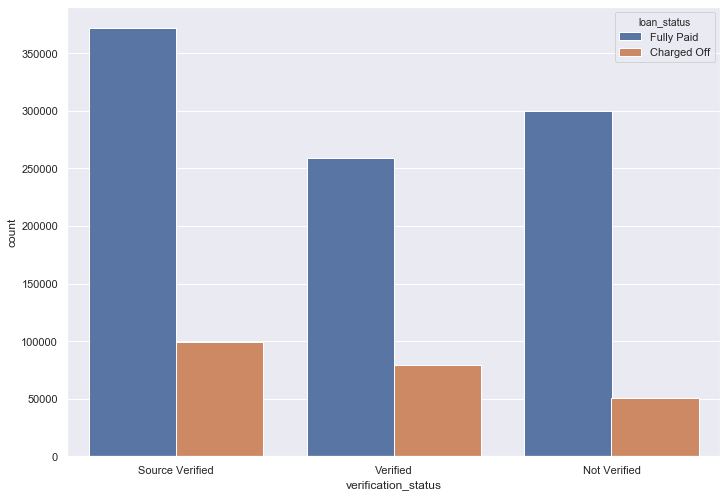

In [157]:
# "verification_status"
table = pd.crosstab(df2_cat["loan_status"], df2_cat["verification_status"])

chi2, p, dof, expected = chi2_contingency(table.values)
print("chi-sqr stat: ",chi2,"p-value:" ,p)
sns.countplot(x="verification_status", hue="loan_status", data=df2_cat)

chi-sqr stat:  81986.19747491914 p-value: 0.0


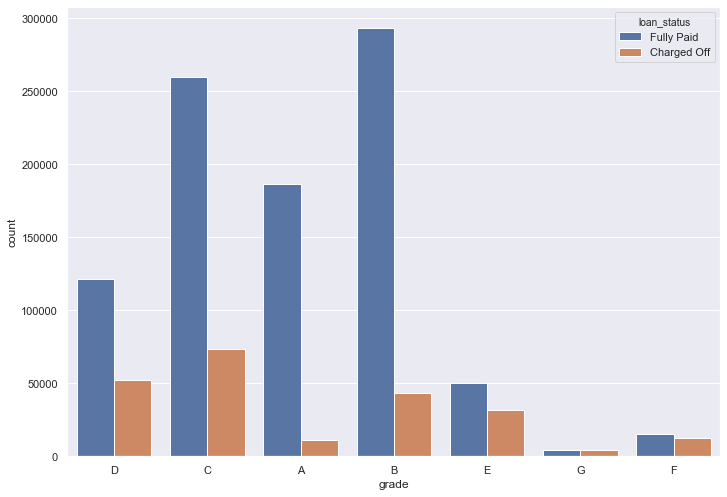

In [158]:
# "grade"
table = pd.crosstab(df2_cat["loan_status"], df2_cat["grade"])

chi2, p, dof, expected = chi2_contingency(table.values)
print("chi-sqr stat: ",chi2,"p-value:" ,p)
sns.countplot(x="grade", hue="loan_status", data=df2_cat)

chi-sqr stat:  6092.370027134464 p-value: 0.0


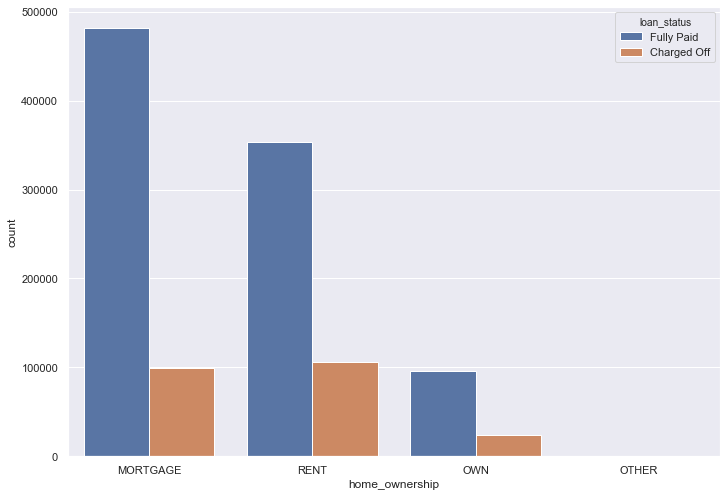

In [159]:
# "home_ownership"
table = pd.crosstab(df2_cat["loan_status"], df2_cat["home_ownership"])

from scipy.stats import chi2_contingency
chi2, p, dof, expected = chi2_contingency(table.values)
print("chi-sqr stat: ",chi2,"p-value:" ,p)
sns.countplot(x="home_ownership", hue="loan_status", data=df2_cat)

chi-sqr stat:  3101.9955226743828 p-value: 0.0


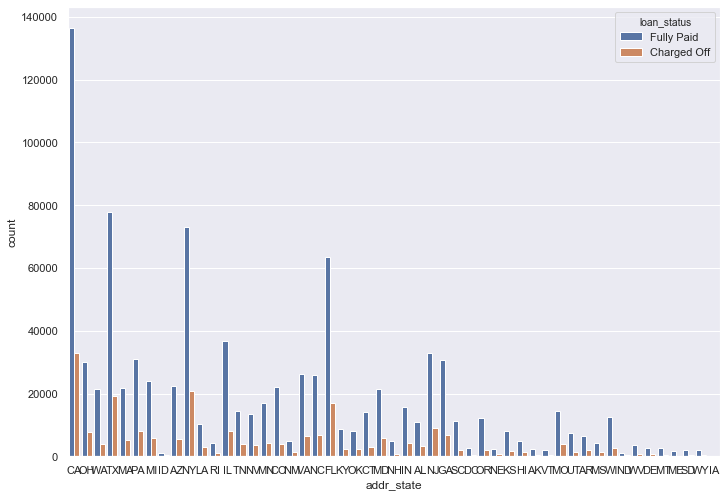

In [160]:
# "addr_state"
table = pd.crosstab(df2_cat["loan_status"], df2_cat["addr_state"])

chi2, p, dof, expected = chi2_contingency(table.values)
print("chi-sqr stat: ",chi2,"p-value:" ,p)
sns.countplot(x="addr_state", hue="loan_status", data=df2_cat)


chi-sqr stat:  3591.7737731497996 p-value: 0.0


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 <a list of 14 Text xticklabel objects>)

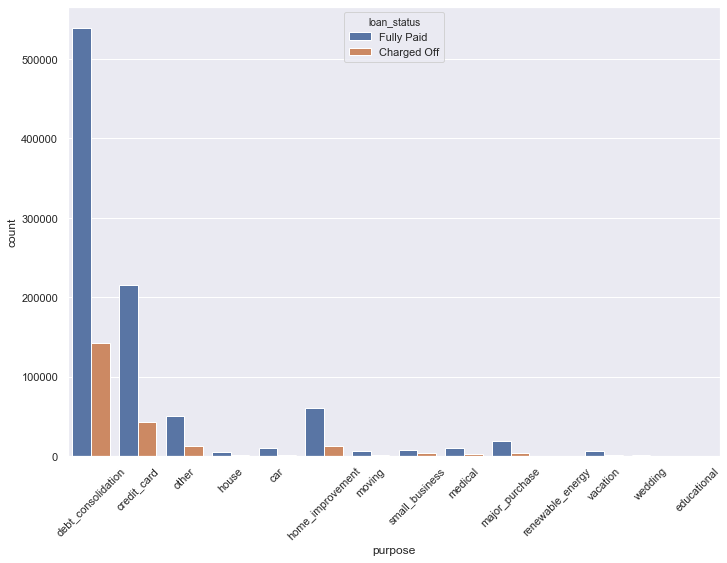

In [161]:
# "purpose"
table = pd.crosstab(df2_cat["loan_status"], df2_cat["purpose"])

from scipy.stats import chi2_contingency
chi2, p, dof, expected = chi2_contingency(table.values)
print("chi-sqr stat: ",chi2,"p-value:" ,p)
sns.countplot(x="purpose", hue="loan_status", data=df2_cat)
plt.xticks(rotation=45)

chi-sqr stat:  38804.75552452391 p-value: 0.0


(array([0, 1]), <a list of 2 Text xticklabel objects>)

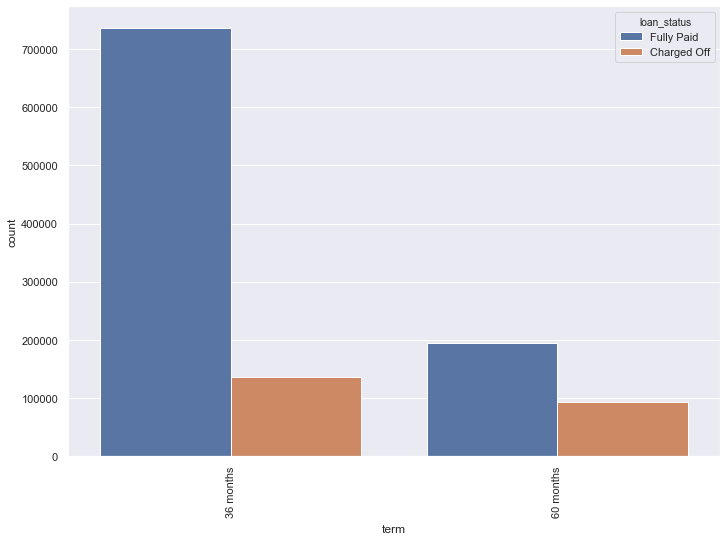

In [162]:
# "term"
table = pd.crosstab(df2_cat["loan_status"], df2_cat["term"])

from scipy.stats import chi2_contingency
chi2, p, dof, expected = chi2_contingency(table.values)
print("chi-sqr stat: ",chi2,"p-value:" ,p)
sns.countplot(x="term", hue="loan_status", data=df2_cat)
plt.xticks(rotation=90)

chi-sqr stat:  1.9127313552238971 p-value: 0.1666601707073469


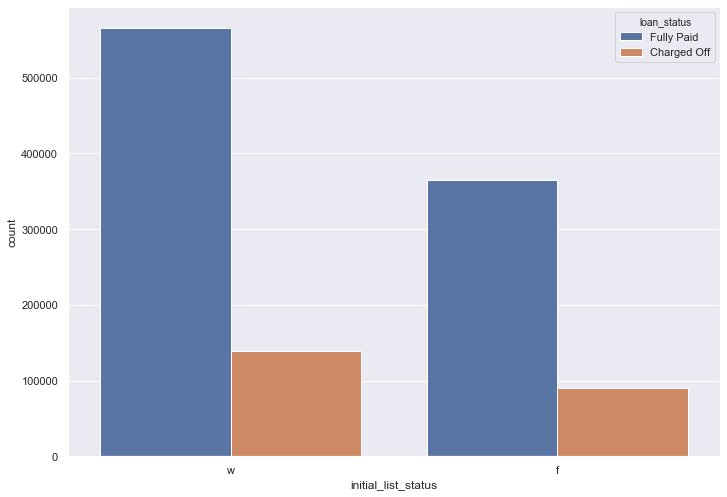

In [163]:
# "initial_list_status"
table = pd.crosstab(df2_cat["loan_status"], df2_cat["initial_list_status"])

from scipy.stats import chi2_contingency
chi2, p, dof, expected = chi2_contingency(table.values)
print("chi-sqr stat: ",chi2,"p-value:" ,p)
sns.countplot(x="initial_list_status", hue="loan_status", data=df2_cat)

chi-sqr stat:  133.77042541755202 p-value: 6.133285622455227e-31


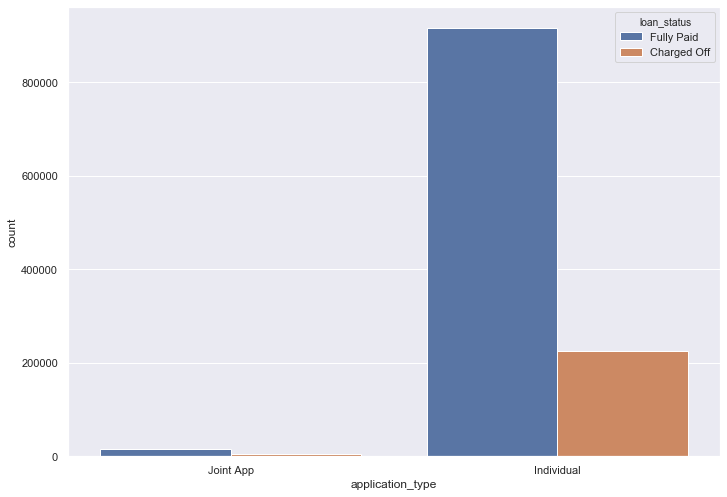

In [164]:
# "application_type"
table = pd.crosstab(df2_cat["loan_status"], df2_cat["application_type"])

from scipy.stats import chi2_contingency
chi2, p, dof, expected = chi2_contingency(table.values)
print("chi-sqr stat: ",chi2,"p-value:" ,p)
sns.countplot(x="application_type", hue="loan_status", data=df2_cat)

Chi-square analysis supports that all categorical variables are highly correlated to loan_status

In [165]:
df2.columns.values.tolist()

['loan_amnt',
 'issue_d',
 'loan_status',
 'verification_status',
 'grade',
 'home_ownership',
 'emp_length',
 'addr_state',
 'annual_inc',
 'log_annual_inc',
 'dti',
 'ageOfCredit',
 'open_acc',
 'total_acc',
 'revol_bal',
 'revol_util',
 'acc_now_delinq',
 'delinq_amnt',
 'delinq_2yrs',
 'pub_rec',
 'collections_12_mths_ex_med',
 'int_rate',
 'inq_last_6mths',
 'tot_coll_amt',
 'purpose',
 'term',
 'initial_list_status',
 'application_type',
 'NAR',
 'log_revol_bal',
 'Diff',
 'prevQuarterDiff',
 'UR',
 'URDiff',
 'URprevMonthDiff']

Checking everything one-by-one, the columns that are categorical (nominal) are verification_status, grade, home_ownership, addr_state, purpose, term, initial_list_status, and application_type. There are only grade is (ordinal). Thus we will be using pd.get_dummies to convert them into numerical data appropriately for nominal data and use ascategory for ordinal data

### 3.) Integrating analysis

In [166]:
df2['UR'] = pd.to_numeric(df2['UR'])
df2_with_dummies = df2.copy()

In [167]:
df2_with_dummies['charged_off'] = (df2_with_dummies['loan_status'] == 'Charged Off').apply(np.uint8)

In [168]:
df2_with_dummies['grade'] = pd.factorize(df2_with_dummies['grade'])[0] + 1
df2_with_dummies['loan_status'] = pd.factorize(df2_with_dummies['loan_status'])[0] + 1

In [169]:
df2_with_dummies = pd.get_dummies(df2_with_dummies,columns=['verification_status', 'home_ownership', 'addr_state', 'purpose', 'term', 'initial_list_status',
                           'application_type'], 
               drop_first = True,
               dummy_na = True)

Creating a new column named "Charged Off" which assigns "charged 
off" loans to 2 and "Fully-Paid" to 1

Converting nominal and ordinal values to numerical values


In [170]:
df2_with_dummies

,loan_amnt,issue_d,loan_status,grade,emp_length,annual_inc,log_annual_inc,dti,ageOfCredit,open_acc,...,purpose_small_business,purpose_vacation,purpose_wedding,purpose_nan,term_ 60 months,term_nan,initial_list_status_w,initial_list_status_nan,application_type_Joint App,application_type_nan
100,30000,2018-12-01,1,1,5.0,100000.0,5.000004,30.46,6.915953,11.0,...,0,0,0,0,0,0,1,0,1,0
152,40000,2018-12-01,1,2,0.0,45000.0,4.653222,50.53,9.500537,18.0,...,0,0,0,0,1,0,1,0,1,0
170,20000,2018-12-01,1,3,10.0,100000.0,5.000004,18.92,19.830660,9.0,...,0,0,0,0,0,0,1,0,1,0
186,4500,2018-12-01,1,4,10.0,38500.0,4.585472,4.64,15.000992,12.0,...,0,0,0,0,0,0,1,0,0,0
215,8425,2018-12-01,1,5,3.0,450000.0,5.653213,12.37,21.166759,21.0,...,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2260654,30000,2017-10-01,2,1,2.0,80000.0,4.903095,23.22,15.833316,21.0,...,0,0,0,0,1,0,0,0,0,0
2260655,18000,2017-10-01,2,7,10.0,77000.0,4.886496,8.08,13.081720,9.0,...,0,0,0,0,1,0,1,0,0,0
2260656,17950,2017-10-01,1,7,10.0,53758.0,4.730451,33.24,16.832652,11.0,...,0,0,0,0,1,0,0,0,0,0
2260658,15000,2017-10-01,1,2,0.0,85000.0,4.929424,14.66,16.586241,19.0,...,0,0,0,0,1,0,1,0,0,0


In [171]:
df2_with_dummies.shape

(1160023, 107)

In [172]:
df2_with_dummies.to_csv("df2_with_dummies.csv")

## V. Data Pre-processing: Outlier Analysis





### 1.) Identify numerical attributes 

In [173]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
exclude = ['datetime64[ns]', 'period[Q-DEC]']
num_df = df2_with_dummies.select_dtypes(include=numerics, exclude = exclude)
num_df.dtypes

loan_amnt                       int64
loan_status                     int64
grade                           int64
emp_length                    float64
annual_inc                    float64
log_annual_inc                float64
dti                           float64
ageOfCredit                   float64
open_acc                      float64
total_acc                     float64
revol_bal                       int64
revol_util                    float64
acc_now_delinq                float64
delinq_amnt                   float64
delinq_2yrs                   float64
pub_rec                       float64
collections_12_mths_ex_med    float64
int_rate                      float64
inq_last_6mths                float64
tot_coll_amt                  float64
NAR                           float64
log_revol_bal                 float64
Diff                          float64
prevQuarterDiff               float64
UR                            float64
URDiff                        float64
URprevMonthD

114 numerical cols

Check if there are columns missing

In [174]:
set(df2_with_dummies.columns.values.tolist()) - set(num_df)

{'addr_state_AL',
 'addr_state_AR',
 'addr_state_AZ',
 'addr_state_CA',
 'addr_state_CO',
 'addr_state_CT',
 'addr_state_DC',
 'addr_state_DE',
 'addr_state_FL',
 'addr_state_GA',
 'addr_state_HI',
 'addr_state_IA',
 'addr_state_ID',
 'addr_state_IL',
 'addr_state_IN',
 'addr_state_KS',
 'addr_state_KY',
 'addr_state_LA',
 'addr_state_MA',
 'addr_state_MD',
 'addr_state_ME',
 'addr_state_MI',
 'addr_state_MN',
 'addr_state_MO',
 'addr_state_MS',
 'addr_state_MT',
 'addr_state_NC',
 'addr_state_ND',
 'addr_state_NE',
 'addr_state_NH',
 'addr_state_NJ',
 'addr_state_NM',
 'addr_state_NV',
 'addr_state_NY',
 'addr_state_OH',
 'addr_state_OK',
 'addr_state_OR',
 'addr_state_PA',
 'addr_state_RI',
 'addr_state_SC',
 'addr_state_SD',
 'addr_state_TN',
 'addr_state_TX',
 'addr_state_UT',
 'addr_state_VA',
 'addr_state_VT',
 'addr_state_WA',
 'addr_state_WI',
 'addr_state_WV',
 'addr_state_WY',
 'addr_state_nan',
 'application_type_Joint App',
 'application_type_nan',
 'home_ownership_OTHER',


### 2.) Boxplot and histogram analysis

{'whiskers': [<matplotlib.lines.Line2D at 0x1c9fe39da08>,
 'caps': [<matplotlib.lines.Line2D at 0x1c9fe39dc48>,
 'boxes': [<matplotlib.lines.Line2D at 0x1c9fe39d1c8>],
 'medians': [<matplotlib.lines.Line2D at 0x1c9fe3a3e48>],
 'fliers': [<matplotlib.lines.Line2D at 0x1c9fe3a3f08>],
 'means': []}

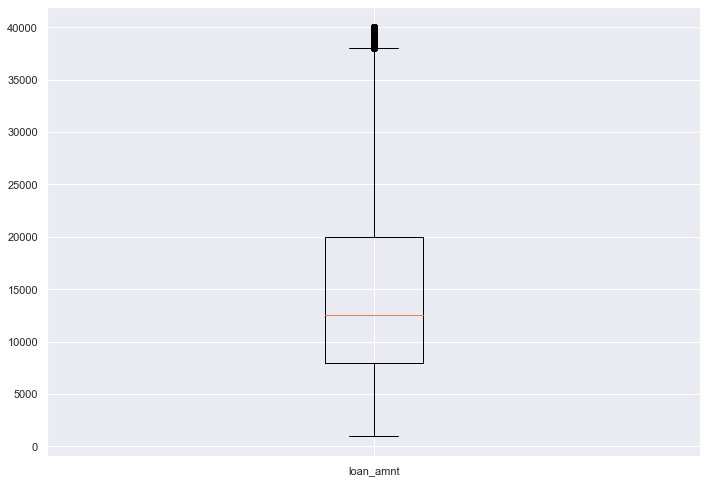

In [175]:
plt.boxplot(df2['loan_amnt'], labels=['loan_amnt'])

(array([104105., 227111., 250935., 174963., 143606.,  81386.,  70322.,
         44437.,  56340.,   6818.]),
 array([ 1000.,  4900.,  8800., 12700., 16600., 20500., 24400., 28300.,
        32200., 36100., 40000.]),
 <a list of 10 Patch objects>)

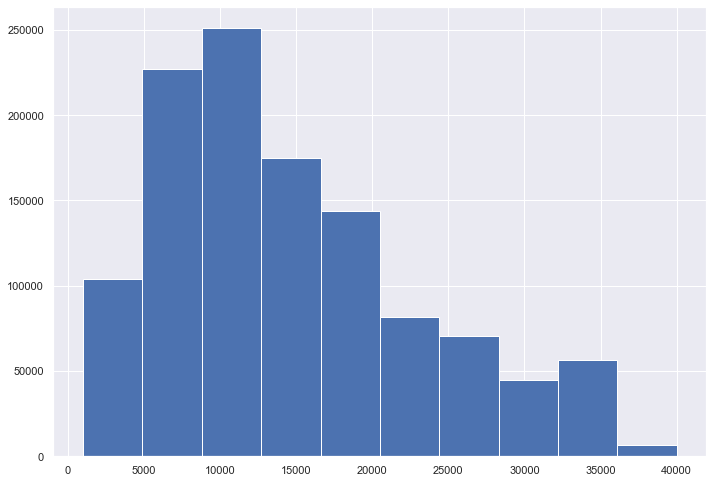

In [176]:
plt.hist(df2['loan_amnt'])

int_rate

{'whiskers': [<matplotlib.lines.Line2D at 0x1c9fe4dd6c8>,
 'caps': [<matplotlib.lines.Line2D at 0x1c9fe4e1688>,
 'boxes': [<matplotlib.lines.Line2D at 0x1c9fe4dac48>],
 'medians': [<matplotlib.lines.Line2D at 0x1c9fe4e1f88>],
 'fliers': [<matplotlib.lines.Line2D at 0x1c9fe4e7d88>],
 'means': []}

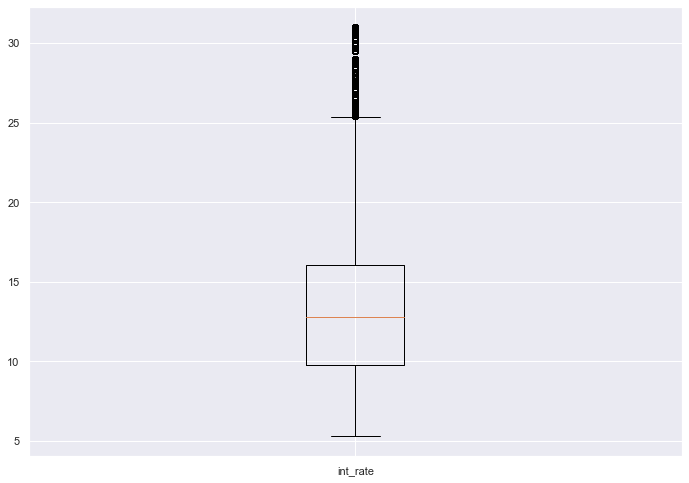

In [177]:
plt.boxplot(df2['int_rate'], labels=['int_rate'])

(array([134267., 204249., 273496., 211612., 159910.,  89860.,  41456.,
         28955.,   8569.,   7649.]),
 array([ 5.31 ,  7.878, 10.446, 13.014, 15.582, 18.15 , 20.718, 23.286,
        25.854, 28.422, 30.99 ]),
 <a list of 10 Patch objects>)

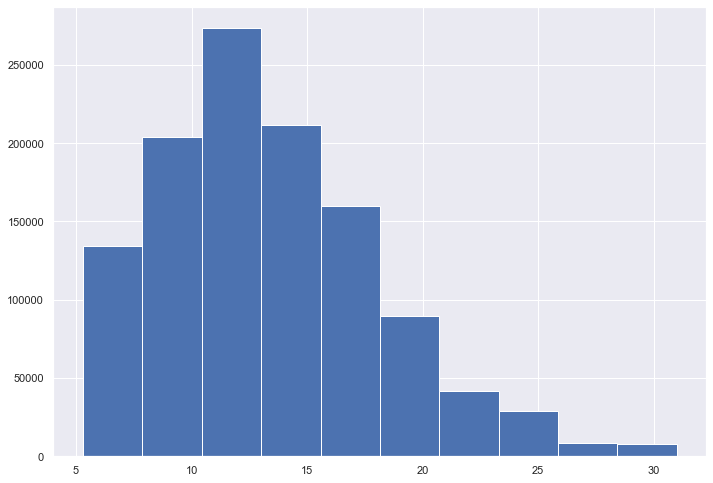

In [178]:
plt.hist(df2['int_rate'])

installment

In [179]:
# plt.boxplot(df2['installment'], labels=['installment'])

In [180]:
# plt.hist(df2['installment'])

dti

(array([1.159775e+06, 1.680000e+02, 4.200000e+01, 1.200000e+01,
        7.000000e+00, 4.000000e+00, 3.000000e+00, 4.000000e+00,
        1.000000e+00, 7.000000e+00]),
 array([ -1.,  99., 199., 299., 399., 499., 599., 699., 799., 899., 999.]),
 <a list of 10 Patch objects>)

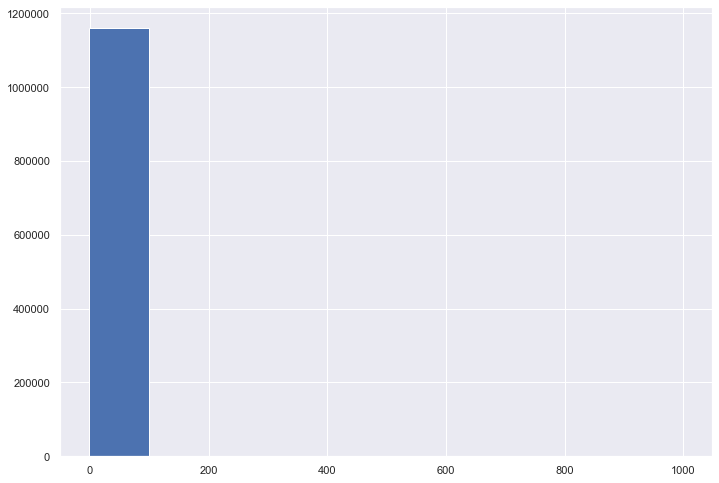

In [181]:
plt.hist(df2['dti'])

earliest_cr_line

In [182]:
# plt.boxplot(df2['earliest_cr_line_year'], labels=['earliest_cr_line_year'])

In [183]:
# plt.hist(df2['earliest_cr_line_year'])

open_acc

{'whiskers': [<matplotlib.lines.Line2D at 0x1c9fd885f48>,
 'caps': [<matplotlib.lines.Line2D at 0x1c9fd885d08>,
 'boxes': [<matplotlib.lines.Line2D at 0x1c9fdc7b548>],
 'medians': [<matplotlib.lines.Line2D at 0x1c9fdc2eb48>],
 'fliers': [<matplotlib.lines.Line2D at 0x1c9fdc4e608>],
 'means': []}

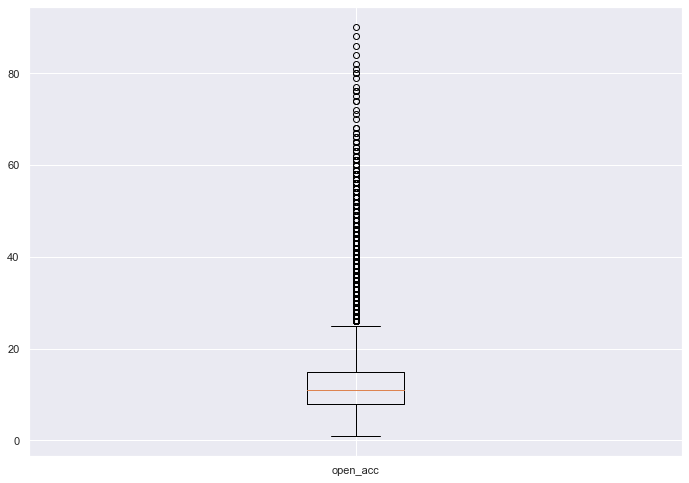

In [184]:
plt.boxplot(df2['open_acc'], labels=['open_acc'])

(array([4.51311e+05, 5.80565e+05, 1.10807e+05, 1.47970e+04, 2.12100e+03,
        3.29000e+02, 6.20000e+01, 1.50000e+01, 1.10000e+01, 5.00000e+00]),
 array([ 1. ,  9.9, 18.8, 27.7, 36.6, 45.5, 54.4, 63.3, 72.2, 81.1, 90. ]),
 <a list of 10 Patch objects>)

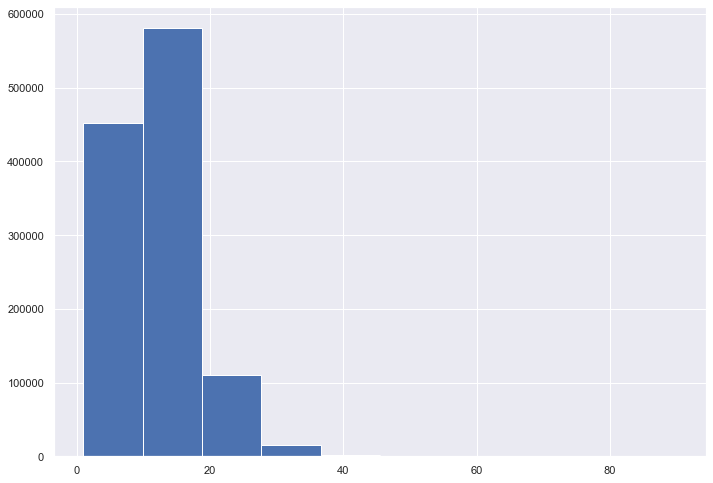

In [185]:
plt.hist(df2['open_acc'])

pub_rec

{'whiskers': [<matplotlib.lines.Line2D at 0x1ca14f674c8>,
 'caps': [<matplotlib.lines.Line2D at 0x1ca14e4a8c8>,
 'boxes': [<matplotlib.lines.Line2D at 0x1ca14f71108>],
 'medians': [<matplotlib.lines.Line2D at 0x1c9fd903f08>],
 'fliers': [<matplotlib.lines.Line2D at 0x1ca14e73248>],
 'means': []}

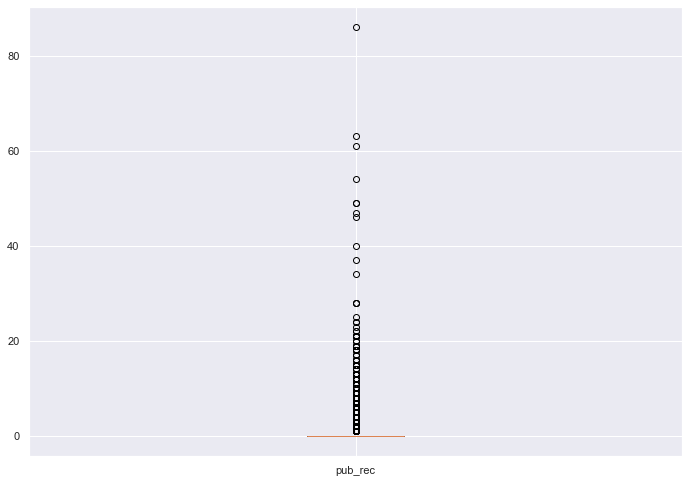

In [186]:
plt.boxplot(df2['pub_rec'], labels=['pub_rec'])

(array([1.159764e+06, 2.200000e+02, 2.500000e+01, 4.000000e+00,
        2.000000e+00, 4.000000e+00, 1.000000e+00, 2.000000e+00,
        0.000000e+00, 1.000000e+00]),
 array([ 0. ,  8.6, 17.2, 25.8, 34.4, 43. , 51.6, 60.2, 68.8, 77.4, 86. ]),
 <a list of 10 Patch objects>)

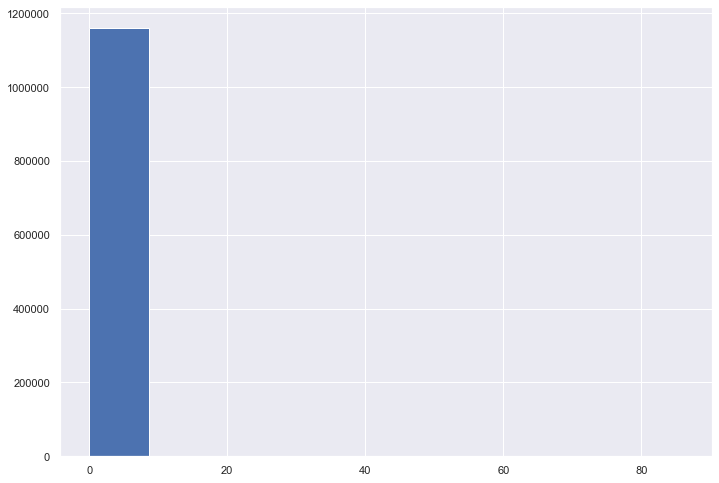

In [187]:
plt.hist(df2['pub_rec'])

revol_util

{'whiskers': [<matplotlib.lines.Line2D at 0x1c9fcbe44c8>,
 'caps': [<matplotlib.lines.Line2D at 0x1c9fcbe4e08>,
 'boxes': [<matplotlib.lines.Line2D at 0x1c9fcbdaa48>],
 'medians': [<matplotlib.lines.Line2D at 0x1c9fcbeed88>],
 'fliers': [<matplotlib.lines.Line2D at 0x1c9fcbc3b88>],
 'means': []}

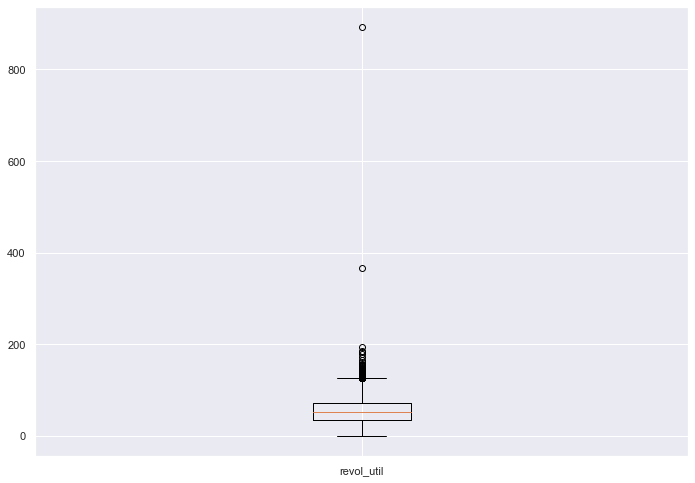

In [188]:
plt.boxplot(df2['revol_util'], labels=['revol_util'])

(array([1.083758e+06, 7.626000e+04, 3.000000e+00, 0.000000e+00,
        1.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 1.000000e+00]),
 array([  0.  ,  89.23, 178.46, 267.69, 356.92, 446.15, 535.38, 624.61,
        713.84, 803.07, 892.3 ]),
 <a list of 10 Patch objects>)

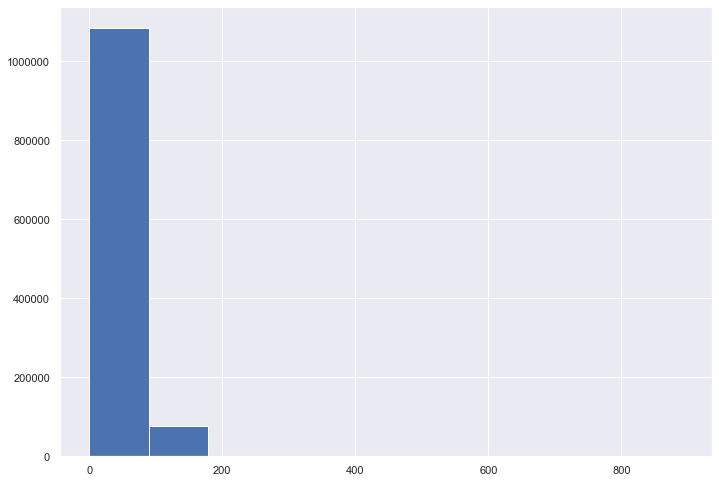

In [189]:
plt.hist(df2['revol_util'])

total_acc

{'whiskers': [<matplotlib.lines.Line2D at 0x1ca154cb588>,
 'caps': [<matplotlib.lines.Line2D at 0x1ca154cf688>,
 'boxes': [<matplotlib.lines.Line2D at 0x1ca154b8c48>],
 'medians': [<matplotlib.lines.Line2D at 0x1ca154cff88>],
 'fliers': [<matplotlib.lines.Line2D at 0x1ca154acd88>],
 'means': []}

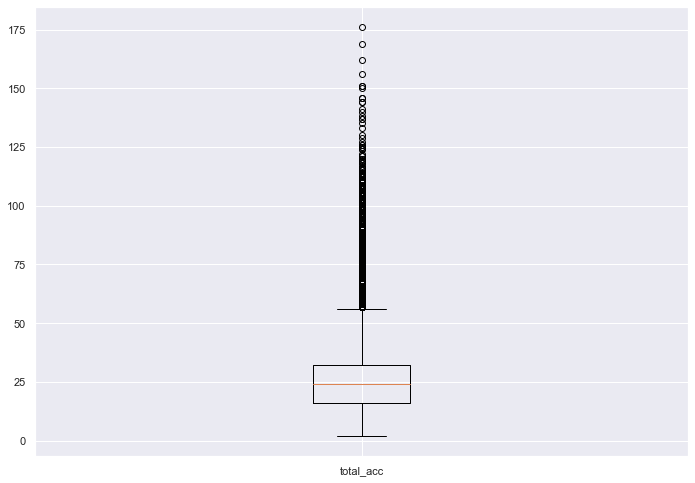

In [190]:
plt.boxplot(df2['total_acc'], labels=['total_acc'])

(array([4.12603e+05, 5.58044e+05, 1.63657e+05, 2.26750e+04, 2.49400e+03,
        4.55000e+02, 6.70000e+01, 1.70000e+01, 8.00000e+00, 3.00000e+00]),
 array([  2. ,  19.4,  36.8,  54.2,  71.6,  89. , 106.4, 123.8, 141.2,
        158.6, 176. ]),
 <a list of 10 Patch objects>)

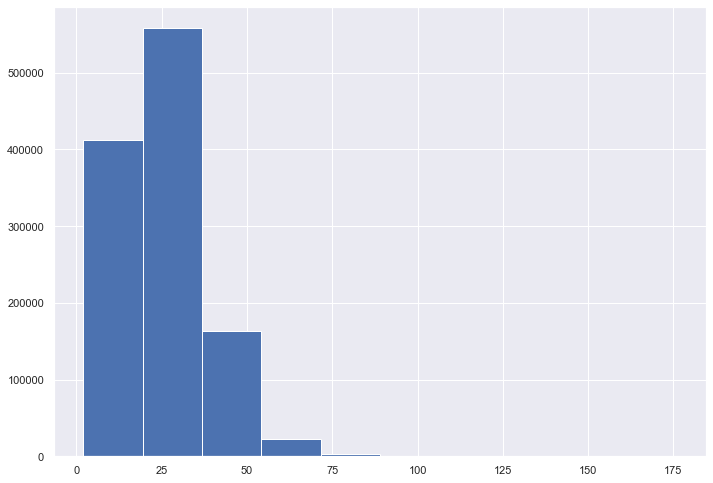

In [191]:
plt.hist(df2['total_acc'])

mort_acc

In [192]:
# plt.boxplot(df2['mort_acc'], labels=['mort_acc'])

In [193]:
# plt.hist(df2['mort_acc'])

pub_rec_bankruptcies

In [194]:
# plt.boxplot(df2['pub_rec_bankruptcies'], labels=['pub_rec_bankruptcies'])

In [195]:
# plt.hist(df2['pub_rec_bankruptcies'])

log_annual_inc

In [196]:
# plt.boxplot(df2['log_annual_inc'], labels=['log_annual_inc'])

In [197]:
# plt.hist(df2['log_annual_inc'])

log_revol_bal

{'whiskers': [<matplotlib.lines.Line2D at 0x1c9fd7cab08>,
 'caps': [<matplotlib.lines.Line2D at 0x1c9fd7ccac8>,
 'boxes': [<matplotlib.lines.Line2D at 0x1c9fd7c2f88>],
 'medians': [<matplotlib.lines.Line2D at 0x1c9fd7cfa48>],
 'fliers': [<matplotlib.lines.Line2D at 0x1c9fd7cfbc8>],
 'means': []}

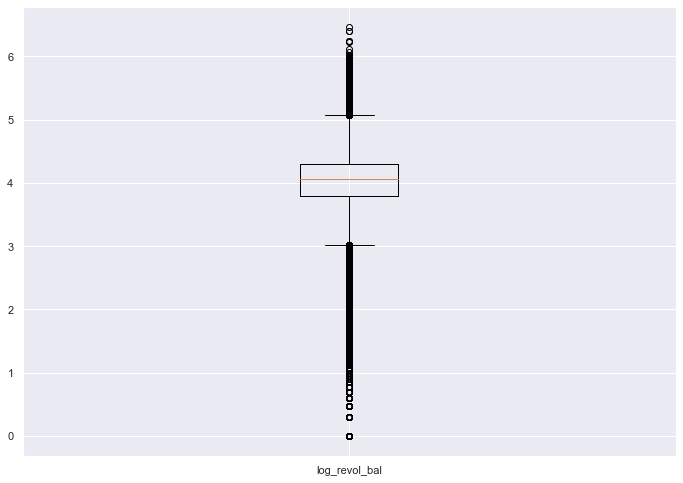

In [198]:
plt.boxplot(df2['log_revol_bal'], labels=['log_revol_bal'])

(array([4.32700e+03, 8.19000e+02, 2.19500e+03, 7.23500e+03, 3.88830e+04,
        3.22816e+05, 6.71642e+05, 1.07106e+05, 4.94200e+03, 5.80000e+01]),
 array([0.        , 0.64631218, 1.29262435, 1.93893653, 2.58524871,
        3.23156088, 3.87787306, 4.52418524, 5.17049741, 5.81680959,
        6.46312177]),
 <a list of 10 Patch objects>)

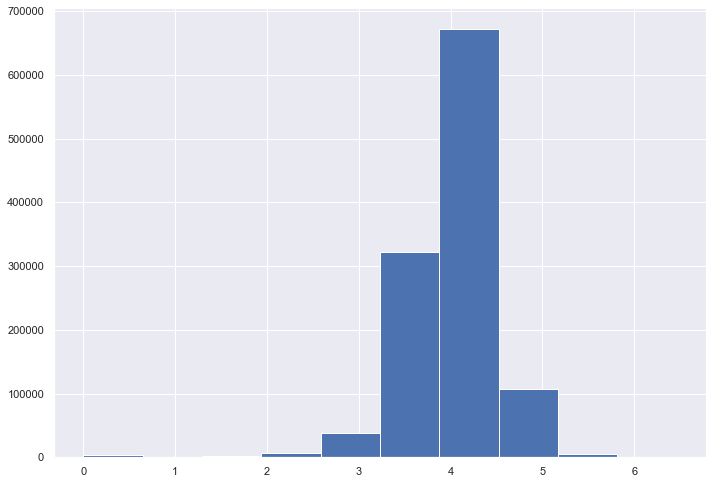

In [199]:
plt.hist(df2['log_revol_bal'])

### 3.) IQR score analysis and outlier removal

Identify numerical variables

In [200]:
df2['UR'] = pd.to_numeric(df2['UR'])

numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
exclude = ['datetime64[ns]', 'period[Q-DEC]']
num_df = df2_with_dummies.select_dtypes(include=numerics, exclude = exclude)
num_df.dtypes

loan_amnt                       int64
loan_status                     int64
grade                           int64
emp_length                    float64
annual_inc                    float64
log_annual_inc                float64
dti                           float64
ageOfCredit                   float64
open_acc                      float64
total_acc                     float64
revol_bal                       int64
revol_util                    float64
acc_now_delinq                float64
delinq_amnt                   float64
delinq_2yrs                   float64
pub_rec                       float64
collections_12_mths_ex_med    float64
int_rate                      float64
inq_last_6mths                float64
tot_coll_amt                  float64
NAR                           float64
log_revol_bal                 float64
Diff                          float64
prevQuarterDiff               float64
UR                            float64
URDiff                        float64
URprevMonthD

In [201]:
num_df.columns.values.tolist()

['loan_amnt',
 'loan_status',
 'grade',
 'emp_length',
 'annual_inc',
 'log_annual_inc',
 'dti',
 'ageOfCredit',
 'open_acc',
 'total_acc',
 'revol_bal',
 'revol_util',
 'acc_now_delinq',
 'delinq_amnt',
 'delinq_2yrs',
 'pub_rec',
 'collections_12_mths_ex_med',
 'int_rate',
 'inq_last_6mths',
 'tot_coll_amt',
 'NAR',
 'log_revol_bal',
 'Diff',
 'prevQuarterDiff',
 'UR',
 'URDiff',
 'URprevMonthDiff',
 'charged_off']

In [202]:
num_df_filtered1 = num_df.drop(columns = ['loan_status', 'grade', 'log_annual_inc', 'revol_bal',  'NAR', 'charged_off'])

We dropped loan status because we have charged off binary.

We dropped grade because it's not really numerical.

We dropped log_annual inc because there is annual_inc. - IQR analysis only

We dropped revol_bal because there is log_revol_bal.

We dropped NAR because it's not our target variables.

We dropped charged_off because it's not Z-score-able.

We are only picking purely numerical variables for our Z-scores.


In [203]:
print(len(num_df_filtered1.columns.values.tolist()))
num_df_filtered_list = num_df_filtered1.columns.values.tolist()


22


In [204]:
set(df2.columns.values) - set(num_df_filtered1)

{'NAR',
 'addr_state',
 'application_type',
 'grade',
 'home_ownership',
 'initial_list_status',
 'issue_d',
 'loan_status',
 'log_annual_inc',
 'purpose',
 'revol_bal',
 'term',
 'verification_status'}

Check IQR range

In [205]:

Q1 = num_df_filtered1[num_df_filtered_list].quantile(0.25)

Q3 = num_df_filtered1[num_df_filtered_list].quantile(0.75)

IQR = Q3 - Q1

print(IQR)

loan_amnt                     12000.000000
emp_length                        7.000000
annual_inc                    45000.000000
dti                              12.250000
ageOfCredit                       8.583338
open_acc                          7.000000
total_acc                        16.000000
revol_util                       36.800000
acc_now_delinq                    0.000000
delinq_amnt                       0.000000
delinq_2yrs                       0.000000
pub_rec                           0.000000
collections_12_mths_ex_med        0.000000
int_rate                          6.270000
inq_last_6mths                    1.000000
tot_coll_amt                      0.000000
log_revol_bal                     0.515982
Diff                              0.010242
prevQuarterDiff                   0.010289
UR                                1.500000
URDiff                            0.018868
URprevMonthDiff                   0.018868
dtype: float64


Whiskers

In [206]:
# Whiskers function
def whiskers (c):
#     if c.select_dtypes(include=numerics):
        c_desc = c.describe()
        q1 = c.quantile(0.25)
        q3 = c.quantile(0.75)
#         n_upper = s[s > whiskers(s)['upper']].count()
#         n_lower = s[s < whiskers(s)['lower']].count()
        iqr = q3 - q1 #interquartile range
        upper = q3 + 1.5 * iqr
        lower = q1 - 1.5 * iqr
        return{'upper': upper, 'lower': lower}

In [207]:
whiskers(num_df_filtered1)

{'upper': loan_amnt                      38000.000000
 emp_length                        20.500000
 annual_inc                    160500.000000
 dti                               42.555000
 ageOfCredit                       32.705668
 open_acc                          25.500000
 total_acc                         56.000000
 revol_util                       126.000000
 acc_now_delinq                     0.000000
 delinq_amnt                        0.000000
 delinq_2yrs                        0.000000
 pub_rec                            0.000000
 collections_12_mths_ex_med         0.000000
 int_rate                          25.425000
 inq_last_6mths                     2.500000
 tot_coll_amt                       0.000000
 log_revol_bal                      5.077061
 Diff                               0.026166
 prevQuarterDiff                    0.026284
 UR                                 8.450000
 URDiff                             0.028302
 URprevMonthDiff                    0.028302
 

Check number of outliers

In [208]:
def num_outliers(df):
    cols = ['ColName','Upper outliers','Lower outliers','Outlier Ratio']
    outlier_table = pd.DataFrame(columns=cols)
        
    for c in df.columns:
        s = df[c]
        n_upper = s[s > whiskers(s)['upper']].count()
        n_lower = s[s < whiskers(s)['lower']].count()
        ratio = (n_upper + n_lower)/len(df[c])
        outlier_row = pd.DataFrame([[c,n_upper,n_lower,ratio]],columns=cols)
        outlier_table = pd.concat([outlier_table, outlier_row], axis=0,ignore_index=True)
    return outlier_table

In [209]:
num_outliers(num_df_filtered1)

,ColName,Upper outliers,Lower outliers,Outlier Ratio
0,loan_amnt,6289,0,0.005421
1,emp_length,0,0,0.000000
2,annual_inc,53991,0,0.046543
3,dti,3805,0,0.003280
4,ageOfCredit,33578,0,0.028946
5,open_acc,26776,0,0.023082
6,total_acc,20377,0,0.017566
7,revol_util,72,0,0.000062
8,acc_now_delinq,5850,0,0.005043
9,delinq_amnt,4607,0,0.003971


Remove outliers and store as a dataset

In [210]:
def delete_outliers(df):
    for c in df.columns:
        s = df[c]
        if s[s>whiskers(s)['upper']].count() > 0:
            df = df.drop (df[df[c]> whiskers(s)['upper']].index)
        if s[s>whiskers(s)['lower']].count() > 0:
            df = df.drop (df[df[c] < whiskers(s)['lower']].index)
    return df



In [211]:
df_iqr = delete_outliers(num_df_filtered1)

In [212]:
df_iqr.shape

(487790, 22)

487790 observations and 22 columns

### 4.) Try using z-score

In [213]:
num_df.columns.values.tolist()

['loan_amnt',
 'loan_status',
 'grade',
 'emp_length',
 'annual_inc',
 'log_annual_inc',
 'dti',
 'ageOfCredit',
 'open_acc',
 'total_acc',
 'revol_bal',
 'revol_util',
 'acc_now_delinq',
 'delinq_amnt',
 'delinq_2yrs',
 'pub_rec',
 'collections_12_mths_ex_med',
 'int_rate',
 'inq_last_6mths',
 'tot_coll_amt',
 'NAR',
 'log_revol_bal',
 'Diff',
 'prevQuarterDiff',
 'UR',
 'URDiff',
 'URprevMonthDiff',
 'charged_off']

We dropped loan status because we have charged off binary.

We dropped grade because it's not really numerical.

We dropped annual inc because there is log_annual_inc.

We dropped revol_bal because there is log_revol_bal.

We dropped NAR because it's not our target variables.

We dropped charged_off because it's not Z-score-able.

We are only picking purely numerical variables for our Z-scores.

In [214]:
num_df_filtered = num_df.drop(columns = ['loan_status', 'grade', 'annual_inc', 'revol_bal',  'NAR', 'charged_off'])

In [215]:
print(len(num_df_filtered.columns.values.tolist()))
num_df_filtered.columns.values.tolist()

22


['loan_amnt',
 'emp_length',
 'log_annual_inc',
 'dti',
 'ageOfCredit',
 'open_acc',
 'total_acc',
 'revol_util',
 'acc_now_delinq',
 'delinq_amnt',
 'delinq_2yrs',
 'pub_rec',
 'collections_12_mths_ex_med',
 'int_rate',
 'inq_last_6mths',
 'tot_coll_amt',
 'log_revol_bal',
 'Diff',
 'prevQuarterDiff',
 'UR',
 'URDiff',
 'URprevMonthDiff']

In [216]:
set(df2.columns.values) - set(num_df_filtered)

{'NAR',
 'addr_state',
 'annual_inc',
 'application_type',
 'grade',
 'home_ownership',
 'initial_list_status',
 'issue_d',
 'loan_status',
 'purpose',
 'revol_bal',
 'term',
 'verification_status'}

In [217]:
num_df_filtered.columns.values.tolist()

['loan_amnt',
 'emp_length',
 'log_annual_inc',
 'dti',
 'ageOfCredit',
 'open_acc',
 'total_acc',
 'revol_util',
 'acc_now_delinq',
 'delinq_amnt',
 'delinq_2yrs',
 'pub_rec',
 'collections_12_mths_ex_med',
 'int_rate',
 'inq_last_6mths',
 'tot_coll_amt',
 'log_revol_bal',
 'Diff',
 'prevQuarterDiff',
 'UR',
 'URDiff',
 'URprevMonthDiff']

In [218]:
z = np.abs(stats.zscore(num_df_filtered))
threshold = 3
print(np.where(z > threshold))

(array([      1,       4,      23, ..., 1160019, 1160020, 1160021],
      dtype=int64), array([ 3,  2, 20, ..., 13, 13,  6], dtype=int64))


In [219]:
df2_no_outlier_z = df2[(z < threshold).all(axis=1)]
df2_no_outlier_z

,loan_amnt,issue_d,loan_status,verification_status,grade,home_ownership,emp_length,addr_state,annual_inc,log_annual_inc,...,term,initial_list_status,application_type,NAR,log_revol_bal,Diff,prevQuarterDiff,UR,URDiff,URprevMonthDiff
100,30000,2018-12-01,Fully Paid,Source Verified,D,MORTGAGE,5.0,CA,100000.0,5.000004,...,36 months,w,Joint App,0.000264,4.193236,0.007315,0.004539,4.3,0.023810,0.000000
170,20000,2018-12-01,Fully Paid,Not Verified,A,MORTGAGE,10.0,WA,100000.0,5.000004,...,36 months,w,Joint App,0.003542,4.405124,0.003031,0.014669,4.5,0.000000,0.022727
186,4500,2018-12-01,Fully Paid,Not Verified,B,RENT,10.0,TX,38500.0,4.585472,...,36 months,w,Individual,0.003590,3.650599,0.009664,0.009767,3.7,0.000000,0.000000
269,20000,2018-12-01,Fully Paid,Not Verified,D,RENT,4.0,WA,57000.0,4.755882,...,60 months,w,Individual,0.000203,4.523187,0.003031,0.014669,4.5,0.000000,0.022727
271,6600,2018-12-01,Fully Paid,Not Verified,B,RENT,10.0,TX,45000.0,4.653222,...,36 months,f,Individual,0.001033,3.790144,0.009664,0.009767,3.7,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2260638,30000,2017-10-01,Charged Off,Verified,D,MORTGAGE,10.0,IL,94000.0,4.973132,...,36 months,f,Individual,-0.708989,4.052617,0.003432,0.008233,4.8,-0.020408,0.000000
2260640,20700,2017-10-01,Charged Off,Verified,C,OWN,10.0,IN,46000.0,4.662767,...,60 months,w,Individual,-4.548431,4.338357,0.011171,0.002309,3.5,-0.027778,0.000000
2260643,10000,2017-10-01,Fully Paid,Not Verified,B,MORTGAGE,10.0,AL,103510.0,5.014987,...,36 months,w,Individual,-0.274286,4.305244,0.012462,0.005426,3.9,-0.025000,-0.024390
2260646,16000,2017-10-01,Fully Paid,Source Verified,D,MORTGAGE,0.0,SC,50000.0,4.698979,...,60 months,f,Joint App,-0.566734,3.144263,0.008567,0.004719,4.2,0.000000,-0.023256


In [220]:
df2_with_dummies_no_outlier_z = df2_with_dummies[(z < threshold).all(axis = 1)]
df2_with_dummies_no_outlier_z

,loan_amnt,issue_d,loan_status,grade,emp_length,annual_inc,log_annual_inc,dti,ageOfCredit,open_acc,...,purpose_small_business,purpose_vacation,purpose_wedding,purpose_nan,term_ 60 months,term_nan,initial_list_status_w,initial_list_status_nan,application_type_Joint App,application_type_nan
100,30000,2018-12-01,1,1,5.0,100000.0,5.000004,30.46,6.915953,11.0,...,0,0,0,0,0,0,1,0,1,0
170,20000,2018-12-01,1,3,10.0,100000.0,5.000004,18.92,19.830660,9.0,...,0,0,0,0,0,0,1,0,1,0
186,4500,2018-12-01,1,4,10.0,38500.0,4.585472,4.64,15.000992,12.0,...,0,0,0,0,0,0,1,0,0,0
269,20000,2018-12-01,1,1,4.0,57000.0,4.755882,22.18,23.669206,10.0,...,0,0,0,0,1,0,1,0,0,0
271,6600,2018-12-01,1,4,10.0,45000.0,4.653222,16.21,9.667550,6.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2260638,30000,2017-10-01,2,1,10.0,94000.0,4.973132,25.76,19.915536,11.0,...,0,0,0,0,0,0,0,0,0,0
2260640,20700,2017-10-01,2,2,10.0,46000.0,4.662767,27.05,16.419228,10.0,...,0,0,0,0,1,0,1,0,0,0
2260643,10000,2017-10-01,1,4,10.0,103510.0,5.014987,28.59,25.585741,13.0,...,0,0,0,0,0,0,1,0,0,0
2260646,16000,2017-10-01,1,1,0.0,50000.0,4.698979,8.28,11.334935,6.0,...,0,0,0,0,1,0,0,0,1,0


In [221]:
df2_no_outlier_z.isnull().sum().any()

False

In [222]:
df2_with_dummies_no_outlier_z.isnull().sum().any()

False

In [223]:
df2_no_outlier_z.columns.values.tolist()

['loan_amnt',
 'issue_d',
 'loan_status',
 'verification_status',
 'grade',
 'home_ownership',
 'emp_length',
 'addr_state',
 'annual_inc',
 'log_annual_inc',
 'dti',
 'ageOfCredit',
 'open_acc',
 'total_acc',
 'revol_bal',
 'revol_util',
 'acc_now_delinq',
 'delinq_amnt',
 'delinq_2yrs',
 'pub_rec',
 'collections_12_mths_ex_med',
 'int_rate',
 'inq_last_6mths',
 'tot_coll_amt',
 'purpose',
 'term',
 'initial_list_status',
 'application_type',
 'NAR',
 'log_revol_bal',
 'Diff',
 'prevQuarterDiff',
 'UR',
 'URDiff',
 'URprevMonthDiff']

In [224]:
df2_with_dummies_no_outlier_z.columns.values.tolist()

['loan_amnt',
 'issue_d',
 'loan_status',
 'grade',
 'emp_length',
 'annual_inc',
 'log_annual_inc',
 'dti',
 'ageOfCredit',
 'open_acc',
 'total_acc',
 'revol_bal',
 'revol_util',
 'acc_now_delinq',
 'delinq_amnt',
 'delinq_2yrs',
 'pub_rec',
 'collections_12_mths_ex_med',
 'int_rate',
 'inq_last_6mths',
 'tot_coll_amt',
 'NAR',
 'log_revol_bal',
 'Diff',
 'prevQuarterDiff',
 'UR',
 'URDiff',
 'URprevMonthDiff',
 'charged_off',
 'verification_status_Source Verified',
 'verification_status_Verified',
 'verification_status_nan',
 'home_ownership_OTHER',
 'home_ownership_OWN',
 'home_ownership_RENT',
 'home_ownership_nan',
 'addr_state_AL',
 'addr_state_AR',
 'addr_state_AZ',
 'addr_state_CA',
 'addr_state_CO',
 'addr_state_CT',
 'addr_state_DC',
 'addr_state_DE',
 'addr_state_FL',
 'addr_state_GA',
 'addr_state_HI',
 'addr_state_IA',
 'addr_state_ID',
 'addr_state_IL',
 'addr_state_IN',
 'addr_state_KS',
 'addr_state_KY',
 'addr_state_LA',
 'addr_state_MA',
 'addr_state_MD',
 'addr_stat

### 5.) Getting rid of duplicate columns (if there are any)

In [225]:
df2_no_outlier_z = df2_no_outlier_z.loc[:,~df2_no_outlier_z.columns.duplicated()]
df2_with_dummies_no_outlier_z = df2_with_dummies_no_outlier_z.loc[:,~df2_with_dummies_no_outlier_z.columns.duplicated()]

In [226]:
df2_no_outlier_z.to_csv("df2_no_outlier_z.csv")
df2_no_outlier_z

,loan_amnt,issue_d,loan_status,verification_status,grade,home_ownership,emp_length,addr_state,annual_inc,log_annual_inc,...,term,initial_list_status,application_type,NAR,log_revol_bal,Diff,prevQuarterDiff,UR,URDiff,URprevMonthDiff
100,30000,2018-12-01,Fully Paid,Source Verified,D,MORTGAGE,5.0,CA,100000.0,5.000004,...,36 months,w,Joint App,0.000264,4.193236,0.007315,0.004539,4.3,0.023810,0.000000
170,20000,2018-12-01,Fully Paid,Not Verified,A,MORTGAGE,10.0,WA,100000.0,5.000004,...,36 months,w,Joint App,0.003542,4.405124,0.003031,0.014669,4.5,0.000000,0.022727
186,4500,2018-12-01,Fully Paid,Not Verified,B,RENT,10.0,TX,38500.0,4.585472,...,36 months,w,Individual,0.003590,3.650599,0.009664,0.009767,3.7,0.000000,0.000000
269,20000,2018-12-01,Fully Paid,Not Verified,D,RENT,4.0,WA,57000.0,4.755882,...,60 months,w,Individual,0.000203,4.523187,0.003031,0.014669,4.5,0.000000,0.022727
271,6600,2018-12-01,Fully Paid,Not Verified,B,RENT,10.0,TX,45000.0,4.653222,...,36 months,f,Individual,0.001033,3.790144,0.009664,0.009767,3.7,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2260638,30000,2017-10-01,Charged Off,Verified,D,MORTGAGE,10.0,IL,94000.0,4.973132,...,36 months,f,Individual,-0.708989,4.052617,0.003432,0.008233,4.8,-0.020408,0.000000
2260640,20700,2017-10-01,Charged Off,Verified,C,OWN,10.0,IN,46000.0,4.662767,...,60 months,w,Individual,-4.548431,4.338357,0.011171,0.002309,3.5,-0.027778,0.000000
2260643,10000,2017-10-01,Fully Paid,Not Verified,B,MORTGAGE,10.0,AL,103510.0,5.014987,...,36 months,w,Individual,-0.274286,4.305244,0.012462,0.005426,3.9,-0.025000,-0.024390
2260646,16000,2017-10-01,Fully Paid,Source Verified,D,MORTGAGE,0.0,SC,50000.0,4.698979,...,60 months,f,Joint App,-0.566734,3.144263,0.008567,0.004719,4.2,0.000000,-0.023256


In [227]:
df2_with_dummies_no_outlier_z.to_csv("df2_with_dummies_no_outlier_z.csv")
df2_with_dummies_no_outlier_z

,loan_amnt,issue_d,loan_status,grade,emp_length,annual_inc,log_annual_inc,dti,ageOfCredit,open_acc,...,purpose_small_business,purpose_vacation,purpose_wedding,purpose_nan,term_ 60 months,term_nan,initial_list_status_w,initial_list_status_nan,application_type_Joint App,application_type_nan
100,30000,2018-12-01,1,1,5.0,100000.0,5.000004,30.46,6.915953,11.0,...,0,0,0,0,0,0,1,0,1,0
170,20000,2018-12-01,1,3,10.0,100000.0,5.000004,18.92,19.830660,9.0,...,0,0,0,0,0,0,1,0,1,0
186,4500,2018-12-01,1,4,10.0,38500.0,4.585472,4.64,15.000992,12.0,...,0,0,0,0,0,0,1,0,0,0
269,20000,2018-12-01,1,1,4.0,57000.0,4.755882,22.18,23.669206,10.0,...,0,0,0,0,1,0,1,0,0,0
271,6600,2018-12-01,1,4,10.0,45000.0,4.653222,16.21,9.667550,6.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2260638,30000,2017-10-01,2,1,10.0,94000.0,4.973132,25.76,19.915536,11.0,...,0,0,0,0,0,0,0,0,0,0
2260640,20700,2017-10-01,2,2,10.0,46000.0,4.662767,27.05,16.419228,10.0,...,0,0,0,0,1,0,1,0,0,0
2260643,10000,2017-10-01,1,4,10.0,103510.0,5.014987,28.59,25.585741,13.0,...,0,0,0,0,0,0,1,0,0,0
2260646,16000,2017-10-01,1,1,0.0,50000.0,4.698979,8.28,11.334935,6.0,...,0,0,0,0,1,0,0,0,1,0


## VI. Multivariate Data Exploration post-preprocessing: DF2 Correlation

In [228]:
df2corr = df2_no_outlier_z.copy()

In [229]:
num_df_filtered_list = num_df_filtered.columns.values.tolist()

In [230]:
num_df_filtered_list

['loan_amnt',
 'emp_length',
 'log_annual_inc',
 'dti',
 'ageOfCredit',
 'open_acc',
 'total_acc',
 'revol_util',
 'acc_now_delinq',
 'delinq_amnt',
 'delinq_2yrs',
 'pub_rec',
 'collections_12_mths_ex_med',
 'int_rate',
 'inq_last_6mths',
 'tot_coll_amt',
 'log_revol_bal',
 'Diff',
 'prevQuarterDiff',
 'UR',
 'URDiff',
 'URprevMonthDiff']

In [231]:
df2corr = df2_no_outlier_z[num_df_filtered_list]

In [232]:
df2corr = df2corr.loc[:,~df2corr.columns.duplicated()]

In [233]:
df2corr.columns.values.tolist()

['loan_amnt',
 'emp_length',
 'log_annual_inc',
 'dti',
 'ageOfCredit',
 'open_acc',
 'total_acc',
 'revol_util',
 'acc_now_delinq',
 'delinq_amnt',
 'delinq_2yrs',
 'pub_rec',
 'collections_12_mths_ex_med',
 'int_rate',
 'inq_last_6mths',
 'tot_coll_amt',
 'log_revol_bal',
 'Diff',
 'prevQuarterDiff',
 'UR',
 'URDiff',
 'URprevMonthDiff']

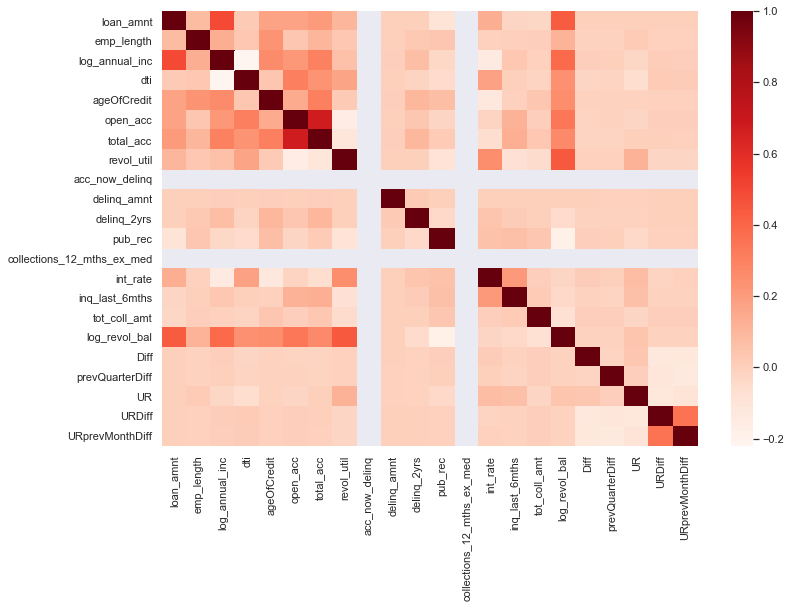

In [234]:
corrdf2 = pd.concat([df2corr, df2corr], axis=1, keys=['corrdf2a', 'corrdf2b']).corr().loc['corrdf2b', 'corrdf2a']
plt.figure(figsize = (12,8))
sns.heatmap(corrdf2, cmap = "Reds")

In [235]:
Indexdf2 = corrdf2[abs(corrdf2) >= 0.3].stack().reset_index()
Indexdf2 = Indexdf2[Indexdf2['level_0'].astype(str) != Indexdf2['level_1'].astype(str)]

Indexdf2['ordered-cols'] = Indexdf2.apply(lambda x: '-'.join(sorted([x['level_0'], x['level_1']])),axis = 1)
Indexdf2 = Indexdf2.drop_duplicates(['ordered-cols'])
Indexdf2.drop(['ordered-cols'], axis = 1, inplace = True)
Indexdf2.columns = ['VarA', 'VarB', 'Rho']

Indexdf2.sort_values(by = ['Rho'], ascending = False).head(10)

,VarA,VarB,Rho
14,open_acc,total_acc,0.678375
1,loan_amnt,log_annual_inc,0.496070
21,revol_util,log_revol_bal,0.443623
2,loan_amnt,log_revol_bal,0.433635
7,log_annual_inc,log_revol_bal,0.387731
37,URDiff,URprevMonthDiff,0.352407
15,open_acc,log_revol_bal,0.338416
9,dti,open_acc,0.304998
11,ageOfCredit,total_acc,0.304799
6,log_annual_inc,total_acc,0.302978
